# **Ecommerce Customer Churn Analysis and Prediction**

# **Definisi Masalah dan Pemahaman Data**

---

## **Definisi Masalah**

**Stakeholder**:  
Stakeholder utama adalah tim manajemen dan divisi retensi pelanggan dari perusahaan e-commerce terkemuka. Para stakeholder bertujuan untuk mengurangi tingkat churn pelanggan dan meningkatkan loyalitas pelanggan melalui strategi promosi yang terarah.

**Pernyataan Masalah**:  
Churn pelanggan dapat menyebabkan kerugian pendapatan yang signifikan serta peningkatan biaya untuk mendapatkan pelanggan baru. Tujuannya adalah mengidentifikasi pelanggan yang berisiko churn menggunakan model prediksi berbasis data. Dengan cara ini, perusahaan dapat mengalokasikan sumber daya secara efisien dan memberikan penawaran promosi yang dipersonalisasi untuk mempertahankan pelanggan yang berisiko tinggi.

- **Spesifik**: Mengidentifikasi pelanggan dengan kemungkinan tinggi untuk churn.
- **Terukur**: Memprediksi churn dengan tingkat precision dan recall yang tinggi, memaksimalkan F1-Score.
- **Dapat Dicapai**: Menggunakan data historis pelanggan, termasuk pola perilaku dan transaksi, untuk melatih model prediksi.

**Pentingnya Masalah**:  
Mencegah churn lebih hemat biaya dibandingkan dengan mendapatkan pelanggan baru. Prediksi churn yang dilakukan lebih awal memungkinkan perusahaan untuk secara proaktif berinteraksi dengan pelanggan yang berisiko, meningkatkan kepuasan pelanggan, dan profitabilitas jangka panjang.

**Target**:  
Mengembangkan model untuk mengklasifikasikan pelanggan menjadi dua kelompok:
- **0**: Pelanggan tidak berisiko churn.
- **1**: Pelanggan berisiko churn.

**Tujuan**:
1. Memprediksi kemungkinan churn untuk setiap pelanggan.
2. Mengidentifikasi faktor utama yang menyebabkan churn pelanggan untuk memberikan wawasan yang dapat ditindaklanjuti.

---

## **Pemahaman Data**

### **Ikhtisar Data**  
Dataset ini berisi informasi tingkat pelanggan, termasuk demografi, riwayat transaksi, metrik perilaku, dan indikator kepuasan. Setiap baris merepresentasikan satu pelanggan, sedangkan setiap kolom menangkap fitur spesifik dari profil mereka.

### **Variabel Utama**:


| Variabel | Tipe Data | Deskripsi |
|----------|-----------|-----------|
| CustomerID | Integer | ID pelanggan yang unik |
| Churn | Integer | Indikator churn |
| Tenure | Float | Lama pelanggan di organisasi |
| PreferredLoginDevice | Object | Perangkat login yang paling sering digunakan oleh pelanggan |
| CityTier | Integer | Tingkatan kota |
| WarehouseToHome | Float | Jarak antara gudang dan rumah pelanggan |
| PreferredPaymentMode | Object | Metode pembayaran yang paling sering digunakan oleh pelanggan |
| Gender | Object | Jenis kelamin pelanggan |
| HourSpendOnApp | Float | Jumlah jam yang dihabiskan pada aplikasi atau situs web |
| NumberOfDeviceRegistered | Integer | Total perangkat yang terdaftar atas nama pelanggan |
| PreferedOrderCat | Object | Kategori pesanan yang paling sering dipesan pelanggan pada bulan lalu |
| SatisfactionScore | Integer | Skor kepuasan pelanggan terhadap layanan |
| MaritalStatus | Object | Status pernikahan pelanggan |
| NumberOfAddress | Integer | Total alamat yang ditambahkan oleh pelanggan |
| Complain | Integer | Ada atau tidaknya komplain dalam bulan terakhir |
| OrderAmountHikeFromLastYear | Float | Persentase peningkatan pesanan dibandingkan tahun lalu |
| CouponUsed | Float | Total kupon yang digunakan dalam bulan terakhir |
| OrderCount | Float | Total jumlah pesanan yang dilakukan dalam bulan terakhir |
| DaySinceLastOrder | Float | Hari sejak pesanan terakhir oleh pelanggan |
| CashbackAmount | Float | Rata-rata cashback yang diterima dalam bulan terakhir | perusahaan e-commerce.

### **Observasi Penting**:
1. Dataset mencakup informasi perilaku dan demografis, yang penting untuk memahami churn.
2. Beberapa fitur memiliki nilai yang hilang (contoh: **Tenure**, **HourSpendOnApp**) yang memerlukan imputasi.
3. Data ini cocok untuk teknik pembelajaran terawasi (supervised learning), mengingat adanya variabel target yang jelas (**Churn**).

---

## **Evaluasi Metrik**

### **Jenis Kesalahan dan Dampaknya**

1. **Type 1 Error (False Positive)**:  
   - **Penjelasan**: Model memprediksi bahwa seorang pelanggan akan churn (risiko tinggi), padahal sebenarnya pelanggan tersebut tidak akan churn.  
   - **Dampak**:
     - Pemborosan sumber daya: Anggaran dan upaya digunakan untuk pelanggan yang sebenarnya tidak membutuhkan perhatian.
     - Efek jangka panjang: Bisa menciptakan ketergantungan pelanggan terhadap insentif atau memengaruhi persepsi pelanggan tentang layanan.

2. **Type 2 Error (False Negative)**:  
   - **Penjelasan**: Model memprediksi bahwa seorang pelanggan tidak akan churn (risiko rendah), padahal sebenarnya pelanggan tersebut churn.  
   - **Dampak**:
     - Kehilangan pendapatan: Pelanggan yang churn berarti hilangnya potensi pendapatan jangka panjang.
     - Biaya akuisisi baru: Mengganti pelanggan yang hilang memerlukan biaya lebih tinggi dibandingkan mempertahankan pelanggan lama.

3. **True Positive (TP)**:  
   - **Penjelasan**: Model memprediksi dengan benar bahwa pelanggan akan churn.  
   - **Dampak**:
     - Retensi pelanggan: Perusahaan berhasil mempertahankan pelanggan yang benar-benar rentan churn.
     - Efisiensi biaya: Sumber daya digunakan secara optimal pada pelanggan yang memang berisiko tinggi.

4. **True Negative (TN)**:  
   - **Penjelasan**: Model memprediksi dengan benar bahwa pelanggan tidak akan churn.  
   - **Dampak**:
     - Penghematan biaya: Tidak ada insentif atau program retensi yang diberikan untuk pelanggan yang tidak memerlukannya.
     - Efisiensi fokus: Perusahaan dapat mengalokasikan sumber daya untuk pelanggan yang lebih membutuhkan perhatian.

### **F1-Score**  
**Keunggulan F1-Score**:
- **Keseimbangan Precision dan Recall**: Sebagai harmonic mean dari precision dan recall, F1-Score cocok untuk memastikan model tidak hanya fokus pada meminimalkan false positives (precision) atau false negatives (recall).
- **Efektif untuk Data Tidak Seimbang**: Dalam kasus churn, data sering kali tidak seimbang (lebih banyak pelanggan tidak churn dibanding churn). F1-Score memberikan gambaran yang lebih realistis dibandingkan akurasi.
- **Relevan untuk Tujuan Bisnis**: Memastikan pelanggan yang benar-benar berisiko churn terdeteksi dengan baik tanpa terlalu banyak kesalahan positif.

**Kelemahan F1-Score**:
- **Tidak Mengutamakan Konsekuensi Bisnis**: Memberikan bobot yang sama untuk precision dan recall. Jika salah satu lebih kritis untuk bisnis (misalnya, lebih baik salah mengidentifikasi pelanggan churn daripada kehilangan pelanggan), F1 mungkin kurang optimal.
aik salah mengidentifikasi pelanggan churn daripada kehilangan pelanggan), F1 mungkin kurang optimal.


Data Source : https://www.kaggle.com/datasets/ankitverma2010/ecommerce-customer-churn-analysis-and-prediction

In [1]:
import category_encoders as ce
import lightgbm as lgb
import matplotlib.pyplot as plt
import missingno as msno
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline
from scipy.stats import chi2_contingency
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    f1_score,
    precision_score,
    recall_score,
    roc_auc_score,
    roc_curve
)
from sklearn.model_selection import (
    RandomizedSearchCV,
    StratifiedKFold,
    cross_val_score,
    train_test_split
)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import (
    LabelEncoder,
    OneHotEncoder,
    OrdinalEncoder,
    StandardScaler
)
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier


In [2]:
df = pd.read_excel('E Commerce Dataset.xlsx', sheet_name='E Comm')
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [3]:
df.shape

(5630, 20)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

### **Exploratory Data Analysis**

**Data Distribution**

In [5]:
df.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


Untuk melihat distribusi data dari kolom numerik, dapat digunakan boxplot. Untuk mempermudah analisis, kolom dibagi menjadi kolom numerikal dan kolom kategorikal. Walaupun Churn, CityTier, dan Complain bertipe data integer, ketiga kolom ini akan ini akan masuk ke dalam klasifikasi kategorikal karena kolom tersebut mewakili kategori atau flagging.  

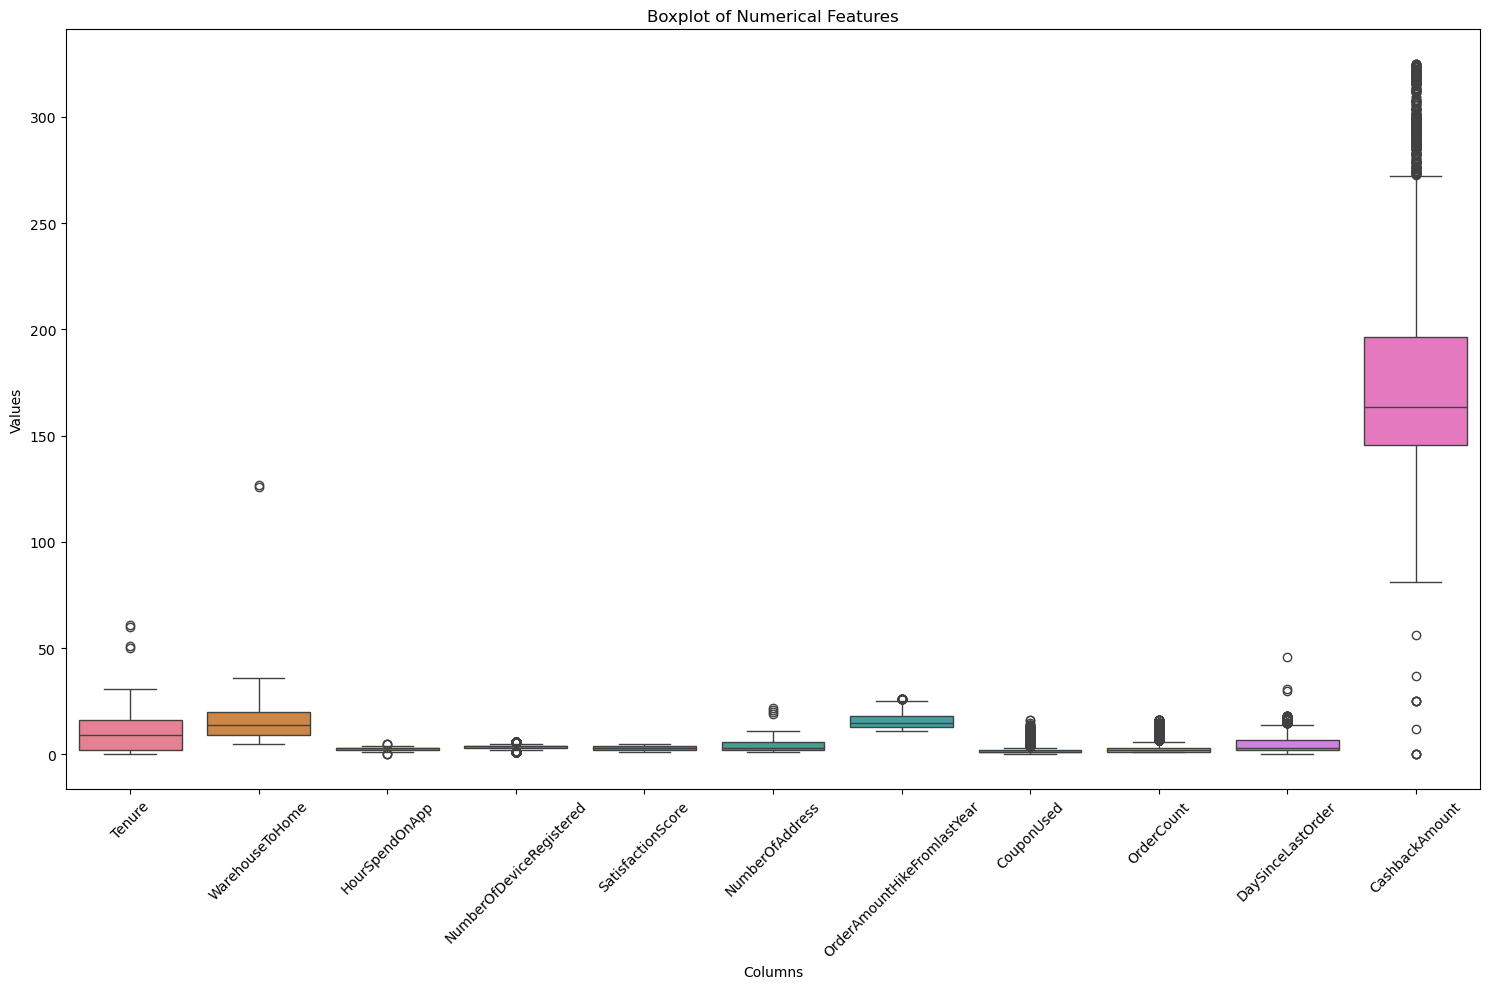

In [6]:
num_columns = [
    'Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore',
    'NumberOfAddress', 'OrderAmountHikeFromlastYear', 'CouponUsed', 
    'OrderCount', 'DaySinceLastOrder', 'CashbackAmount'
]

plt.figure(figsize=(15, 10))  
sns.boxplot(data=df[num_columns])
plt.title('Boxplot of Numerical Features')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.xticks(rotation=45) 

plt.tight_layout()
plt.show()

Berdasarkan boxplot di atas, dapat dilihat bahwa hampir seluruh kolom numerik, kecuali SatisfactionScore, memiliki nilai outliers. Hal ini dapat dilihat dari adanya titik-titik yang berada di luar whiskers dan ini menunjukkan adanya nilai ekstrem yang perlu dilihat lebih lanjut. 

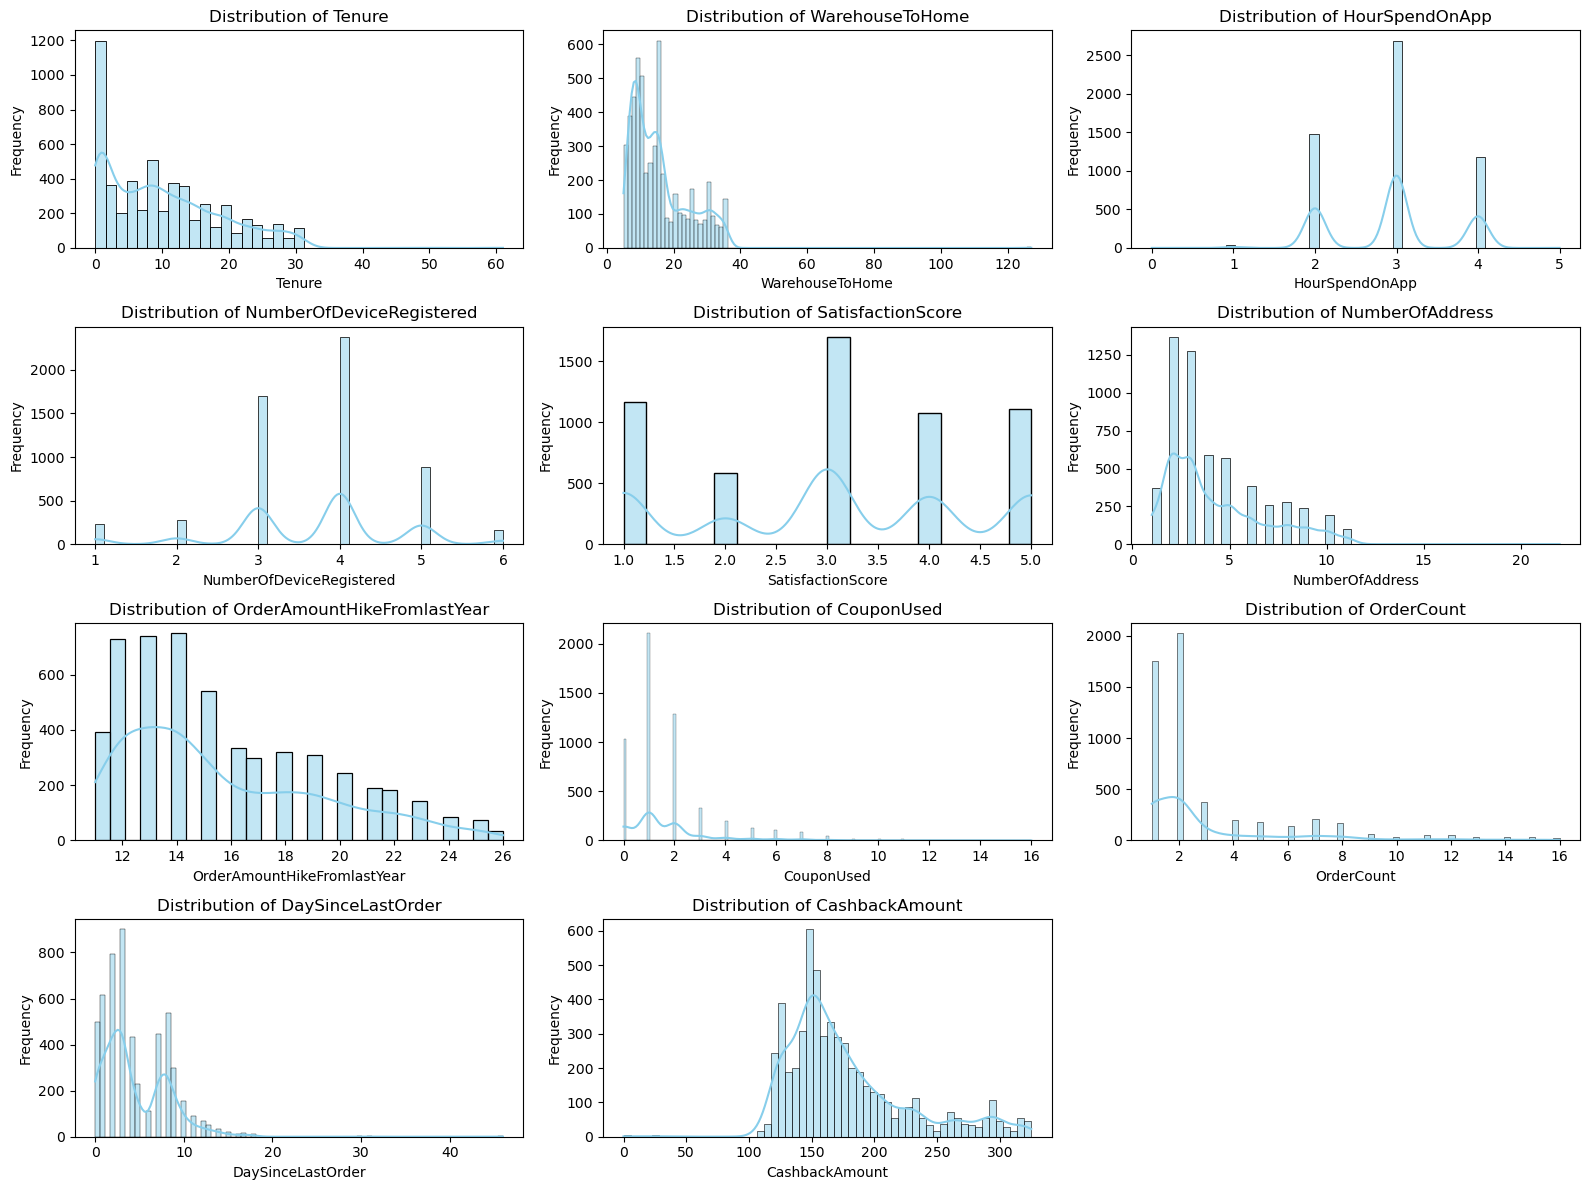

In [7]:
plt.figure(figsize=(16, 12))
for i, feature in enumerate(num_columns, 1):
    plt.subplot(4, 3, i) 
    sns.histplot(df[feature].dropna(), kde=True, color='skyblue') 
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

1. **Distribution of Tenure:**
   - Distribusi cenderung menurun. Sebagian besar pengguna memiliki tenure yang pendek (0-10 bulan), sedangkan pengguna dengan tenure lebih lama menjadi semakin sedikit.

2. **Distribution of WarehouseToHome:**
   - Data ini menunjukkan jarak (dalam satuan tertentu) antara gudang ke rumah pelanggan. Sebagian besar jarak antara gudang dan rumah berkisar dalam jarak pendek (0-20), dan jarak lebih jauh menjadi lebih jarang.

3. **Distribution of HourSpendOnApp:**
   - Distribusi berbentuk unimodal, dengan puncak utama di sekitar 3 jam. Sebagian besar pengguna menghabiskan waktu sekitar 2-4 jam di aplikasi.

4. **Distribution of NumberOfDeviceRegistered:**
   - Data ini menunjukkan jumlah perangkat yang terdaftar, dengan puncak signifikan pada angka bulat ( 3, 4, dan 5). Sebagian besar pengguna tampaknya mendaftarkan 3 hingga 5 perangkat.

5. **Distribution of SatisfactionScore:**
   - Distribusi ini hampir normal, dengan mayoritas pengguna memberikan skor kepuasan sekitar 3 hingga 4, menunjukkan tingkat kepuasan yang cukup baik.

6. **Distribution of NumberOfAddress:**
   - Sebagian besar pelanggan memiliki kurang dari 5 alamat yang terdaftar. Distribusi sangat tidak merata, dengan lebih sedikit pelanggan memiliki lebih banyak alamat.

7. **Distribution of OrderAmountHikeFromLastYear:**
   - Distribusi ini menunjukkan banyak pelanggan mengalami kenaikan jumlah pesanan di kisaran 12-20 dari tahun sebelumnya. Namun, kenaikan di atas angka tersebut menjadi semakin langka.

8. **Distribution of CouponUsed:**
   - Sebagian besar pengguna tidak menggunakan hingga  menggunakan sekitar 2 kupon, tetapi ada pengguna tertentu yang menggunakan lebih banyak kupon.

9. **Distribution of OrderCount:**
   - Sebagian besar pelanggan melakukan 1-2 pesanan. Frekuensi pelanggan dengan jumlah pesanan lebih tinggi menurun drastis.

10. **Distribution of DaySinceLastOrder:**
    - Distribusi menunjukkan sebagian besar pelanggan baru saja melakukan pesanan terakhirnya (0-10 hari yang lalu), dengan frekuensi yang turun secara eksponensial untuk hari-hari yang lebih lama.

11. **Distribution of CashbackAmount:**
    - Cashback yang diberikan sebagian besar berkisar antara 100 hingga 200. Distribusi ini relatif simetris, dengan penyebaran data yang lebih kecil di kedua sisi rata-rata. 

**Data Correlation**

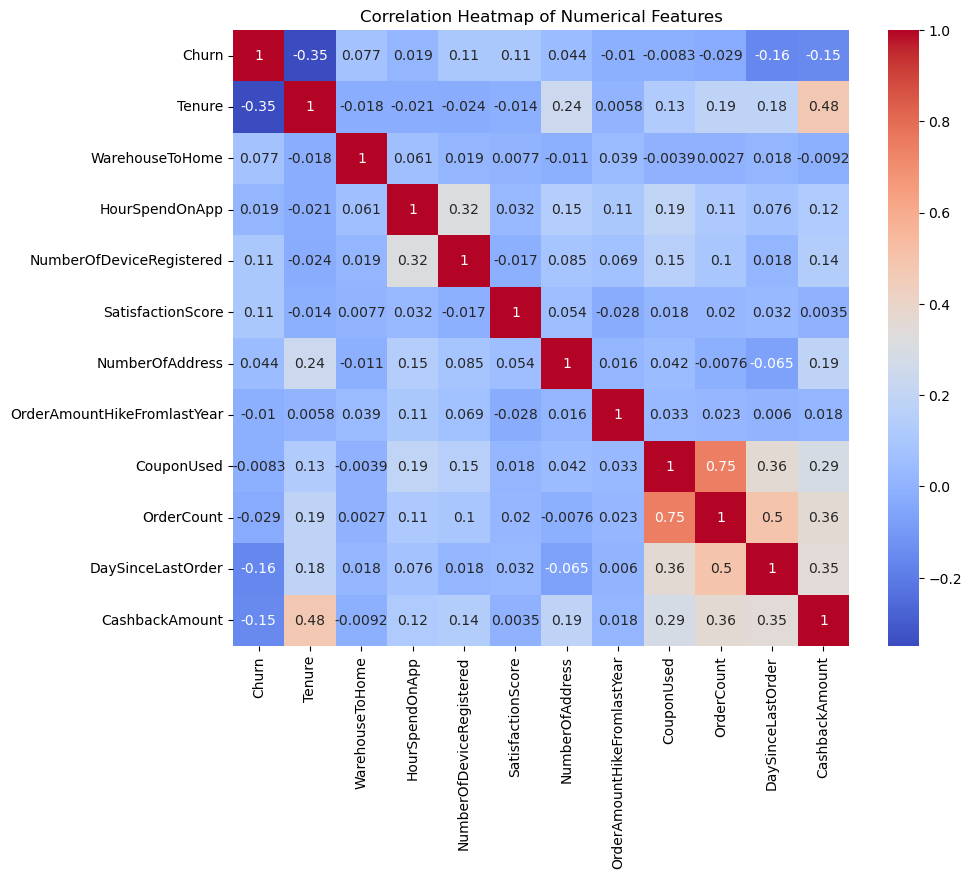

In [8]:
col = [
    'Churn','Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore',
    'NumberOfAddress', 'OrderAmountHikeFromlastYear', 'CouponUsed', 
    'OrderCount', 'DaySinceLastOrder', 'CashbackAmount'
]
correlation_matrix = df[col].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

Fitur dengan dampak terbesar terhadap churn adalah Tenure dengan korelasi negatif yang signifikan, menunjukkan bahwa loyalitas pelanggan meningkat dengan waktu. DaySinceLastOrder dan CashbackAmount juga memiliki efek negatif moderat terhadap churn, yang berarti menjaga pelanggan aktif dengan cashback dapat membantu mengurangi churn. Fitur lain menunjukkan korelasi yang lemah atau tidak signifikan dengan churn.

In [9]:
cat_columns = ['PreferredLoginDevice', 'CityTier', 'PreferredPaymentMode', 
                        'Gender', 'PreferedOrderCat', 'MaritalStatus', 'Complain']

chi2_results = {}
for feature in cat_columns:
    contingency_table = pd.crosstab(df[feature], df['Churn'])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    chi2_results[feature] = p

chi2_results = pd.DataFrame(list(chi2_results.items()), columns=['Feature', 'p-value'])
print("Hasil tes Chi-square untuk kolom kategorikal dengan Churn:")
print(chi2_results)

Hasil tes Chi-square untuk kolom kategorikal dengan Churn:
                Feature       p-value
0  PreferredLoginDevice  1.075692e-16
1              CityTier  1.261200e-09
2  PreferredPaymentMode  9.708709e-15
3                Gender  3.082094e-02
4      PreferedOrderCat  2.770833e-60
5         MaritalStatus  1.073011e-41
6              Complain  2.664461e-78


Semua fitur kategorikal yang diuji menunjukkan hubungan yang signifikan dengan churn (p-value < 0.05). Fitur seperti Complain, PreferedOrderCat, dan PreferredLoginDevice memiliki p-value yang sangat kecil, menandakan hubungan yang sangat kuat dengan churn. Ini menunjukkan bahwa fokus pada penanganan keluhan, pemahaman preferensi pelanggan, dan personalisasi layanan berdasarkan perangkat dan kategori pesanan dapat membantu mengurangi churn.

**Data Cardinalities**

In [10]:
listItem = []
for col in df.columns:
    unique_values = df[col].drop_duplicates().values
    sample_size = min(7, len(unique_values))
    unique_sample = list(df[col].drop_duplicates().sample(sample_size).values)
    listItem.append([col, df[col].dtype, df[col].nunique(), unique_sample])

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'unique', 'uniqueSample'],
                      data=listItem)
dfDesc

,dataFeatures,dataType,unique,uniqueSample
0,CustomerID,int64,5630,"[50966, 53753, 52938, 50963, 51685, 51069, 53878]"
1,Churn,int64,2,"[1, 0]"
2,Tenure,float64,36,"[25.0, 2.0, 27.0, 5.0, 50.0, 26.0, 0.0]"
3,PreferredLoginDevice,object,3,"[Phone, Mobile Phone, Computer]"
4,CityTier,int64,3,"[3, 2, 1]"
5,WarehouseToHome,float64,34,"[29.0, 127.0, 33.0, 10.0, 15.0, 31.0, 32.0]"
6,PreferredPaymentMode,object,7,"[COD, Debit Card, CC, E wallet, Cash on Delive..."
7,Gender,object,2,"[Female, Male]"
8,HourSpendOnApp,float64,6,"[3.0, 4.0, 2.0, nan, 0.0, 5.0, 1.0]"
9,NumberOfDeviceRegistered,int64,6,"[3, 6, 2, 5, 1, 4]"


Berdasarkan pengecekan nilai unik pada dataset, pada beberapa kolom, ditemukan beberapa nilai dengan penamaan yang tidak konsisten. Misalnya pada kolom PrefferedLoginDevice terdapat nilai 'Mobile Phone' dan 'Phone' yang merujuk ke perangkat yang sama. Kemudian pada kolom PreferredPaymentMode terdapat 'CC' dan 'Credit Card' yang merujuk kepada penggunaan kartu kredit, serta 'COD' dan 'Cash on Delivery' yang merujuk pada satu metode pembayaran yang sama. Selain itu, pada kolom PreferedOrderCat terdapat 'Mobile' dan 'Mobile Phone' yang merujuk pada kategori yang sama. 

**Identifying Missing Value**

In [11]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'nullCount', 'nullPercentage'],
                     data=listItem)
dfDesc

,dataFeatures,dataType,nullCount,nullPercentage
0,CustomerID,int64,0,0.00
1,Churn,int64,0,0.00
2,Tenure,float64,264,4.69
3,PreferredLoginDevice,object,0,0.00
4,CityTier,int64,0,0.00
5,WarehouseToHome,float64,251,4.46
6,PreferredPaymentMode,object,0,0.00
7,Gender,object,0,0.00
8,HourSpendOnApp,float64,255,4.53
9,NumberOfDeviceRegistered,int64,0,0.00


Terdapat 7 kolom yang memiliki missing value, Tenure, WerehouseToHome, HourSpendOnApp, OrderAmountHikeFromlastYear, CouponUsed, OrderCount, DaySinceLastOrder. 

<Axes: >

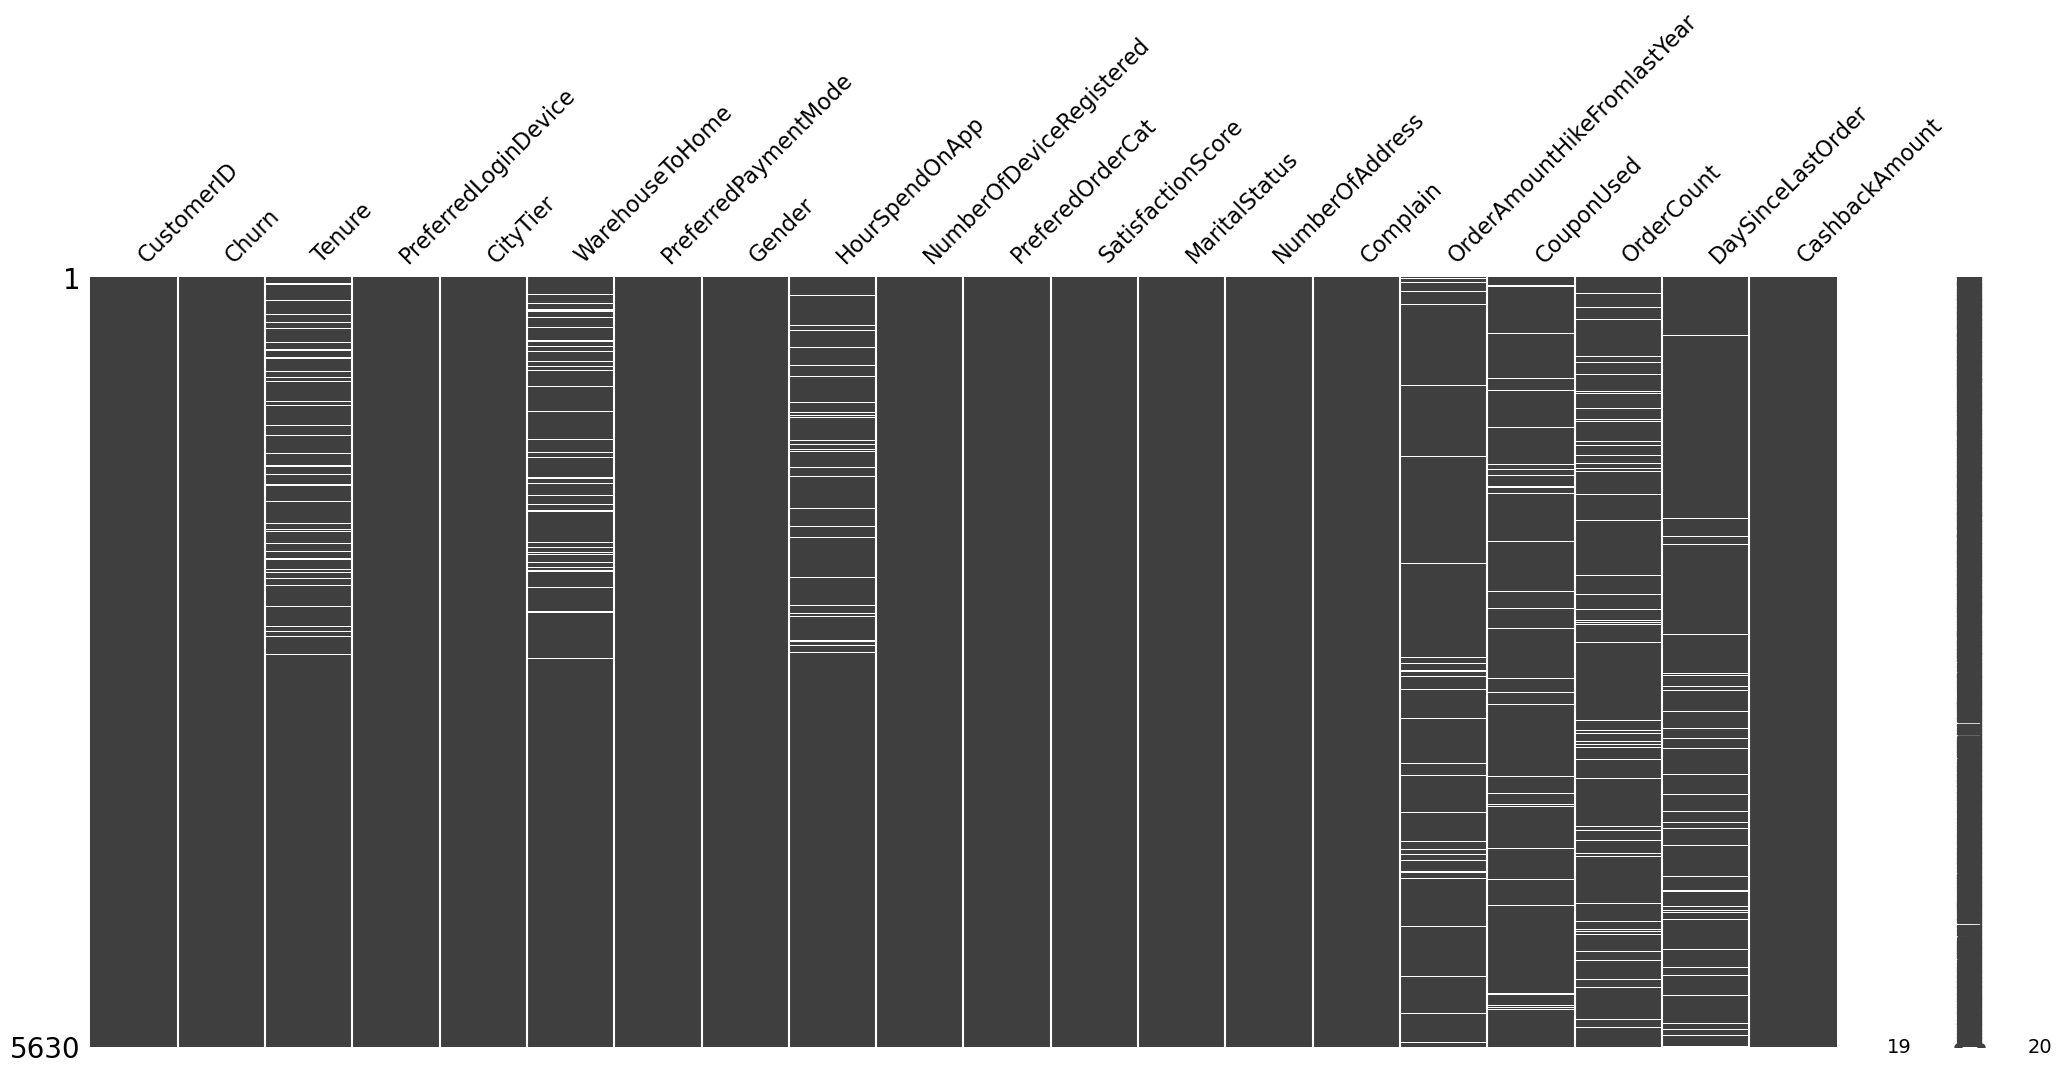

In [12]:
msno.matrix(df)

Missing value pada dateset ini dapat diklasifikasikan menjadi 3, yaitu: 

1. Missing Completely at Random (MCAR)
Data MCAR adalah data yang nilai hilangnya tidak memiliki pola tertentu. Fitur WarehouseToHome dan HourSpendOnApp mungkin termasuk dalam kategori MCAR, karena waktu yang dihabiskan di aplikasi atau jarak ke gudang mungkin tidak bergantung pada fitur lainnya.
- Pendekatan Penanganan: Karena data MCAR tidak bergantung pada fitur lain, nilai yang hilang dapat diisi dengan nilai rata-rata atau median tanpa menimbulkan bias yang berarti.

2. Missing at Random (MAR)
Nilai hilang pada MAR berkaitan dengan data lain yang teramati. Fitur seperti Tenure dan OrderAmountHikeFromlastYear bisa termasuk MAR, karena pelanggan dengan masa penggunaan yang lebih singkat mungkin memiliki lebih banyak data yang hilang, dan kebiasaan belanja (sehingga kenaikan jumlah order) dapat berkorelasi dengan masa penggunaan atau waktu penggunaan aplikasi.
- Pendekatan Penanganan: Untuk data MAR, metode seperti imputasi berdasarkan fitur yang terkait (misalnya, menggunakan pengelompokan berdasarkan masa penggunaan untuk mengisi nilai hilang) atau model prediktif dapat digunakan untuk mengisi nilai hilang berdasarkan pola dalam data yang teramati.

3. Missing Not at Random (MNAR)
MNAR terjadi ketika nilai hilang terkait dengan nilai dari fitur itu sendiri. Fitur CouponUsed, OrderCount, dan DaySinceLastOrder mungkin termasuk MNAR jika, misalnya, pelanggan yang jarang menggunakan kupon atau jarang memesan memiliki nilai hilang pada fitur-fitur ini, atau ada periode tanpa pesanan baru.
- Pendekatan Penanganan: Untuk MNAR, strategi yang efektif meliputi membuat variabel indikator untuk menandai tempat data hilang, karena hilangnya nilai ini bisa saja memiliki informasi penting. Alternatifnya, bisa dipertimbangkan imputasi berdasarkan pengetahuan spesifik domain atau memodelkan missingness langsung jika memungkinkan.

Langkah Selanjutnya
Untuk menangani missing value ini:
- MCAR: Gunakan imputasi median.
- MAR:  KNN Imputer.
- MNAR: Buat variabel indikator dan gunakan pengetahuan spesifik domain atau pertimbangkan strategi imputasi lanjutan seperti iterative imputer.

**Note**: Imputasi data dilakukan terpisah berdasarkan nilai variabel kategori `Churn`. Untuk baris dengan kategori tertentu, nilai yang hilang diimputasi menggunakan median dan KNN dari subset data yang memiliki kategori yang sama. Hal ini memastikan bahwa imputasi dilakukan sesuai dengan distribusi data dalam masing-masing grup kategori tersebut.

**Identifying Duplicates**

In [13]:
df[df.duplicated()].shape[0]

0

Dapat dilihat bahwa tidak terdapat data duplikat yang teridentifikasi. 

**Identifying Outliers**

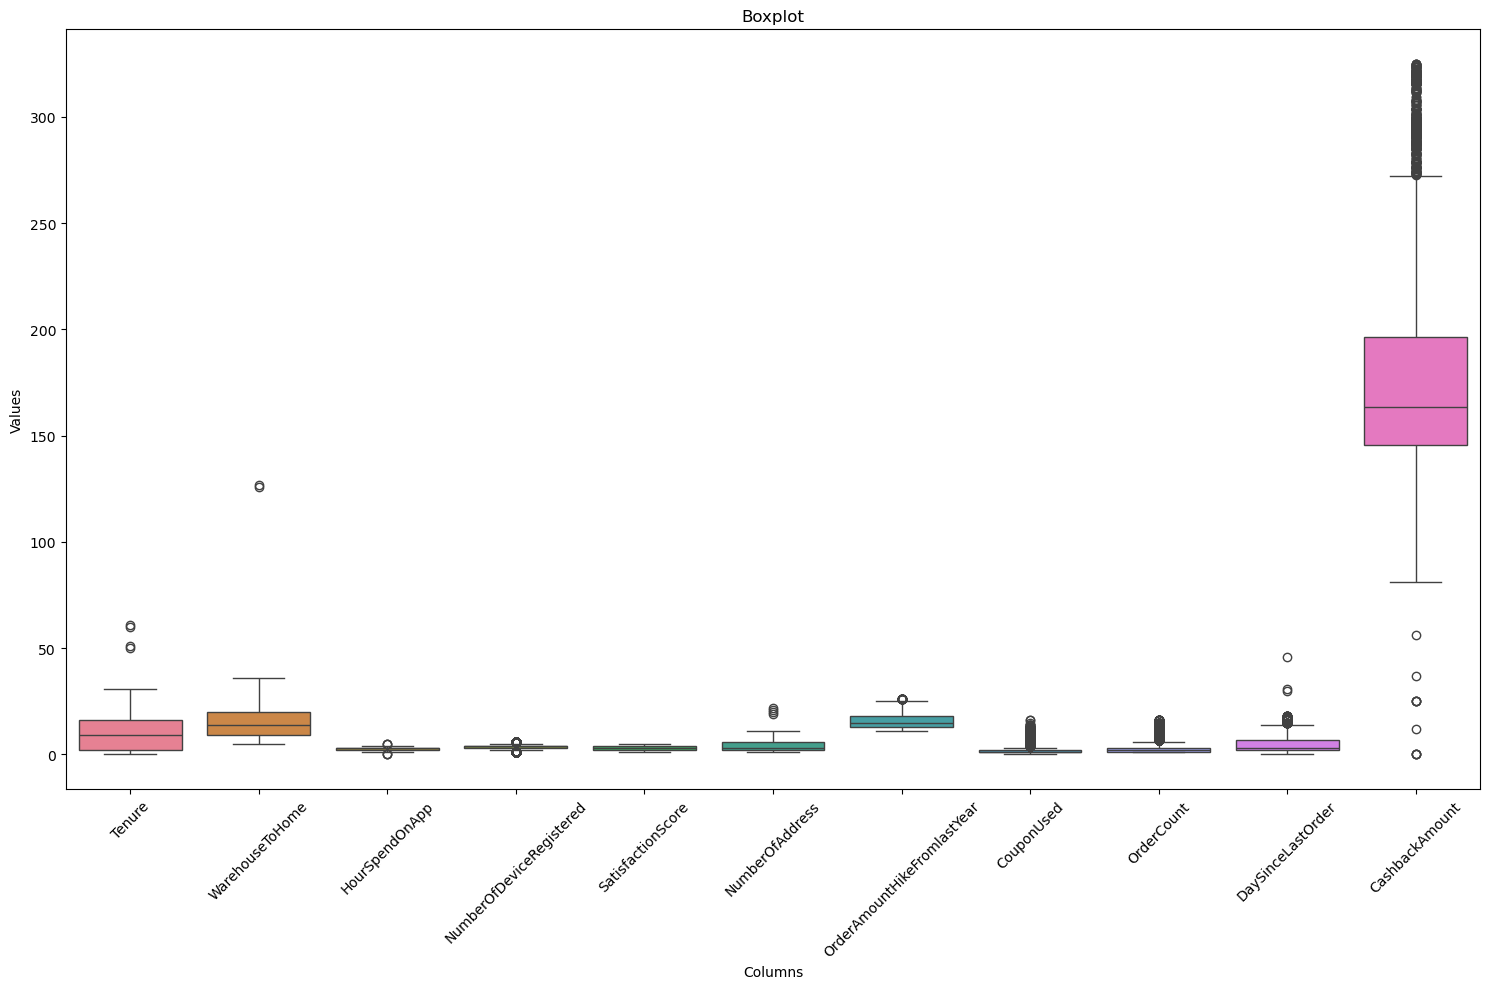

In [14]:
num_columns = [
    'Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore',
    'NumberOfAddress', 'OrderAmountHikeFromlastYear', 'CouponUsed', 
    'OrderCount', 'DaySinceLastOrder', 'CashbackAmount'
]

plt.figure(figsize=(15, 10))  
sns.boxplot(data=df[num_columns])
plt.title('Boxplot')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.xticks(rotation=45) 

plt.tight_layout()
plt.show()

Outliers pada dataset dapat dilihat melalui boxplot yang telah dilakukan sebelumnya untuk melihat distribusi data. Pada grafik tersebut dapat dilihat bahwa hampir seluruh kolom numerikal, kecuali SatisfactionScore, memiliki nilai outliers. Selanjutnya, dapat dicari berapa banyak outliers dari masing-masing kolom. 

In [15]:
def count_outliers(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    return outliers.shape[0]

outliers_counts = {col: count_outliers(df, col) for col in num_columns}

for col, count in outliers_counts.items():
    print(f"{col}: {count} outliers")

Tenure: 4 outliers
WarehouseToHome: 2 outliers
HourSpendOnApp: 6 outliers
NumberOfDeviceRegistered: 397 outliers
SatisfactionScore: 0 outliers
NumberOfAddress: 4 outliers
OrderAmountHikeFromlastYear: 33 outliers
CouponUsed: 629 outliers
OrderCount: 703 outliers
DaySinceLastOrder: 62 outliers
CashbackAmount: 438 outliers


Berdasarkan hasil pengecekan, data yang termasuk ke dalam outliers dapat dikatakan cukup banyak sehingga penghapusan mungkin akan mempengaruhi hasil analisis. Pendekatan penanganan outliers yang dilakukan adalah mengganti nilai outliers dengan nilai ambang batas yang dihitung berdasarkan upper range dan lower range dari masing-masing kolom. Hal ini dilakukan mengurangi pengaruh nilai ekstrim tersebut terhadap model atau analisis tanpa menghapus data. 

### **Data Preprocessing**

In [16]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'unique', 'uniqueSample'],
                     data=listItem)
dfDesc

,dataFeatures,dataType,unique,uniqueSample
0,CustomerID,int64,5630,"[54769, 52362]"
1,Churn,int64,2,"[1, 0]"
2,Tenure,float64,36,"[60.0, 31.0]"
3,PreferredLoginDevice,object,3,"[Mobile Phone, Phone]"
4,CityTier,int64,3,"[1, 3]"
5,WarehouseToHome,float64,34,"[nan, 7.0]"
6,PreferredPaymentMode,object,7,"[E wallet, COD]"
7,Gender,object,2,"[Female, Male]"
8,HourSpendOnApp,float64,6,"[2.0, 4.0]"
9,NumberOfDeviceRegistered,int64,6,"[1, 6]"


Pada beberapa kolom, ditemukan beberapa nilai yang tidak konsisten. Misalnya pada kolom PrefferedLoginDevice terdapat nilai 'Mobile Phone' dan 'Phone' yang merujuk ke perangkat yang sama. Oleh karenanya, dilakukan replace value untuk menangani hal ini. Selain kolom PrefferedLoginDevice, pada kolom PreferredPaymentMode dan PreferedOrderCat juga ditemukan hal yang sama.

In [17]:
df['PreferredLoginDevice'].replace('Phone', 'Mobile Phone', inplace=True)
df['PreferredPaymentMode'].replace({'CC': 'Credit Card', 'COD': 'Cash on Delivery'}, inplace=True)
df['PreferedOrderCat'].replace('Mobile' , 'Mobile Phone', inplace=True)

***Missing Values***

In [18]:
df.isna().sum()/df.shape[0]*100

CustomerID                     0.000000
Churn                          0.000000
Tenure                         4.689165
PreferredLoginDevice           0.000000
CityTier                       0.000000
WarehouseToHome                4.458259
PreferredPaymentMode           0.000000
Gender                         0.000000
HourSpendOnApp                 4.529307
NumberOfDeviceRegistered       0.000000
PreferedOrderCat               0.000000
SatisfactionScore              0.000000
MaritalStatus                  0.000000
NumberOfAddress                0.000000
Complain                       0.000000
OrderAmountHikeFromlastYear    4.706927
CouponUsed                     4.547069
OrderCount                     4.582593
DaySinceLastOrder              5.452931
CashbackAmount                 0.000000
dtype: float64

Terdapat 7 kolom yang memiliki missing value, Tenure, WerehouseToHome, HourSpendOnApp, OrderAmountHikeFromlastYear, CouponUsed, OrderCount, DaySinceLastOrder

In [19]:
df.isna().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

Ringkasan dari pengecekan nilai null pada dataset dapat dilihat melalui tabel berikut:

In [20]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'nullCount', 'nullPercentage'],
                     data=listItem)
dfDesc

,dataFeatures,dataType,nullCount,nullPercentage
0,CustomerID,int64,0,0.00
1,Churn,int64,0,0.00
2,Tenure,float64,264,4.69
3,PreferredLoginDevice,object,0,0.00
4,CityTier,int64,0,0.00
5,WarehouseToHome,float64,251,4.46
6,PreferredPaymentMode,object,0,0.00
7,Gender,object,0,0.00
8,HourSpendOnApp,float64,255,4.53
9,NumberOfDeviceRegistered,int64,0,0.00


Berdasarkan identifikasi missing value sebelumnya, penanganan missing value untuk kolom Tenure dan OrderAmountHikeFromLastYear akan ditangani dengan menggunakan KNNImputer. Sedangkan pada kolom WareHouseToHome dan HourSpendOnApp akan menggunakan nilai median dari masing-masing kolom. 

In [21]:
knn_imputer = KNNImputer(n_neighbors=5)

df.loc[df['Churn'] == 0, ['Tenure', 'OrderAmountHikeFromlastYear']] = knn_imputer.fit_transform(
    df.loc[df['Churn'] == 0, ['Tenure', 'OrderAmountHikeFromlastYear']]
)

df.loc[df['Churn'] == 1, ['Tenure', 'OrderAmountHikeFromlastYear']] = knn_imputer.fit_transform(
    df.loc[df['Churn'] == 1, ['Tenure', 'OrderAmountHikeFromlastYear']]
)

In [22]:
median_imputer = SimpleImputer(strategy='median')

df.loc[df['Churn'] == 0, ['WarehouseToHome', 'HourSpendOnApp']] = median_imputer.fit_transform(
    df.loc[df['Churn'] == 0, ['WarehouseToHome', 'HourSpendOnApp']]
)

df.loc[df['Churn'] == 1, ['WarehouseToHome', 'HourSpendOnApp']] = median_imputer.fit_transform(
    df.loc[df['Churn'] == 1, ['WarehouseToHome', 'HourSpendOnApp']]
)

Penanganan untuk MNAR 

1. CouponUsed  
   - Nilai yang hilang pada CouponUsed dapat terjadi jika pelanggan jarang atau bahkan tidak pernah menggunakan kupon. Pendekatan yang dapat dilakukan adalah mengisi nilai hilang dengan nilai 0 (untuk menandakan bahwa kupon tidak digunakan), atau membuat variabel indikator yang mencatat nilai hilang sebagai kategori khusus, misalnya “Tidak Digunakan”.
   - Penggunaan kupon umumnya bersifat sporadis atau preferensi tertentu, sehingga asumsi ini logis.

2. OrderCount  
   - Pada OrderCount, nilai hilang dapat diasumsikan sebagai tidak adanya pesanan pada periode tertentu. Pendekatan ini dapat diatasi dengan mengisi nilai hilang dengan angka 0 atau membuat indikator khusus untuk menunjukkan adanya periode non-pesanan.
   - Banyak e-commerce mencatat periode tanpa aktivitas pesanan, sehingga nilai 0 atau variabel indikator dapat memberikan wawasan lebih lanjut.


In [23]:
df['CouponUsed'] = df['CouponUsed'].fillna(0)
df['OrderCount'] = df['OrderCount'].fillna(0)

3. DaySinceLastOrder  
   - Jika missing values di kolom DaySinceLastOrder menggambarkan ketidakaktifan atau ketiadaan pesanan, mengisi nilai hilang dengan perkiraan tertentu bisa menyesatkan. Menambahkan variabel indikator (flag) untuk menunjukkan pelanggan yang memiliki nilai missing di kolom ini dapat memberikan insight tambahan. Ini sangat berguna karena memungkinkan analisis terpisah antara pelanggan yang aktif dan tidak aktif.
   - Tambahkan kolom baru, misalnya NoLastOrderInfo, yang berisi nilai 1 jika DaySinceLastOrder hilang dan 0 jika tidak. Setelah menandai, nilai hilang di DaySinceLastOrder bisa diisi dengan nilai median atau mean.
   - Jika pelanggan tertentu tidak pernah memesan, isi nilai hilangnya dengan median dan berikan indikator 1 pada kolom NoLastOrderInfo. Dengan demikian, kita dapat menyegmentasi pelanggan berdasarkan aktivitas mereka.
   - Dengan pendekatan ini, kita menggunakan konteks operasional dari e-commerce untuk memastikan bahwa pengisian nilai hilang tetap memberikan informasi yang relevan dan tidak mengaburkan pola dalam data.

In [24]:
df['NoLastOrderInfo'] = df['DaySinceLastOrder'].isna().astype(int)

In [25]:
median_imputer = SimpleImputer(strategy='median')

df.loc[df['Churn'] == 0, ['DaySinceLastOrder']] = median_imputer.fit_transform(
    df.loc[df['Churn'] == 0, ['DaySinceLastOrder']]
)

df.loc[df['Churn'] == 1, ['DaySinceLastOrder']] = median_imputer.fit_transform(
    df.loc[df['Churn'] == 1, ['DaySinceLastOrder']]
)

In [26]:
df.isna().sum()

CustomerID                     0
Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
NoLastOrderInfo                0
dtype: int64

***Outliers***

In [27]:
num_columns = [
    'Tenure','WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore',
    'NumberOfAddress', 'OrderAmountHikeFromlastYear', 'CouponUsed', 
    'OrderCount', 'DaySinceLastOrder', 'CashbackAmount'
]

def count_outliers(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    return outliers.shape[0]

outliers_counts = {col: count_outliers(df, col) for col in num_columns}

for col, count in outliers_counts.items():
    print(f"{col}: {count} outliers")

Tenure: 4 outliers
WarehouseToHome: 2 outliers
HourSpendOnApp: 6 outliers
NumberOfDeviceRegistered: 397 outliers
SatisfactionScore: 0 outliers
NumberOfAddress: 4 outliers
OrderAmountHikeFromlastYear: 33 outliers
CouponUsed: 629 outliers
OrderCount: 703 outliers
DaySinceLastOrder: 62 outliers
CashbackAmount: 438 outliers


Berdasarkan hasil identifikasi sebelumnya, data yang termasuk ke dalam outliers dapat dikatakan cukup banyak sehingga penghapusan memiliki potentsi untuk mempengaruhi hasil analisis. Pendekatan penanganan outliers yang dilakukan adalah mengganti nilai outliers dengan nilai ambang batas yang dihitung berdasarkan upper range dan lower range dari masing-masing kolom. Hal ini dilakukan mengurangi pengaruh nilai ekstrim tersebut terhadap model atau analisis tanpa menghapus data. 

In [28]:
num_columns = [
    'Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore',
    'NumberOfAddress', 'OrderAmountHikeFromlastYear', 'CouponUsed', 
    'OrderCount', 'DaySinceLastOrder', 'CashbackAmount'
]

def replace_outliers_with_bounds(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    data[col] = data[col].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))
    
    return data

for col in num_columns:
    df = replace_outliers_with_bounds(df, col)

In [29]:
outliers_counts = {col: count_outliers(df, col) for col in num_columns}

for col, count in outliers_counts.items():
    print(f"{col}: {count} outliers")

Tenure: 0 outliers
WarehouseToHome: 0 outliers
HourSpendOnApp: 0 outliers
NumberOfDeviceRegistered: 0 outliers
SatisfactionScore: 0 outliers
NumberOfAddress: 0 outliers
OrderAmountHikeFromlastYear: 0 outliers
CouponUsed: 0 outliers
OrderCount: 0 outliers
DaySinceLastOrder: 0 outliers
CashbackAmount: 0 outliers


***Remove Unused Data***

Beriktunya, dapat dilakukan penghapusan kolom yang tidak digunakan untuk analisis, yaitu kolom Customer ID. Kolom CustomerID dapat dihapus karena berisi ID unik pelanggan, dimana ID ini tidak memberikan informasi langsung tentang perilaku atau faktor churn.

In [30]:
df.drop(columns=['CustomerID'], inplace=True)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Churn                        5630 non-null   int64  
 1   Tenure                       5630 non-null   float64
 2   PreferredLoginDevice         5630 non-null   object 
 3   CityTier                     5630 non-null   int64  
 4   WarehouseToHome              5630 non-null   float64
 5   PreferredPaymentMode         5630 non-null   object 
 6   Gender                       5630 non-null   object 
 7   HourSpendOnApp               5630 non-null   float64
 8   NumberOfDeviceRegistered     5630 non-null   float64
 9   PreferedOrderCat             5630 non-null   object 
 10  SatisfactionScore            5630 non-null   int64  
 11  MaritalStatus                5630 non-null   object 
 12  NumberOfAddress              5630 non-null   float64
 13  Complain          

In [32]:
print(df.describe())

for i in df.select_dtypes('object').columns:
    print(f"ColumnName {i} : ", end = "")
    print(df[i].unique())

             Churn       Tenure     CityTier  WarehouseToHome  HourSpendOnApp  \
count  5630.000000  5630.000000  5630.000000      5630.000000     5630.000000   
mean      0.168384    10.081670     1.654707        15.520071        2.934636   
std       0.374240     8.344901     0.915389         8.094867        0.703826   
min       0.000000     0.000000     1.000000         5.000000        0.500000   
25%       0.000000     3.000000     1.000000         9.000000        2.000000   
50%       0.000000     9.000000     1.000000        13.000000        3.000000   
75%       0.000000    15.000000     3.000000        20.000000        3.000000   
max       1.000000    33.000000     3.000000        36.500000        4.500000   

       NumberOfDeviceRegistered  SatisfactionScore  NumberOfAddress  \
count               5630.000000        5630.000000      5630.000000   
mean                   3.695471           3.066785         4.207993   
std                    0.942015           1.380194       

### **Data Analysis**

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16432\1492328540.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_counts.index, y=churn_percent.values, palette='coolwarm')


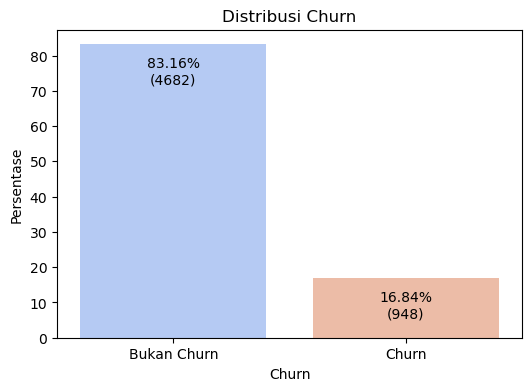

In [33]:
churn_counts = df['Churn'].value_counts()
churn_percent = df['Churn'].value_counts(normalize=True) * 100

plt.figure(figsize=(6, 4))
sns.barplot(x=churn_counts.index, y=churn_percent.values, palette='coolwarm')

for i, (count, percent) in enumerate(zip(churn_counts.values, churn_percent.values)):
    plt.text(i, percent - 12, f'{percent:.2f}%\n({count})', ha='center', va='bottom', color='black')

plt.title('Distribusi Churn')
plt.xlabel('Churn')
plt.ylabel('Persentase')
plt.xticks([0, 1], ['Bukan Churn', 'Churn'])
plt.show()

Distribusi churn menunjukkan bahwa 83.16% pelanggan (4682) masih aktif, sementara 16.84% (948) pelanggan telah churn. Analisis ini penting untuk menjawab "mengapa" churn terjadi dan bagaimana mencegahnya. Pelanggan yang churn cenderung menjadi hasil dari pengalaman buruk, ketidakpuasan, atau kurangnya keterikatan terhadap layanan. Tingkat churn sebesar 16.84% berarti ada potensi kehilangan hampir 1 dari 6 pelanggan, yang dapat berdampak signifikan pada pendapatan. Secara kuantitatif, ini mencerminkan tantangan yang signifikan dalam retensi pelanggan. 

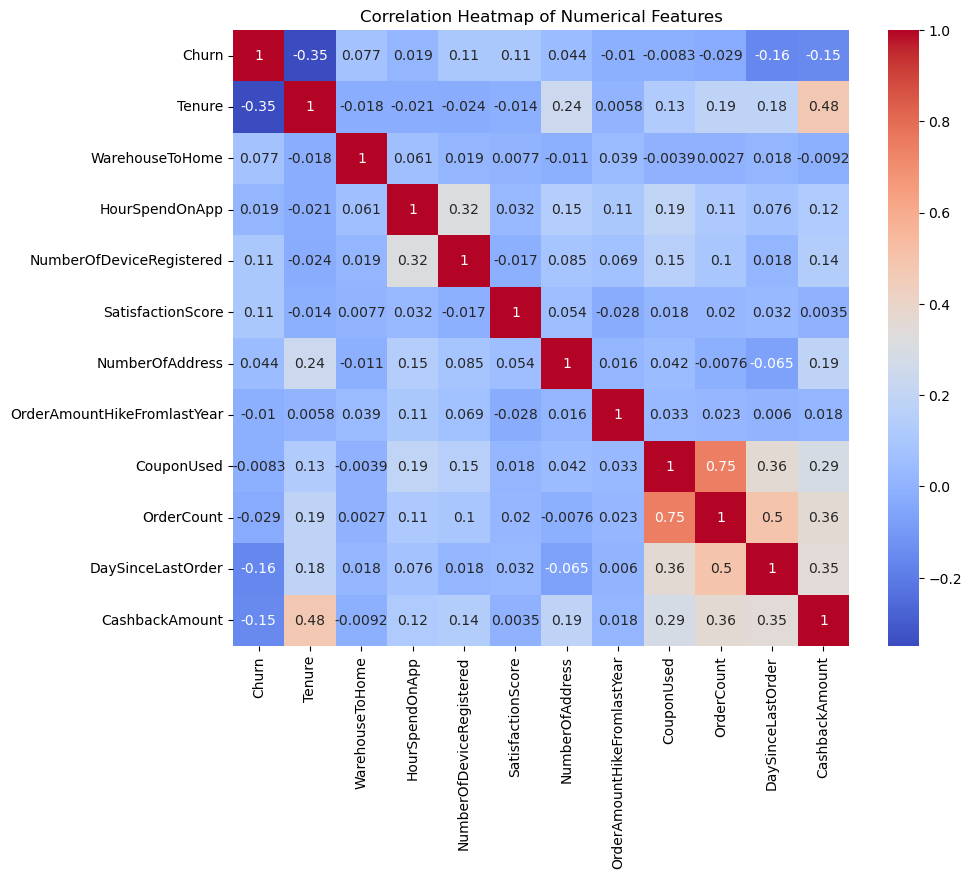

In [34]:
col = [
    'Churn','Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore',
    'NumberOfAddress', 'OrderAmountHikeFromlastYear', 'CouponUsed', 
    'OrderCount', 'DaySinceLastOrder', 'CashbackAmount'
]
correlation = df[col].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

Berdasarkan heatmap korelasi variabel numerik terhadap **Churn**, beberapa insight menarik dapat diidentifikasi. Variabel **Tenure** memiliki korelasi negatif yang cukup signifikan (-0.35) dengan churn, menunjukkan bahwa pelanggan dengan masa keanggotaan lebih lama cenderung lebih kecil kemungkinannya untuk churn. Selain itu, **DaySinceLastOrder** juga memiliki korelasi negatif moderat (-0.16), yang mengindikasikan bahwa pelanggan yang melakukan pesanan baru-baru ini cenderung tidak churn. Sebaliknya, fitur seperti **SatisfactionScore**, **NumberOfDeviceRegistered**, dan **CashbackAmount** memiliki korelasi positif kecil dengan churn (0.11), namun dampaknya relatif lebih lemah. 

- **Insight:** Pelanggan dengan tenure pendek atau yang jarang melakukan pesanan terbaru lebih berisiko untuk churn. 
- **Rekomendasi:** Fokus pada retensi pelanggan baru dengan meningkatkan program onboarding, menawarkan insentif untuk pesanan pertama, serta memperhatikan pengalaman mereka di awal perjalanan pelanggan. 
- **Aksi:** Identifikasi pelanggan dengan tenure pendek dan waktu lama sejak pesanan terakhir, lalu tawarkan promosi atau komunikasi personal untuk meningkatkan keterlibatan dan mengurangi risiko churn. Kombinasi strategi ini dapat secara efektif mempertahankan pelanggan dalam ekosistem layanan.

**Churn dengan PreferredLoginDevice**

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16432\2483174268.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  axes[0].text(i, churn_percent[1][i] / 2, f'{churn_counts[1][i]}\n({churn_percent[1][i]:.1f}%)', ha='center', color='black')
C:\Users\ASUS\AppData\Local\Temp\ipykernel_16432\2483174268.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  axes[0].text(i, churn_percent[1][i] + churn_percent[0][i] / 2, f'{churn_counts[0][i]}\n({churn_percent[0][i]:.1f}%)', ha='center', color='black')


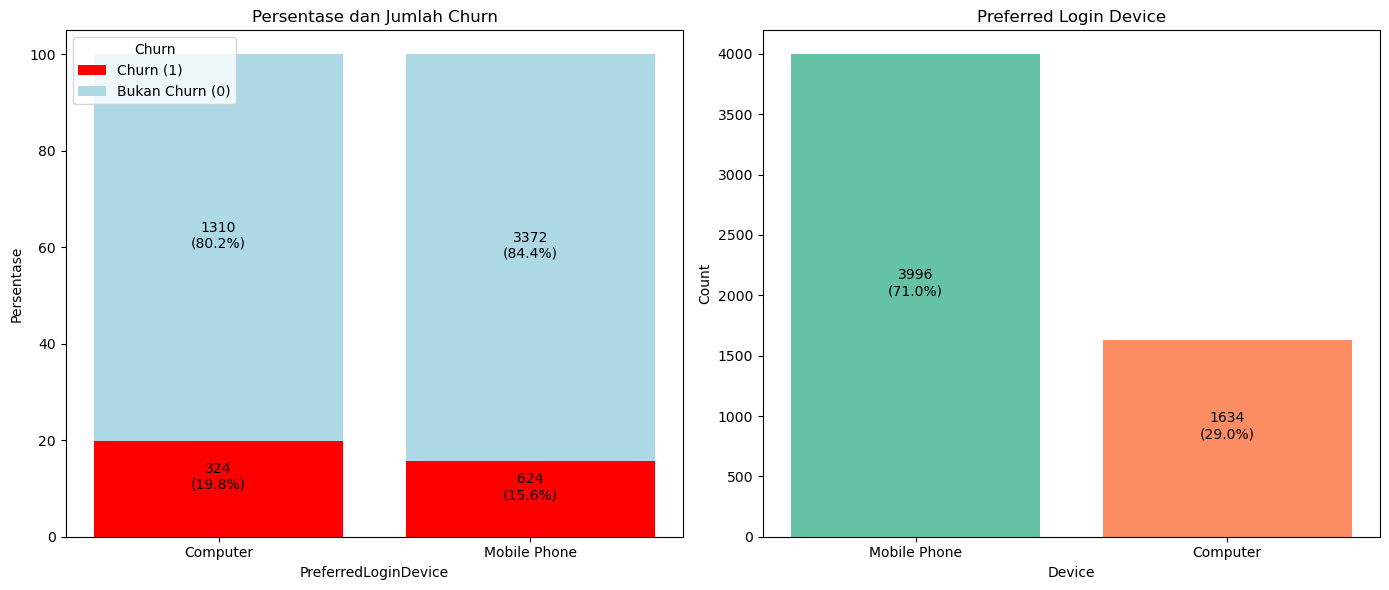

In [35]:
summary = df['PreferredLoginDevice'].value_counts()
percentages = (summary / summary.sum()) * 100

churn_counts = df.groupby(['PreferredLoginDevice', 'Churn']).size().unstack(fill_value=0)
churn_percent = churn_counts.div(churn_counts.sum(axis=1), axis=0) * 100

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].bar(churn_percent.index, churn_percent[1], label='Churn (1)', color='red')
axes[0].bar(churn_percent.index, churn_percent[0], bottom=churn_percent[1], label='Bukan Churn (0)', color='lightblue')

for i, device in enumerate(churn_percent.index):
    axes[0].text(i, churn_percent[1][i] / 2, f'{churn_counts[1][i]}\n({churn_percent[1][i]:.1f}%)', ha='center', color='black')
    axes[0].text(i, churn_percent[1][i] + churn_percent[0][i] / 2, f'{churn_counts[0][i]}\n({churn_percent[0][i]:.1f}%)', ha='center', color='black')

axes[0].set_title('Persentase dan Jumlah Churn')
axes[0].set_xlabel('PreferredLoginDevice')
axes[0].set_ylabel('Persentase')
axes[0].legend(title='Churn', loc='upper left')

axes[1].bar(summary.index, summary, color=sns.color_palette('Set2'))
for idx, (count, percentage) in enumerate(zip(summary, percentages)):
    axes[1].text(idx, count / 2, f'{count}\n({percentage:.1f}%)', ha='center', color='black')

axes[1].set_title('Preferred Login Device')
axes[1].set_ylabel('Count')
axes[1].set_xlabel('Device')

plt.tight_layout()
plt.show()

Dalam analisis ini, kita melihat perbedaan tingkat churn berdasarkan perangkat login yang disukai pelanggan. Pengguna komputer memiliki tingkat churn lebih tinggi, yaitu 19.8% (324 dari 1634 pelanggan), dibandingkan pengguna ponsel dengan 15.6% (624 dari 3996 pelanggan). Sebaliknya, pengguna ponsel menunjukkan tingkat retensi yang lebih tinggi (84.4%) dibandingkan pengguna komputer (80.2%). Fakta ini mengisyaratkan bahwa pengguna komputer mungkin menghadapi tantangan yang memengaruhi pengalaman mereka, seperti antarmuka pengguna yang kurang optimal atau keterbatasan fitur dibandingkan pengguna ponsel yang cenderung lebih terlayani. 

- **Insight:** Pengguna komputer merupakan segmen yang lebih rentan churn dan membutuhkan perhatian khusus. 
- **Rekomendasi:** Tingkatkan pengalaman pengguna komputer dengan optimalisasi platform, seperti memperbaiki desain, kecepatan akses, dan ketersediaan fitur yang setara dengan aplikasi ponsel. 
- **Aksi:** Luncurkan kampanye survei untuk memahami kebutuhan pengguna komputer lebih dalam, sambil menawarkan insentif seperti diskon khusus kepada segmen ini untuk meningkatkan retensi dan menurunkan churn. 

**Churn dengan CityTier**

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16432\199284270.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='CityTier', data=df, ax=axes[1], palette='Set2')


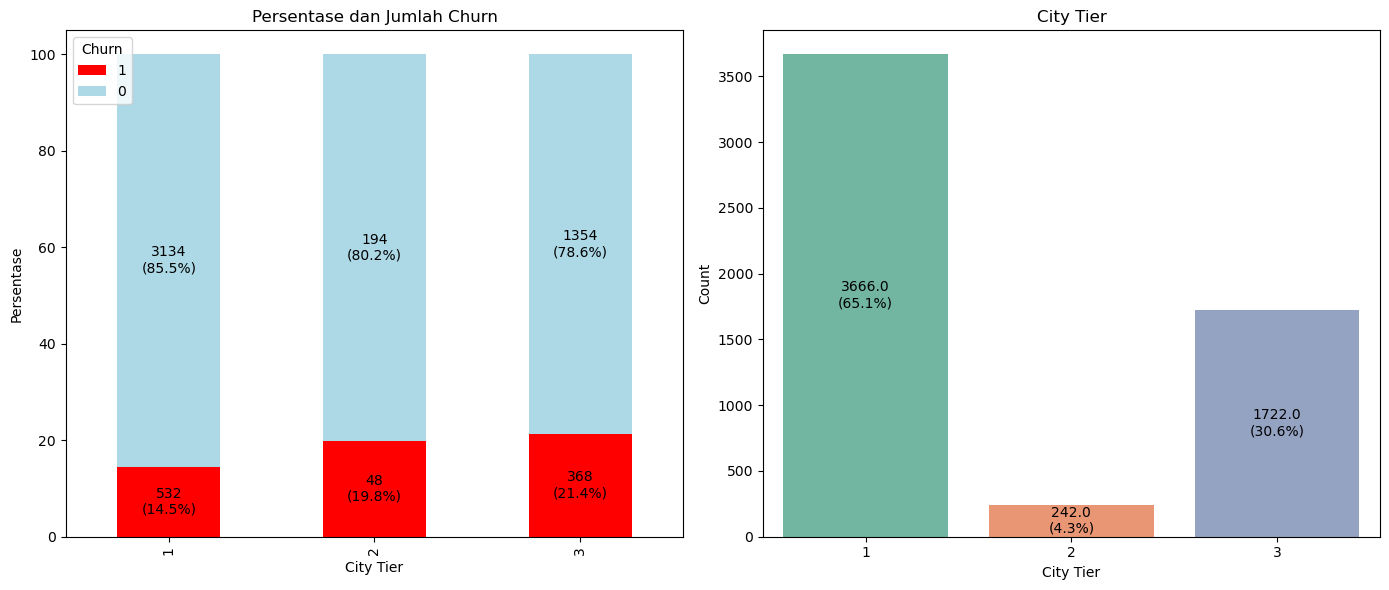

In [36]:
churn_counts = df.groupby(['CityTier', 'Churn']).size().unstack(fill_value=0)
churn_percent = churn_counts.div(churn_counts.sum(axis=1), axis=0) * 100

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

churn_percent[[1, 0]].plot(kind='bar', stacked=True, ax=axes[0], color=['red', 'lightblue'])
for i, (row, tier) in enumerate(churn_percent.iterrows()):
    axes[0].text(i, tier[1] / 2, f'{churn_counts.loc[tier.name, 1]}\n({tier[1]:.1f}%)',
                 ha='center', va='center', color='black')
    axes[0].text(i, tier[1] + tier[0] / 2, f'{churn_counts.loc[tier.name, 0]}\n({tier[0]:.1f}%)',
                 ha='center', va='center', color='black')

axes[0].set_title('Persentase dan Jumlah Churn')
axes[0].set_xlabel('City Tier')
axes[0].set_ylabel('Persentase')
axes[0].legend(title='Churn', loc='upper left')

sns.countplot(x='CityTier', data=df, ax=axes[1], palette='Set2')

for p in axes[1].patches:
    height = p.get_height()
    width = p.get_width()
    x = p.get_x() + width / 2
    axes[1].text(x, height / 2, f'{height}\n({(height/df.shape[0])*100:.1f}%)',
                 ha='center', va='center', color='black')

axes[1].set_title('City Tier')
axes[1].set_xlabel('City Tier')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()


Analisis churn berdasarkan **CityTier** menunjukkan bahwa pelanggan dari tier 3 memiliki tingkat churn tertinggi sebesar 21.4% (368 dari 1722 pelanggan), diikuti oleh tier 2 dengan tingkat churn 19.8% (48 dari 242 pelanggan), dan tier 1 dengan tingkat churn terendah sebesar 14.5% (532 dari 3666 pelanggan). Tier 1 juga memiliki tingkat retensi pelanggan yang paling tinggi, yaitu 85.5%, dibandingkan dengan tier 3 yang hanya sebesar 78.6%. Fakta ini mengindikasikan bahwa pelanggan dari kota-kota di tier 3 cenderung lebih rentan untuk churn, kemungkinan karena faktor aksesibilitas layanan, tingkat kepuasan, atau kebutuhan spesifik yang kurang terpenuhi. 

- **Insight:** Tingkat churn yang lebih tinggi di tier 3 menyoroti adanya kebutuhan untuk pendekatan yang lebih personal di wilayah tersebut, seperti meningkatkan layanan pelanggan atau menawarkan promosi yang relevan. 
- **Rekomendasi:** Lakukan penelitian untuk memahami tantangan spesifik di tier 3, seperti kualitas layanan, infrastruktur, atau kesesuaian produk. 
- **Aksi:** Tingkatkan pengalaman pelanggan di tier 3 melalui penguatan layanan logistik, diskon khusus, dan kampanye pemasaran yang sesuai dengan kebutuhan lokal untuk menurunkan tingkat churn.

**Churn dengan PreferredPaymentMode**

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16432\2427505530.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  axes[0].text(i, churn_percent[1][i] / 2, f'{churn_counts[1][i]}\n({churn_percent[1][i]:.1f}%)', ha='center', color='black')
C:\Users\ASUS\AppData\Local\Temp\ipykernel_16432\2427505530.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  axes[0].text(i, churn_percent[1][i] + churn_percent[0][i] / 2, f'{churn_counts[0][i]}\n({churn_percent[0][i]:.1f}%)', ha='center', color='black')


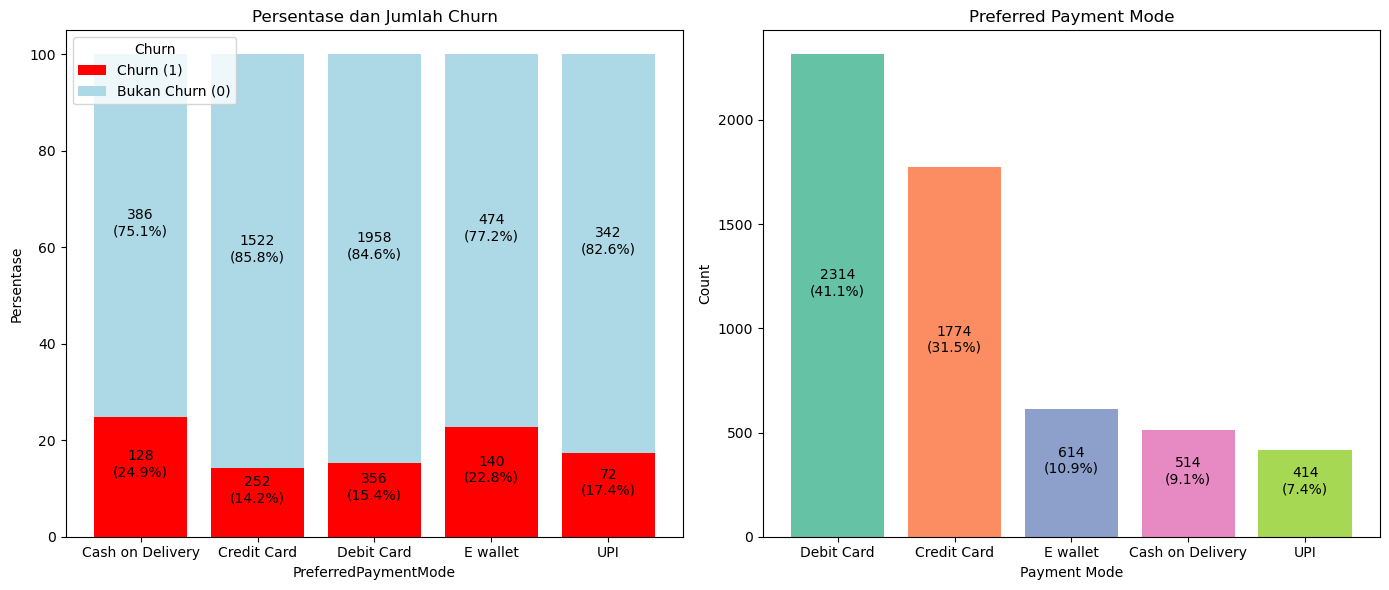

In [37]:
summary = df['PreferredPaymentMode'].value_counts()
percentages = (summary / summary.sum()) * 100

churn_counts = df.groupby(['PreferredPaymentMode', 'Churn']).size().unstack(fill_value=0)
churn_percent = churn_counts.div(churn_counts.sum(axis=1), axis=0) * 100

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].bar(churn_percent.index, churn_percent[1], label='Churn (1)', color='red')
axes[0].bar(churn_percent.index, churn_percent[0], bottom=churn_percent[1], label='Bukan Churn (0)', color='lightblue')

for i, device in enumerate(churn_percent.index):
    axes[0].text(i, churn_percent[1][i] / 2, f'{churn_counts[1][i]}\n({churn_percent[1][i]:.1f}%)', ha='center', color='black')
    axes[0].text(i, churn_percent[1][i] + churn_percent[0][i] / 2, f'{churn_counts[0][i]}\n({churn_percent[0][i]:.1f}%)', ha='center', color='black')

axes[0].set_title('Persentase dan Jumlah Churn')
axes[0].set_xlabel('PreferredPaymentMode')
axes[0].set_ylabel('Persentase')
axes[0].legend(title='Churn', loc='upper left')

axes[1].bar(summary.index, summary, color=sns.color_palette('Set2'))
for idx, (count, percentage) in enumerate(zip(summary, percentages)):
    axes[1].text(idx, count / 2, f'{count}\n({percentage:.1f}%)', ha='center', color='black')

axes[1].set_title('Preferred Payment Mode')
axes[1].set_ylabel('Count')
axes[1].set_xlabel('Payment Mode')

plt.tight_layout()
plt.show()

Dari analisis churn berdasarkan **PreferredPaymentMode**, terlihat bahwa metode pembayaran **Cash on Delivery (COD)** memiliki tingkat churn tertinggi, yaitu 24.9% (128 dari 514 pelanggan), diikuti oleh **E-Wallet** sebesar 22.8% (140 dari 614 pelanggan). Sebaliknya, metode **Credit Card** memiliki tingkat churn terendah sebesar 14.2% (252 dari 1774 pelanggan), diikuti oleh **UPI** sebesar 17.4% (72 dari 414 pelanggan). Pelanggan dengan metode COD tampaknya lebih rentan untuk churn, mungkin karena pengalaman pembayaran yang tidak nyaman atau preferensi mereka terhadap fleksibilitas pembayaran lainnya. 

- **Insight:** Tingginya churn pada COD dapat mengindikasikan perlunya edukasi atau promosi terhadap metode pembayaran digital yang lebih nyaman seperti UPI atau E-Wallet. 
- **Rekomendasi:** Fokuskan inisiatif pada promosi pembayaran digital melalui diskon khusus atau cashback untuk pelanggan yang beralih dari COD ke metode digital. 
- **Aksi:** Bangun program insentif untuk mempromosikan pembayaran digital dan sekaligus melakukan survei untuk memahami kendala pelanggan COD, sehingga strategi dapat lebih efektif dalam menurunkan tingkat churn.

**Churn dengan Gender**


C:\Users\ASUS\AppData\Local\Temp\ipykernel_16432\1205161823.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  axes[0].text(i, churn_percent[1][i] / 2, f'{churn_counts[1][i]}\n({churn_percent[1][i]:.1f}%)', ha='center', color='black')
C:\Users\ASUS\AppData\Local\Temp\ipykernel_16432\1205161823.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  axes[0].text(i, churn_percent[1][i] + churn_percent[0][i] / 2, f'{churn_counts[0][i]}\n({churn_percent[0][i]:.1f}%)', ha='center', color='black')


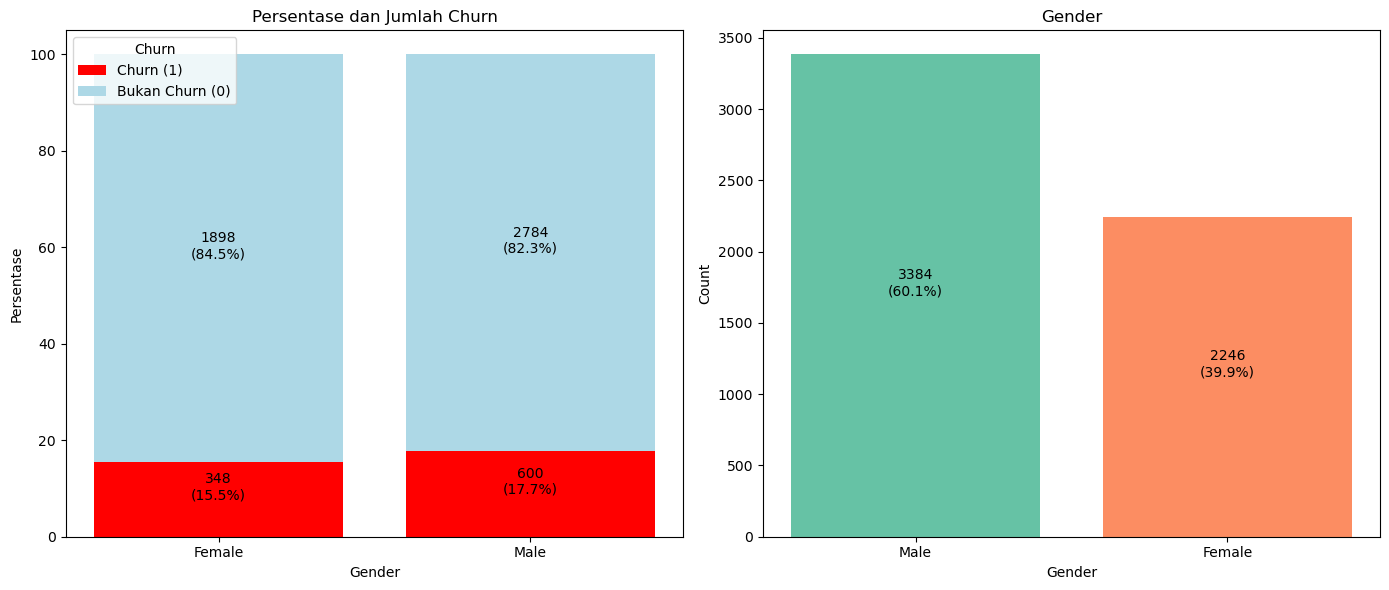

In [38]:
summary = df['Gender'].value_counts()
percentages = (summary / summary.sum()) * 100

churn_counts = df.groupby(['Gender', 'Churn']).size().unstack(fill_value=0)
churn_percent = churn_counts.div(churn_counts.sum(axis=1), axis=0) * 100

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].bar(churn_percent.index, churn_percent[1], label='Churn (1)', color='red')
axes[0].bar(churn_percent.index, churn_percent[0], bottom=churn_percent[1], label='Bukan Churn (0)', color='lightblue')

for i, device in enumerate(churn_percent.index):
    axes[0].text(i, churn_percent[1][i] / 2, f'{churn_counts[1][i]}\n({churn_percent[1][i]:.1f}%)', ha='center', color='black')
    axes[0].text(i, churn_percent[1][i] + churn_percent[0][i] / 2, f'{churn_counts[0][i]}\n({churn_percent[0][i]:.1f}%)', ha='center', color='black')

axes[0].set_title('Persentase dan Jumlah Churn')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Persentase')
axes[0].legend(title='Churn', loc='upper left')

axes[1].bar(summary.index, summary, color=sns.color_palette('Set2'))
for idx, (count, percentage) in enumerate(zip(summary, percentages)):
    axes[1].text(idx, count / 2, f'{count}\n({percentage:.1f}%)', ha='center', color='black')

axes[1].set_title('Gender')
axes[1].set_ylabel('Count')
axes[1].set_xlabel('Gender')

plt.tight_layout()
plt.show()


Berdasarkan analisis churn berdasarkan **Gender**, terlihat bahwa pelanggan pria memiliki tingkat churn yang lebih tinggi, yaitu 17.7% (600 dari 3384 pelanggan), dibandingkan dengan pelanggan wanita yang memiliki tingkat churn sebesar 15.5% (348 dari 2246 pelanggan). Sebaliknya, tingkat retensi pelanggan wanita (84.5%) lebih tinggi dibandingkan pria (82.3%). Perbedaan ini meskipun tidak terlalu besar, menunjukkan bahwa pelanggan pria lebih rentan churn, yang dapat disebabkan oleh perbedaan preferensi, kebutuhan, atau pengalaman layanan. 

- **Insight:** Pelanggan pria membutuhkan perhatian lebih dalam hal retensi, mungkin melalui program yang lebih relevan dengan kebutuhan mereka atau perbaikan layanan yang dirasakan kurang memadai. 
- **Rekomendasi:** Lakukan survei mendalam kepada pelanggan pria untuk memahami penyebab churn yang lebih tinggi dan fokuskan strategi personalisasi layanan atau promosi produk kepada kelompok ini. 
- **Aksi:** Kembangkan kampanye retensi yang menargetkan pelanggan pria, seperti insentif loyalitas, layanan khusus, atau penyampaian pesan pemasaran yang lebih relevan dengan minat mereka, untuk menurunkan tingkat churn.

**Churn dengan PreferedOrderCat**

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16432\799192989.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  axes[0].text(i, churn_percent[1][i] / 2, f'{churn_counts[1][i]}\n({churn_percent[1][i]:.1f}%)', ha='center', color='black')
C:\Users\ASUS\AppData\Local\Temp\ipykernel_16432\799192989.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  axes[0].text(i, churn_percent[1][i] + churn_percent[0][i] / 2, f'{churn_counts[0][i]}\n({churn_percent[0][i]:.1f}%)', ha='center', color='black')


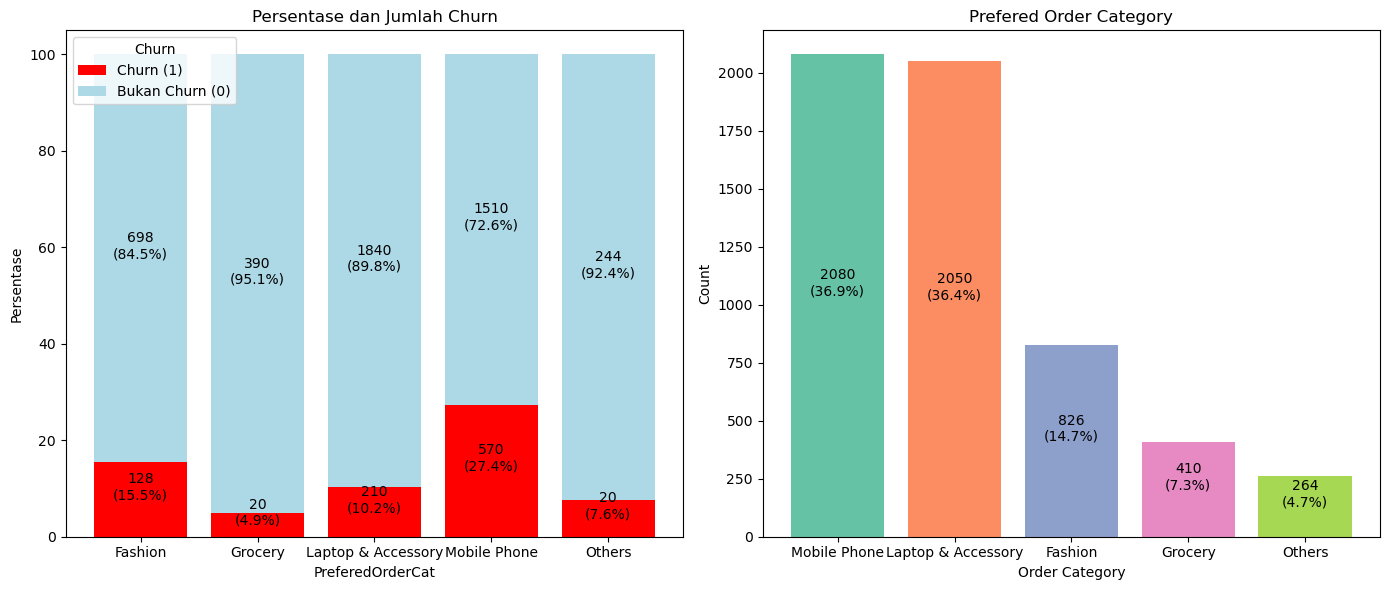

In [39]:
summary = df['PreferedOrderCat'].value_counts()
percentages = (summary / summary.sum()) * 100

churn_counts = df.groupby(['PreferedOrderCat', 'Churn']).size().unstack(fill_value=0)
churn_percent = churn_counts.div(churn_counts.sum(axis=1), axis=0) * 100

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].bar(churn_percent.index, churn_percent[1], label='Churn (1)', color='red')
axes[0].bar(churn_percent.index, churn_percent[0], bottom=churn_percent[1], label='Bukan Churn (0)', color='lightblue')

for i, device in enumerate(churn_percent.index):
    axes[0].text(i, churn_percent[1][i] / 2, f'{churn_counts[1][i]}\n({churn_percent[1][i]:.1f}%)', ha='center', color='black')
    axes[0].text(i, churn_percent[1][i] + churn_percent[0][i] / 2, f'{churn_counts[0][i]}\n({churn_percent[0][i]:.1f}%)', ha='center', color='black')

axes[0].set_title('Persentase dan Jumlah Churn')
axes[0].set_xlabel('PreferedOrderCat')
axes[0].set_ylabel('Persentase')
axes[0].legend(title='Churn', loc='upper left')

axes[1].bar(summary.index, summary, color=sns.color_palette('Set2'))
for idx, (count, percentage) in enumerate(zip(summary, percentages)):
    axes[1].text(idx, count / 2, f'{count}\n({percentage:.1f}%)', ha='center', color='black')

axes[1].set_title('Prefered Order Category')
axes[1].set_ylabel('Count')
axes[1].set_xlabel('Order Category')

plt.tight_layout()
plt.show()

Berdasarkan analisis churn terhadap **PreferedOrderCat**, pelanggan dengan kategori **Mobile Phone** memiliki tingkat churn tertinggi sebesar 27.4% (570 dari 2080 pelanggan), diikuti oleh **Fashion** sebesar 15.5% (128 dari 826 pelanggan). Sebaliknya, kategori **Grocery** memiliki tingkat churn terendah sebesar 4.9% (20 dari 410 pelanggan), diikuti oleh kategori **Others** sebesar 7.6% (20 dari 264 pelanggan). Ini menunjukkan bahwa pelanggan kategori **Mobile Phone** lebih rentan untuk churn, yang mungkin disebabkan oleh tingkat kompetisi tinggi dalam produk ini atau ekspektasi pelanggan yang tidak terpenuhi. 

- **Insight:** Tingginya churn pada kategori **Mobile Phone** menyoroti perlunya fokus pada layanan atau penawaran yang lebih menarik di kategori ini, sementara kategori seperti **Grocery** menunjukkan tingkat retensi yang sangat baik. 
- **Rekomendasi:** Tingkatkan kepuasan pelanggan pada kategori **Mobile Phone** melalui peningkatan kualitas layanan, promosi eksklusif, atau program loyalitas. 
- **Aksi:** Bangun strategi seperti diskon tambahan untuk pembelian berulang atau perpanjangan garansi untuk pelanggan **Mobile Phone** serta gunakan kategori seperti **Grocery** sebagai acuan untuk memperkuat strategi retensi secara keseluruhan.

**Churn dengan MaritalStatus**

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16432\750606729.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  axes[0].text(i, churn_percent[1][i] / 2, f'{churn_counts[1][i]}\n({churn_percent[1][i]:.1f}%)', ha='center', color='black')
C:\Users\ASUS\AppData\Local\Temp\ipykernel_16432\750606729.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  axes[0].text(i, churn_percent[1][i] + churn_percent[0][i] / 2, f'{churn_counts[0][i]}\n({churn_percent[0][i]:.1f}%)', ha='center', color='black')


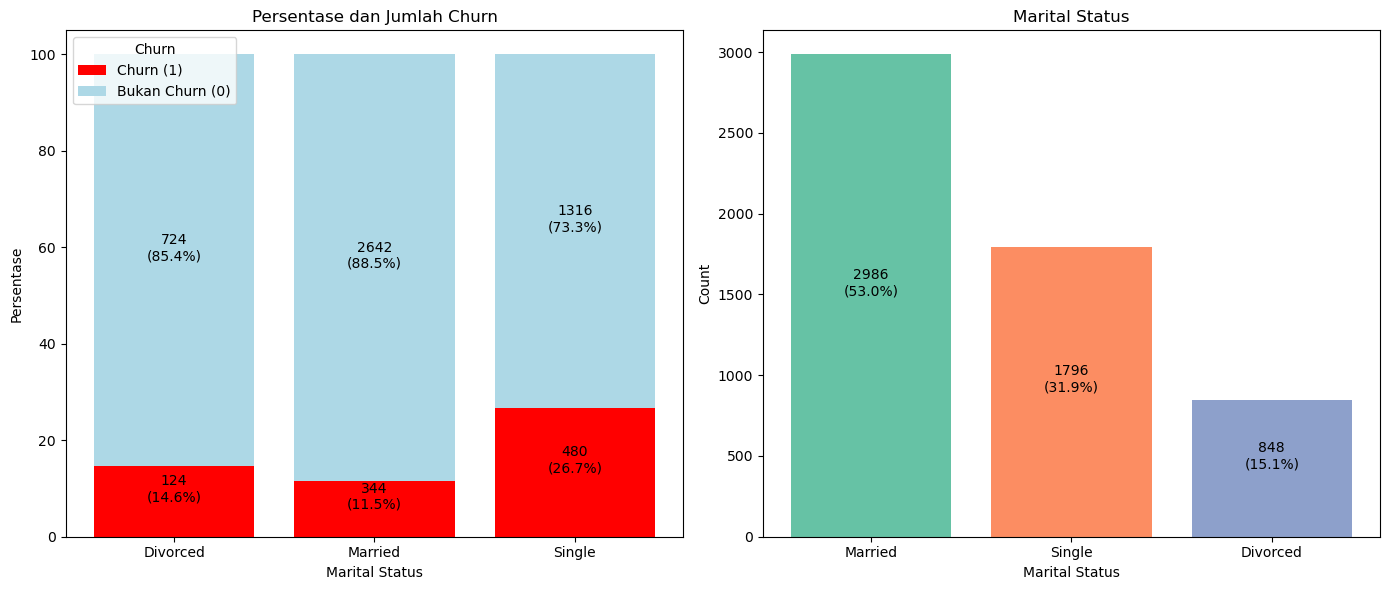

In [40]:
summary = df['MaritalStatus'].value_counts()
percentages = (summary / summary.sum()) * 100

churn_counts = df.groupby(['MaritalStatus', 'Churn']).size().unstack(fill_value=0)
churn_percent = churn_counts.div(churn_counts.sum(axis=1), axis=0) * 100

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].bar(churn_percent.index, churn_percent[1], label='Churn (1)', color='red')
axes[0].bar(churn_percent.index, churn_percent[0], bottom=churn_percent[1], label='Bukan Churn (0)', color='lightblue')

for i, device in enumerate(churn_percent.index):
    axes[0].text(i, churn_percent[1][i] / 2, f'{churn_counts[1][i]}\n({churn_percent[1][i]:.1f}%)', ha='center', color='black')
    axes[0].text(i, churn_percent[1][i] + churn_percent[0][i] / 2, f'{churn_counts[0][i]}\n({churn_percent[0][i]:.1f}%)', ha='center', color='black')

axes[0].set_title('Persentase dan Jumlah Churn')
axes[0].set_xlabel('Marital Status')
axes[0].set_ylabel('Persentase')
axes[0].legend(title='Churn', loc='upper left')

axes[1].bar(summary.index, summary, color=sns.color_palette('Set2'))
for idx, (count, percentage) in enumerate(zip(summary, percentages)):
    axes[1].text(idx, count / 2, f'{count}\n({percentage:.1f}%)', ha='center', color='black')

axes[1].set_title('Marital Status')
axes[1].set_ylabel('Count')
axes[1].set_xlabel('Marital Status')

plt.tight_layout()
plt.show()

Dari analisis churn berdasarkan **MaritalStatus**, terlihat bahwa pelanggan dengan status **Single** memiliki tingkat churn tertinggi sebesar 26.7% (480 dari 1796 pelanggan), diikuti oleh pelanggan **Divorced** dengan tingkat churn 14.6% (124 dari 848 pelanggan), sedangkan pelanggan **Married** memiliki tingkat churn terendah sebesar 11.5% (344 dari 2986 pelanggan). Tingkat retensi tertinggi juga terlihat pada pelanggan **Married** dengan 88.5% (2642 pelanggan). Fakta ini menunjukkan bahwa pelanggan yang masih **Single** lebih rentan churn, mungkin karena faktor ekonomi, komitmen terhadap layanan, atau kebutuhan yang berbeda dibandingkan segmen lain. 

- **Insight:** Pelanggan **Single** membutuhkan pendekatan khusus untuk meningkatkan retensi mereka, sementara pelanggan **Married** menunjukkan tingkat loyalitas yang tinggi dan dapat menjadi prioritas untuk dipertahankan. 
- **Rekomendasi:** Kembangkan strategi retensi khusus untuk pelanggan **Single**, seperti program diskon berbasis anggaran, penawaran fleksibel, atau layanan personalisasi yang sesuai dengan kebutuhan mereka. 
- **Aksi:** Lakukan survei terhadap pelanggan **Single** untuk memahami kebutuhan mereka secara lebih mendalam, dan gunakan hasilnya untuk menciptakan program retensi berbasis insentif atau fleksibilitas layanan, guna mengurangi tingkat churn di segmen ini.

**Churn dengan Complain**

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16432\1567262076.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Complain', data=df, ax=axes[1], palette='Set2')


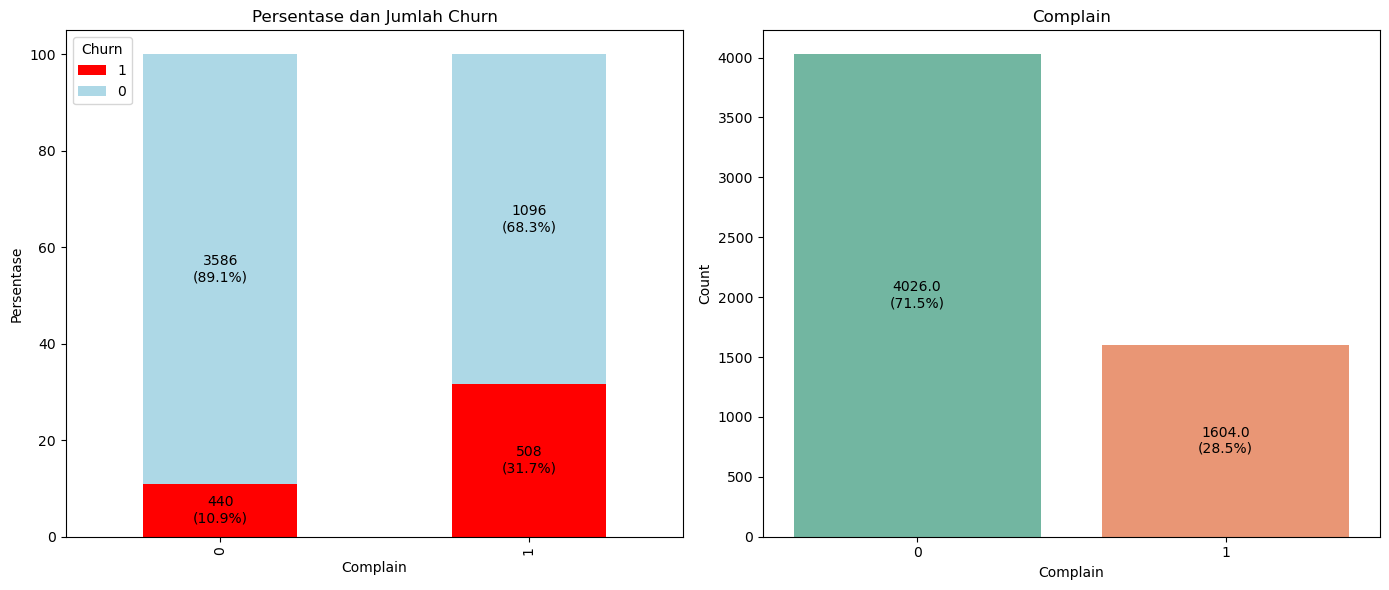

In [41]:
churn_counts = df.groupby(['Complain', 'Churn']).size().unstack(fill_value=0)
churn_percent = churn_counts.div(churn_counts.sum(axis=1), axis=0) * 100

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

churn_percent[[1, 0]].plot(kind='bar', stacked=True, ax=axes[0], color=['red', 'lightblue'])
for i, (row, tier) in enumerate(churn_percent.iterrows()):
    axes[0].text(i, tier[1] / 2, f'{churn_counts.loc[tier.name, 1]}\n({tier[1]:.1f}%)',
                 ha='center', va='center', color='black')
    axes[0].text(i, tier[1] + tier[0] / 2, f'{churn_counts.loc[tier.name, 0]}\n({tier[0]:.1f}%)',
                 ha='center', va='center', color='black')

axes[0].set_title('Persentase dan Jumlah Churn')
axes[0].set_xlabel('Complain')
axes[0].set_ylabel('Persentase')
axes[0].legend(title='Churn', loc='upper left')

sns.countplot(x='Complain', data=df, ax=axes[1], palette='Set2')

for p in axes[1].patches:
    height = p.get_height()
    width = p.get_width()
    x = p.get_x() + width / 2
    axes[1].text(x, height / 2, f'{height}\n({(height/df.shape[0])*100:.1f}%)',
                 ha='center', va='center', color='black')

axes[1].set_title('Complain')
axes[1].set_xlabel('Complain')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()


Dari analisis churn berdasarkan variabel **Complain**, terlihat bahwa pelanggan yang pernah mengajukan keluhan memiliki tingkat churn yang jauh lebih tinggi sebesar 31.7% (508 dari 1604 pelanggan) dibandingkan dengan pelanggan yang tidak pernah mengajukan keluhan, yang memiliki tingkat churn sebesar 10.9% (440 dari 4026 pelanggan). Tingkat retensi pelanggan yang tidak mengajukan keluhan juga jauh lebih tinggi (89.1%) dibandingkan dengan mereka yang mengajukan keluhan (68.3%). Fakta ini mengindikasikan bahwa pengelolaan keluhan memainkan peran krusial dalam retensi pelanggan, dan ketidakpuasan yang tidak terselesaikan kemungkinan besar memicu churn. 

- **Insight:** Pelanggan yang mengeluh menunjukkan risiko churn yang tinggi, yang menyoroti pentingnya sistem penyelesaian keluhan yang cepat dan efektif. 
- **Rekomendasi:** Tingkatkan respons dan penyelesaian keluhan dengan mendirikan sistem layanan pelanggan yang lebih baik, seperti saluran komunikasi 24/7, pelatihan staf, dan mekanisme tindak lanjut keluhan yang proaktif. 
- **Aksi:** Jalankan survei kepuasan pelanggan secara berkala untuk mengidentifikasi potensi keluhan sebelum terjadi, dan luncurkan program kompensasi atau insentif untuk pelanggan yang keluhannya sudah terselesaikan, guna memperbaiki pengalaman mereka dan mengurangi churn.

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16432\1546966265.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, y='Tenure', x='Churn', palette=["skyblue", "salmon"])


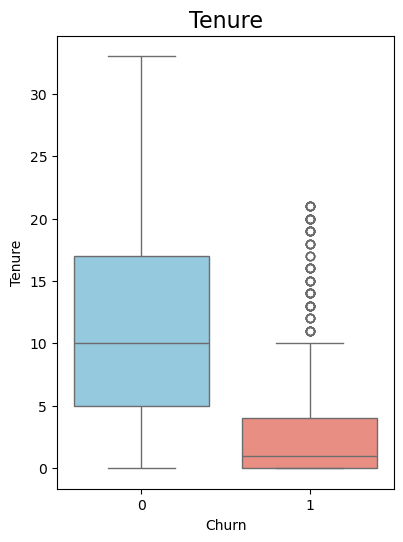

In [42]:
plt.figure(figsize=(20,20))

plt.subplot(341)
sns.boxplot(data=df, y='Tenure', x='Churn', palette=["skyblue", "salmon"])
plt.title('Tenure', fontsize=16)

plt.show()

Dari boxplot di atas, terlihat bahwa pelanggan yang **tidak churn** (Churn = 0) memiliki rentang **Tenure** yang jauh lebih panjang dibandingkan dengan pelanggan yang churn (Churn = 1). Median tenure pelanggan yang tidak churn berada di sekitar 10 bulan, sementara pelanggan yang churn memiliki median tenure yang jauh lebih rendah, di bawah 5 bulan. Selain itu, ada outlier pada pelanggan churn, yang menunjukkan bahwa beberapa pelanggan churn tetap bertahan hingga waktu yang lebih lama. 

- **Insight:** Pelanggan dengan tenure lebih pendek lebih cenderung churn, yang mungkin disebabkan oleh kurangnya keterikatan atau pengalaman awal yang kurang memuaskan. 
- **Rekomendasi:** Fokus pada retensi pelanggan baru selama bulan-bulan awal layanan mereka dengan strategi onboarding yang lebih efektif, seperti diskon untuk pembelian berikutnya, komunikasi proaktif, dan layanan pelanggan yang responsif. 
- **Aksi:** Implementasikan program loyalitas khusus untuk pelanggan dengan tenure rendah, berikan insentif untuk mendorong keterlibatan lebih lanjut, dan monitor secara aktif kepuasan mereka untuk mencegah churn di awal perjalanan pelanggan.

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16432\2591002312.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,y='DaySinceLastOrder', x='Churn', palette=["skyblue", "salmon"])


Text(0.5, 1.0, 'DaySinceLastOrder')

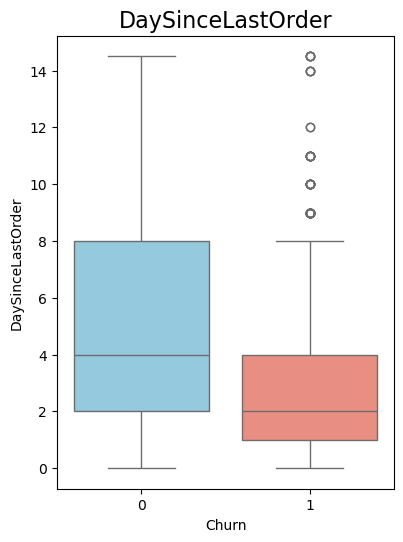

In [43]:
plt.figure(figsize=(20,20))
plt.subplot(342)
sns.boxplot(data=df,y='DaySinceLastOrder', x='Churn', palette=["skyblue", "salmon"])
plt.title('DaySinceLastOrder',fontsize=16)

Dari visualisasi boxplot di atas, terlihat bahwa pelanggan yang **tidak churn** (Churn = 0) memiliki rentang **DaySinceLastOrder** yang lebih luas, dengan median di sekitar 4 hari sejak pesanan terakhir. Sebaliknya, pelanggan yang churn (Churn = 1) memiliki median yang lebih rendah, yaitu sekitar 2 hari sejak pesanan terakhir, dengan rentang yang lebih kecil. Hal ini menunjukkan bahwa pelanggan yang churn cenderung berhenti menggunakan layanan dalam waktu relatif singkat setelah pesanan terakhir mereka, tanpa menunjukkan aktivitas lebih lanjut. 

- **Insight:** Pelanggan yang churn biasanya menunjukkan pola inaktivitas yang singkat setelah melakukan pesanan terakhir, sehingga mendeteksi pola ini lebih awal dapat menjadi indikator churn potensial. 
- **Rekomendasi:** Lakukan pemantauan intensif terhadap pelanggan yang menunjukkan penurunan aktivitas setelah pesanan terakhir mereka, terutama dalam 1-3 hari. 
- **Aksi:** Kirimkan kampanye pengingat, diskon eksklusif, atau rekomendasi produk yang relevan dalam periode kritis setelah pesanan terakhir untuk mendorong pelanggan melakukan pesanan berikutnya dan mengurangi kemungkinan churn.

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16432\1784885304.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,y='OrderCount', x='Churn', palette=["skyblue", "salmon"])


Text(0.5, 1.0, 'OrderCount')

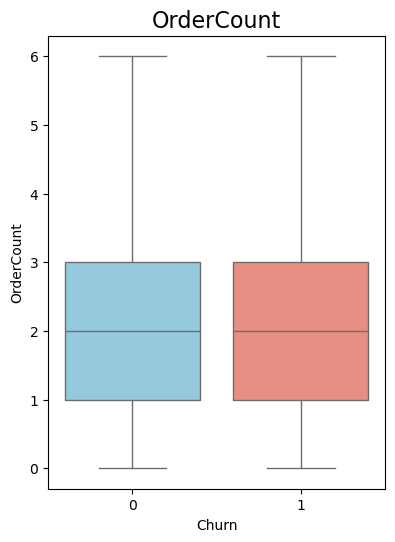

In [44]:
plt.figure(figsize=(20,20))
plt.subplot(343)
sns.boxplot(data=df,y='OrderCount', x='Churn', palette=["skyblue", "salmon"])
plt.title('OrderCount',fontsize=16)

Dari boxplot **OrderCount** di atas, terlihat bahwa distribusi jumlah pesanan (OrderCount) antara pelanggan yang **churn** (Churn = 1) dan yang **tidak churn** (Churn = 0) sangat mirip, dengan median di sekitar 2 pesanan untuk kedua kategori. Rentang jumlah pesanan juga tidak menunjukkan perbedaan signifikan, dengan maksimum di sekitar 6 pesanan. Hal ini mengindikasikan bahwa jumlah pesanan bukanlah faktor utama yang membedakan pelanggan churn dan non-churn. 

- **Insight:** Karena tidak ada perbedaan signifikan dalam OrderCount, variabel ini mungkin memiliki pengaruh yang kecil terhadap churn dibandingkan variabel lain seperti waktu sejak pesanan terakhir atau tingkat interaksi. 
- **Rekomendasi:** Fokus pada variabel yang lebih menentukan seperti frekuensi interaksi pelanggan atau periode inaktivitas setelah pesanan terakhir untuk mengidentifikasi risiko churn. 
- **Aksi:** Lakukan analisis lebih lanjut untuk mengeksplorasi pola pelanggan yang sering bertransaksi tetapi tetap churn, dan tawarkan program loyalitas untuk mempertahankan pelanggan yang sering melakukan pesanan guna memastikan keterlibatan jangka panjang.

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16432\3748589492.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,y='CashbackAmount', x='Churn', palette=["skyblue", "salmon"])


Text(0.5, 1.0, 'CashbackAmount')

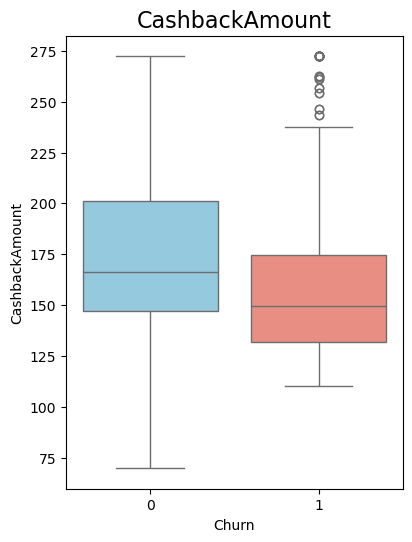

In [45]:
plt.figure(figsize=(20,20))
plt.subplot(344)
sns.boxplot(data=df,y='CashbackAmount', x='Churn', palette=["skyblue", "salmon"])
plt.title('CashbackAmount',fontsize=16)

Dari visualisasi boxplot **CashbackAmount**, terlihat bahwa pelanggan yang **tidak churn** (Churn = 0) cenderung menerima cashback yang lebih tinggi dengan median sekitar 175, dibandingkan pelanggan yang **churn** (Churn = 1) yang memiliki median cashback sekitar 150. Distribusi cashback untuk pelanggan non-churn lebih lebar, dengan nilai maksimum yang lebih tinggi dibandingkan pelanggan churn. Selain itu, terdapat outlier pada pelanggan churn yang menunjukkan bahwa meskipun sebagian kecil pelanggan menerima cashback besar, hal ini tidak cukup untuk mencegah churn. 
- **Insight:** Jumlah cashback yang lebih rendah dapat berkontribusi pada churn, yang mengindikasikan pentingnya insentif finansial untuk mempertahankan pelanggan. 
- **Rekomendasi:** Tingkatkan jumlah cashback atau kembangkan program cashback berbasis loyalitas untuk pelanggan yang menunjukkan risiko churn.  
- **Aksi:** Identifikasi pelanggan dengan cashback rendah yang berisiko churn dan tawarkan cashback tambahan atau insentif eksklusif untuk meningkatkan retensi dan loyalitas mereka terhadap layanan.

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16432\3231166316.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,y='HourSpendOnApp', x='Churn', palette=["skyblue", "salmon"])


Text(0.5, 1.0, 'HourSpendOnApp')

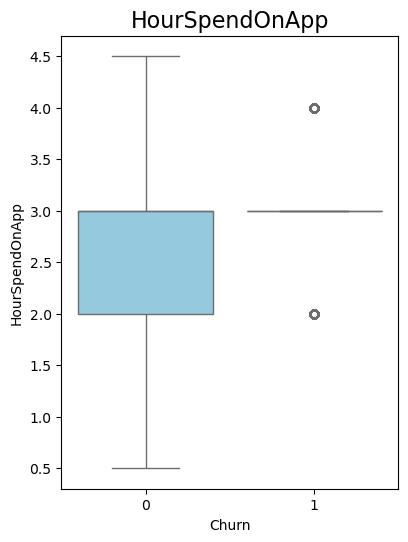

In [46]:
plt.figure(figsize=(20,20))
plt.subplot(345)
sns.boxplot(data=df,y='HourSpendOnApp', x='Churn', palette=["skyblue", "salmon"])
plt.title('HourSpendOnApp' ,fontsize=16)

Dari boxplot **HourSpendOnApp**, terlihat bahwa pelanggan yang **tidak churn** (Churn = 0) memiliki distribusi waktu yang dihabiskan di aplikasi yang lebih bervariasi, dengan median sekitar 2.5 jam. Sebaliknya, pelanggan yang **churn** (Churn = 1) memiliki waktu yang lebih konsisten di sekitar 3 jam tanpa banyak variasi, dengan beberapa outlier yang menghabiskan lebih dari 4 jam dan 2 jam. Hal ini menunjukkan bahwa pelanggan yang churn cenderung menghabiskan lebih sedikit waktu di aplikasi, yang mungkin mencerminkan kurangnya keterlibatan atau minat terhadap layanan.

- **Insight:** Keterlibatan yang rendah dalam aplikasi tampaknya menjadi salah satu indikator churn. Pelanggan yang lebih terlibat, menghabiskan lebih banyak waktu di aplikasi, lebih cenderung untuk tetap bertahan. 
- **Rekomendasi:** Fokus pada meningkatkan keterlibatan pelanggan melalui fitur interaktif, notifikasi yang relevan, atau konten yang dipersonalisasi untuk mendorong penggunaan aplikasi. 
- **Aksi:** Identifikasi pelanggan yang memiliki waktu penggunaan aplikasi rendah dan tawarkan insentif seperti diskon atau rekomendasi produk yang relevan untuk meningkatkan keterlibatan mereka di aplikasi. Hal ini dapat membantu mencegah churn di segmen pelanggan dengan risiko tinggi.

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16432\2358321543.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,y='SatisfactionScore', x='Churn', palette=["skyblue", "salmon"])


Text(0.5, 1.0, 'SatisfactionScore')

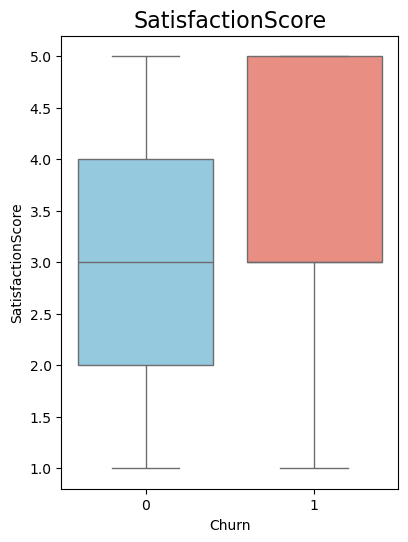

In [47]:
plt.figure(figsize=(20,20))
plt.subplot(346)
sns.boxplot(data=df,y='SatisfactionScore', x='Churn', palette=["skyblue", "salmon"])
plt.title('SatisfactionScore',fontsize=16)

Dari visualisasi boxplot **SatisfactionScore**, terlihat bahwa pelanggan yang **tidak churn** (Churn = 0) memiliki skor kepuasan yang lebih rendah secara umum, dengan median di sekitar 3 dan distribusi yang lebih luas, mencakup nilai-nilai rendah hingga tinggi. Sebaliknya, pelanggan yang **churn** (Churn = 1) cenderung memiliki skor kepuasan yang lebih tinggi, dengan median mendekati 4.5, dan sebagian besar pelanggan churn berada di rentang skor tinggi. Temuan ini agak kontraintuitif karena pelanggan dengan kepuasan lebih tinggi justru lebih cenderung churn. 

- **Insight:** Kepuasan yang tinggi mungkin tidak selalu mengindikasikan loyalitas. Faktor eksternal seperti harga, kompetisi, atau perubahan kebutuhan pelanggan dapat menyebabkan churn meskipun kepuasan tinggi. 
- **Rekomendasi:** Analisis lebih lanjut diperlukan untuk memahami penyebab churn pada pelanggan dengan skor kepuasan tinggi, seperti preferensi fitur atau penawaran yang mungkin tidak sesuai dengan ekspektasi. 
- **Aksi:** Fokus pada penyesuaian produk atau layanan untuk mempertahankan pelanggan yang memiliki skor kepuasan tinggi tetapi berisiko churn, misalnya melalui penawaran eksklusif, program loyalitas, atau survei untuk menangkap kebutuhan mereka lebih mendalam.

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16432\848641830.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,y='WarehouseToHome', x='Churn', palette=["skyblue", "salmon"])


Text(0.5, 1.0, 'WarehouseToHome')

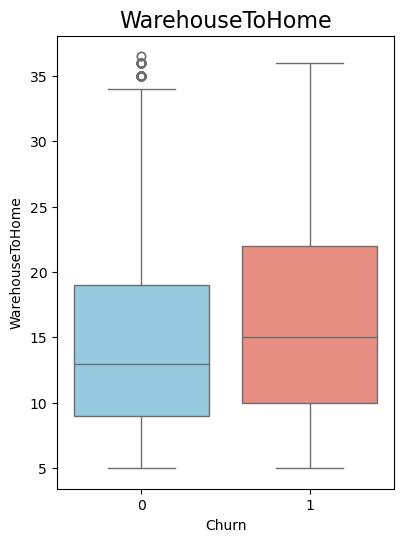

In [48]:
plt.figure(figsize=(20,20))
plt.subplot(347)
sns.boxplot(data=df,y='WarehouseToHome', x='Churn', palette=["skyblue", "salmon"])
plt.title('WarehouseToHome',fontsize=16)

Dari boxplot **WarehouseToHome**, terlihat bahwa pelanggan yang churn (Churn = 1) memiliki distribusi jarak antara gudang dan rumah yang lebih tinggi dibandingkan dengan pelanggan yang tidak churn (Churn = 0). Median jarak untuk pelanggan churn mendekati 15-20 satuan, sementara pelanggan non-churn memiliki median yang lebih rendah, sekitar 10-15 satuan. Selain itu, terdapat beberapa outlier pada pelanggan yang tidak churn, yang menunjukkan jarak yang jauh lebih besar tetapi tidak memengaruhi keputusan mereka untuk tetap bertahan. 

- **Insight:** Jarak antara gudang dan rumah pelanggan tampaknya berpengaruh pada churn, di mana pelanggan dengan jarak lebih jauh memiliki kecenderungan lebih tinggi untuk churn, kemungkinan disebabkan oleh waktu pengiriman yang lebih lama atau pengalaman layanan yang kurang optimal. 
- **Rekomendasi:** Tingkatkan efisiensi pengiriman untuk pelanggan dengan jarak lebih jauh melalui optimalisasi logistik, seperti pemilihan rute yang lebih cepat atau menawarkan pengiriman prioritas. 
- **Aksi:** Identifikasi pelanggan di wilayah dengan jarak lebih jauh dari gudang dan tawarkan insentif seperti pengiriman gratis atau diskon untuk meningkatkan kepuasan mereka, sehingga risiko churn dapat diminimalkan.

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16432\3037400183.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,y='NumberOfDeviceRegistered', x='Churn', palette=["skyblue", "salmon"])


Text(0.5, 1.0, 'NumberOfDeviceRegistered')

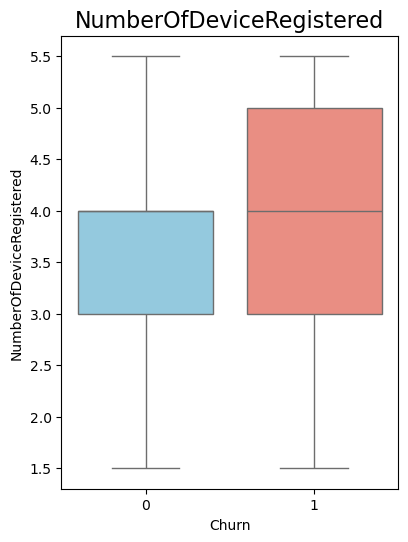

In [49]:
plt.figure(figsize=(20,20))
plt.subplot(348)
sns.boxplot(data=df,y='NumberOfDeviceRegistered', x='Churn', palette=["skyblue", "salmon"])
plt.title('NumberOfDeviceRegistered',fontsize=16)

Dari boxplot **NumberOfDeviceRegistered**, terlihat bahwa pelanggan yang churn (Churn = 1) cenderung memiliki jumlah perangkat terdaftar yang lebih tinggi, dengan median di sekitar 4.5 perangkat, dibandingkan pelanggan yang tidak churn (Churn = 0) yang memiliki median sekitar 3.5 perangkat. Distribusi pelanggan churn juga menunjukkan variasi yang lebih luas hingga 5.5 perangkat, sedangkan pelanggan non-churn memiliki distribusi yang lebih sempit. Hal ini mengindikasikan bahwa semakin banyak perangkat yang terdaftar, semakin tinggi risiko pelanggan untuk churn, mungkin disebabkan oleh tantangan teknis atau kompleksitas dalam mengelola banyak perangkat. 

- **Insight:** Pelanggan dengan banyak perangkat terdaftar lebih rentan churn, mungkin karena mereka memerlukan dukungan lebih dalam sinkronisasi atau penggunaan layanan secara efisien. 
- **Rekomendasi:** Fokuskan upaya untuk meningkatkan pengalaman pengguna lintas perangkat, termasuk layanan dukungan teknis yang responsif, panduan penggunaan yang jelas, dan fitur manajemen perangkat yang efisien. 
- **Aksi:** Luncurkan program komunikasi proaktif untuk pelanggan dengan jumlah perangkat tinggi, tawarkan bantuan teknis personal, atau fitur eksklusif untuk memperkuat loyalitas mereka dan mengurangi risiko churn.

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16432\995130519.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,y='NumberOfAddress', x='Churn', palette=["skyblue", "salmon"])


Text(0.5, 1.0, 'NumberOfAddress')

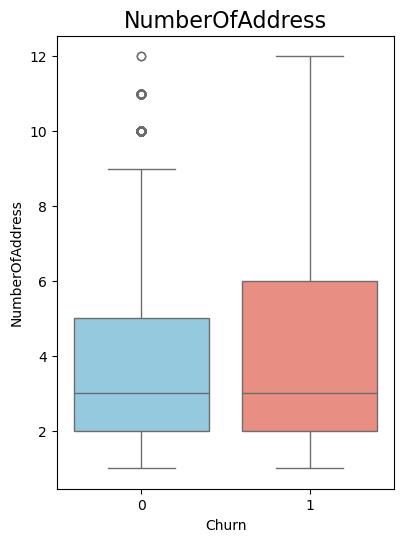

In [50]:
plt.figure(figsize=(20,20))
plt.subplot(349)
sns.boxplot(data=df,y='NumberOfAddress', x='Churn', palette=["skyblue", "salmon"])
plt.title('NumberOfAddress',fontsize=16)

Dari boxplot **NumberOfAddress**, terlihat bahwa pelanggan yang churn (Churn = 1) memiliki distribusi jumlah alamat yang lebih tinggi dibandingkan dengan pelanggan yang tidak churn (Churn = 0). Median jumlah alamat untuk pelanggan dan non-churn hanya sekitar 3. Selain itu, distribusi jumlah alamat pelanggan churn mencakup nilai yang lebih tinggi, hingga 12, dengan sedikit outlier. Hal ini menunjukkan bahwa pelanggan dengan lebih banyak alamat terdaftar cenderung lebih berisiko untuk churn. 

- **Insight:** Pelanggan dengan banyak alamat mungkin mencerminkan perilaku yang lebih kompleks atau kebutuhan logistik yang lebih tinggi, yang jika tidak terpenuhi dengan baik dapat meningkatkan risiko churn. 
- **Rekomendasi:** Tingkatkan pengalaman pelanggan dengan layanan manajemen alamat yang lebih mudah, seperti opsi untuk menyimpan, mengedit, dan memprioritaskan alamat. 
- **Aksi:** Identifikasi pelanggan dengan jumlah alamat tinggi dan berikan layanan personal seperti asisten logistik atau fitur eksklusif untuk mempermudah pengalaman mereka. Langkah ini dapat membantu mengurangi churn di segmen pelanggan dengan kebutuhan logistik kompleks.

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16432\3251757747.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,y='OrderAmountHikeFromlastYear', x='Churn', palette=["skyblue", "salmon"])


Text(0.5, 1.0, 'OrderAmountHikeFromlastYear')

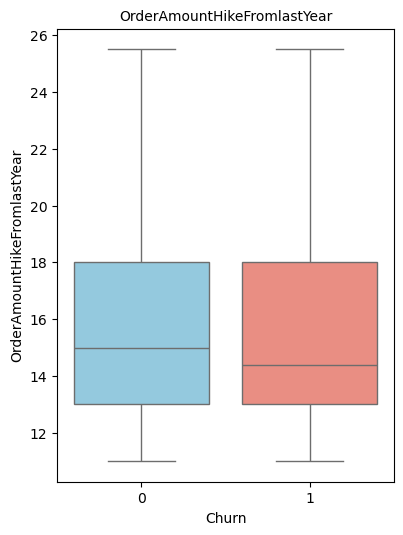

In [51]:
plt.figure(figsize=(20,20))
plt.subplot(3, 4, 10)
sns.boxplot(data=df,y='OrderAmountHikeFromlastYear', x='Churn', palette=["skyblue", "salmon"])
plt.title('OrderAmountHikeFromlastYear',fontsize=10)

Dari boxplot **OrderAmountHikeFromLastYear**, terlihat bahwa distribusi kenaikan jumlah pesanan dari tahun sebelumnya tidak menunjukkan perbedaan yang signifikan antara pelanggan yang churn (Churn = 1) dan yang tidak churn (Churn = 0). Median kenaikan pesanan berada di sekitar angka 14 untuk kedua kelompok, dengan distribusi yang serupa hingga kisaran maksimum 25. Hal ini menunjukkan bahwa variabel ini memiliki dampak yang minimal dalam memprediksi churn. 

- **Insight:** Kenaikan jumlah pesanan dari tahun sebelumnya tidak secara langsung berkorelasi dengan keputusan pelanggan untuk churn, yang mungkin berarti faktor lain seperti pengalaman pelanggan, layanan, atau insentif lebih berpengaruh. 
- **Rekomendasi:** Fokus pada variabel yang lebih kuat memengaruhi churn, seperti retensi melalui pengalaman layanan dan program loyalitas, daripada sekadar memantau perubahan jumlah pesanan tahunan. 
- **Aksi:** Perkuat interaksi dengan pelanggan melalui personalisasi layanan dan penawaran berulang, terlepas dari apakah mereka mengalami kenaikan pesanan atau tidak, untuk memastikan keterlibatan jangka panjang dan mengurangi churn.

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16432\1451886662.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,y='CouponUsed', x='Churn', palette=["skyblue", "salmon"])


Text(0.5, 1.0, 'CouponUsed')

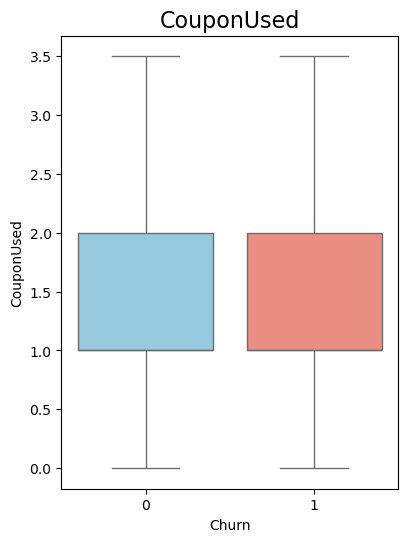

In [52]:
plt.figure(figsize=(20,20))
plt.subplot(3, 4, 11)
sns.boxplot(data=df,y='CouponUsed', x='Churn', palette=["skyblue", "salmon"])
plt.title('CouponUsed',fontsize=16)

Dari boxplot **CouponUsed**, terlihat bahwa distribusi penggunaan kupon antara pelanggan yang churn (Churn = 1) dan yang tidak churn (Churn = 0) hampir identik, dengan median berada di sekitar 2 kupon untuk kedua kelompok. Rentang distribusi juga serupa, mulai dari 0 hingga sekitar 3.5 kupon. Hal ini menunjukkan bahwa penggunaan kupon bukanlah faktor yang membedakan secara signifikan antara pelanggan yang churn dan yang tidak churn. 

- **Insight:** Jumlah kupon yang digunakan tampaknya memiliki dampak yang kecil terhadap keputusan pelanggan untuk churn. Ini mengindikasikan bahwa insentif berupa kupon saja mungkin tidak cukup efektif untuk mengurangi churn. 
- **Rekomendasi:** Kombinasikan program insentif kupon dengan elemen lain yang meningkatkan keterlibatan pelanggan, seperti pengalaman layanan yang lebih personal, dukungan pelanggan yang cepat, atau program loyalitas yang lebih menarik. 
- **Aksi:** Gunakan analitik untuk mengidentifikasi pelanggan yang menggunakan sedikit kupon namun menunjukkan tanda-tanda churn, lalu tawarkan insentif tambahan berupa diskon eksklusif atau penawaran personal untuk meningkatkan keterlibatan dan loyalitas mereka.

### **Feature Engineering**

In [53]:
df.head()

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,NoLastOrderInfo
0,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3.0,Laptop & Accessory,2,Single,9.0,1,11.0,1.0,1.0,5.0,159.93,0
1,1,5.2,Mobile Phone,1,8.0,UPI,Male,3.0,4.0,Mobile Phone,3,Single,7.0,1,15.0,0.0,1.0,0.0,120.90,0
2,1,4.8,Mobile Phone,1,30.0,Debit Card,Male,2.0,4.0,Mobile Phone,3,Single,6.0,1,14.0,0.0,1.0,3.0,120.28,0
3,1,0.0,Mobile Phone,3,15.0,Debit Card,Male,2.0,4.0,Laptop & Accessory,5,Single,8.0,0,23.0,0.0,1.0,3.0,134.07,0
4,1,0.0,Mobile Phone,1,12.0,Credit Card,Male,3.0,3.0,Mobile Phone,5,Single,3.0,0,11.0,1.0,1.0,3.0,129.60,0


In [54]:

transformer=ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first'), ['PreferredLoginDevice','Gender','MaritalStatus']),
    ('binary', ce.BinaryEncoder(), ['PreferredPaymentMode', 'PreferedOrderCat']),
    ('num', StandardScaler(), ['Tenure','WarehouseToHome','HourSpendOnApp','OrderAmountHikeFromlastYear','CouponUsed',
                               'OrderCount','DaySinceLastOrder','CashbackAmount'])
], remainder='passthrough')

In [55]:
x=df.drop(columns=['Churn'])
y=df['Churn']

In [56]:


x_train,x_test,y_train,y_test=train_test_split(x,y,stratify=y,test_size=0.2,random_state=2021)

In [57]:
testing=pd.DataFrame(transformer.fit_transform(x_train),columns=transformer.get_feature_names_out())
testing.head()

,onehot__PreferredLoginDevice_Mobile Phone,onehot__Gender_Male,onehot__MaritalStatus_Married,onehot__MaritalStatus_Single,binary__PreferredPaymentMode_0,binary__PreferredPaymentMode_1,binary__PreferredPaymentMode_2,binary__PreferedOrderCat_0,binary__PreferedOrderCat_1,binary__PreferedOrderCat_2,...,num__CouponUsed,num__OrderCount,num__DaySinceLastOrder,num__CashbackAmount,remainder__CityTier,remainder__NumberOfDeviceRegistered,remainder__SatisfactionScore,remainder__NumberOfAddress,remainder__Complain,remainder__NoLastOrderInfo
0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.553995,-0.240848,-1.003005,-0.125556,1.0,5.0,4.0,8.0,0.0,0.0
1,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,-1.256413,0.320342,1.323222,2.192336,1.0,3.0,3.0,1.0,0.0,0.0
2,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.553995,-0.240848,-0.421448,-1.018481,1.0,3.0,5.0,2.0,1.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,...,1.911802,2.003911,1.032444,-1.254857,1.0,3.0,4.0,2.0,1.0,0.0
4,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,-1.256413,-0.802038,-0.712226,-1.096668,1.0,4.0,1.0,1.0,0.0,0.0




### Penjelasan Kode:

1. **Eksplorasi Data (`df.head()`):**
   - Bagian pertama dari kode ini menampilkan penggunaan `df.head()` untuk melihat beberapa baris pertama dari DataFrame `df`. Hal ini memungkinkan kita untuk memeriksa kolom-kolom yang ada dan memahami jenis data yang digunakan. Dataset ini tampaknya memiliki berbagai fitur, seperti `Churn`, `Tenure`, `PreferredLoginDevice`, `CityTier`, dan lainnya.

2. **Column Transformer (`transformer=ColumnTransformer([...])`):**
   - `ColumnTransformer` adalah alat yang sangat berguna dari scikit-learn yang menerapkan transformasi yang berbeda pada subset kolom yang berbeda dalam data. Fungsi ini mengambil daftar operasi yang akan diterapkan pada kolom-kolom tertentu:
     - **`onehot`:** Menerapkan `OneHotEncoder` pada kolom `PreferredLoginDevice`, `Gender`, dan `MaritalStatus`, yang akan mengubah variabel kategorikal menjadi format yang cocok untuk algoritma machine learning (mengubah kategori menjadi format biner).
     - **`binary`:** Menerapkan `BinaryEncoder` pada kolom `PreferredPaymentMode` dan `PreferredOrderCat`. Binary encoding adalah alternatif dari one-hot encoding untuk menangani data kategorikal.
     - **`num`:** Menerapkan `StandardScaler` pada kolom numerik seperti `Tenure`, `WarehouseToHome`, `HourSpendOnApp`, dll. Scaler ini menstandarisasi fitur numerik (yaitu, mengubahnya agar rata-rata 0 dan variansinya menjadi 1).
     - **`remainder='passthrough'`:** Menjamin bahwa kolom-kolom yang tidak disebutkan dalam transformasi akan diteruskan tanpa perubahan. Ini memastikan bahwa kolom yang tidak diubah tetap ada dalam data akhir.

3. **Pemecahan Data (`x = df.drop(columns=['Churn'])` dan `y = df['Churn']`):**
   - `x` berisi semua kolom kecuali kolom target `Churn`, sementara `y` berisi variabel target `Churn`. Ini adalah cara yang umum dalam mempersiapkan data untuk melatih model machine learning (di mana `x` adalah fitur dan `y` adalah target).

4. **Pembagian Data untuk Latihan dan Pengujian (`train_test_split(x, y, ...)`):**
   - Fungsi `train_test_split` digunakan untuk membagi data menjadi set pelatihan dan pengujian. `x_train` dan `x_test` adalah fitur untuk pelatihan dan pengujian, sedangkan `y_train` dan `y_test` adalah target untuk pelatihan dan pengujian. Argumen `stratify=y` memastikan bahwa pembagian data mempertahankan distribusi variabel target (`Churn`) di kedua set pelatihan dan pengujian. `test_size=0.2` berarti 20% dari data digunakan untuk pengujian.

5. **Transformasi Data (`transformer.fit_transform(x_train, ...)`):**
   - Fungsi `transformer.fit_transform(x_train)` menerapkan semua transformasi yang telah didefinisikan sebelumnya (seperti one-hot encoding, binary encoding, dan standarisasi) pada data `x_train`. Ini mempersiapkan fitur agar siap digunakan dalam pelatihan model dengan mengubah data kategorikal menjadi format numerik dan menstandarisasi data numerik.

6. **Membuat DataFrame (`testing=pd.DataFrame(...)`):**
   - Setelah mentransformasi data pelatihan, sebuah DataFrame `testing` dibuat untuk menampilkan data yang sudah ditransformasi. `transformer.get_feature_names_out()` mengembalikan nama-nama fitur yang telah ditransformasi sehingga DataFrame baru dapat diberi label dengan benar.

### Hasil:
- **Fitur yang Telah Ditransformasi:** Hasil akhirnya adalah DataFrame di mana semua fitur sudah diproses dengan benar untuk digunakan dalam machine learning. Anda akan melihat kolom seperti `onehot__PreferredLoginDevice_Mobile Phone`, `onehot__Gender_Male`, dan `binary__PreferredPaymentMode_0` dalam output, yang merupakan versi transformasi dari kolom kategorikal yang ada. Fitur numerik sudah distandarisasi, dan fitur kategorikal sudah diubah dengan one-hot encoding atau binary encoding.
  
### Mengapa Menggunakan Pendekatan Ini:
- **Preprocessing:** Teknik rekayasa fitur seperti one-hot encoding dan standarisasi sangat penting dalam machine learning karena banyak algoritma tidak dapat menangani data kategorikal atau fitur yang tidak distandarisasi dengan baik (misalnya, banyak algoritma, seperti regresi linier dan jaringan saraf, mengasumsikan bahwa fitur input bersifat numerik dan distandarisasi).
- **Efisiensi ColumnTransformer:** Menggunakan `ColumnTransformer` memungkinkan penerapan transformasi hanya pada kolom yang relevan, sehingga pipeline preprocessing menjadi lebih efisien dan lebih mudah dikelola. Ini juga menjaga kode tetap bersih dan terorganisir.
- **Stratified Split:** Dengan menggunakan `stratify=y` saat membagi data, Anda memastikan bahwa distribusi variabel target (Churn) dipertahankan di kedua set pelatihan dan pengujian, yang penting udan kinerja model machine learning.

### **Modeling**

In [58]:

logreg=LogisticRegression(max_iter=2000, random_state=42)
knn=KNeighborsClassifier()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()
xgb=XGBClassifier()
lgbm=lgb.LGBMClassifier()

**Model Benchmarking: K-Fold**

In [59]:

models=[logreg,knn,dt,rf,xgb,lgbm]
score=[]
rata=[]
std=[]

for i in models:
    skfold=StratifiedKFold(n_splits=5)
    estimator=Pipeline([
        ('preprocess',transformer),
        ('model',i)])
    model_cv=cross_val_score(estimator,x_train,y_train,cv=skfold,scoring='f1_macro')
    score.append(model_cv)
    rata.append(model_cv.mean())
    std.append(model_cv.std())
    
pd.DataFrame({'model':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost', 'LightGBM'],
              'f1_macro':rata,'sdev':std}).set_index('model').sort_values(by='f1_macro',ascending=False)

[LightGBM] [Info] Number of positive: 607, number of negative: 2996
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000412 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 458
[LightGBM] [Info] Number of data points in the train set: 3603, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.168471 -> initscore=-1.596505
[LightGBM] [Info] Start training from score -1.596505
[LightGBM] [Info] Number of positive: 606, number of negative: 2997
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000300 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 457
[LightGBM] [Info] Number of data points in the train set: 3603, number of used features: 24
[LightGBM] [Info] [binary:Bo

,f1_macro,sdev
model,,
XGBoost,0.942754,0.005297
LightGBM,0.932679,0.010385
Random Forest,0.920348,0.011122
Decision Tree,0.908813,0.013939
KNN,0.801072,0.012762
Logistic Regression,0.781223,0.029490


###  **Logistic Regression (Regresi Logistik):**
   - **Cara Kerja:**
     - Regresi logistik adalah model klasifikasi yang digunakan untuk memprediksi probabilitas dari kelas-kelas yang berbeda. 
     - Ia bekerja dengan mengestimasi probabilitas terjadinya sebuah kelas menggunakan fungsi logit, yang merupakan fungsi sigmoid (logistic function) dari sebuah linear combination dari fitur-fitur input.
     - Hasilnya adalah probabilitas antara 0 dan 1 yang menunjukkan kemungkinan data masuk ke kelas tertentu.
     - Model ini menggunakan **fungsi biaya log-loss** untuk mengukur perbedaan antara prediksi probabilitas dan nilai target aktual. Proses pelatihan dilakukan dengan meminimalkan fungsi biaya ini menggunakan algoritma optimasi seperti **Gradient Descent**.
     
   - **Kelebihan:**
     - Cepat dan sederhana untuk digunakan.
     - Hasilnya mudah diinterpretasikan dalam hal probabilitas kelas.
     - Cocok untuk masalah klasifikasi biner atau multi-kelas (dengan ekstensi seperti **One-vs-Rest**).

   - **Kekurangan:**
     - Tidak efektif untuk hubungan non-linier antara fitur dan target.
     - Mungkin kurang efektif pada dataset yang sangat besar dengan banyak fitur.

###  **K-Nearest Neighbors (KNN):**
   - **Cara Kerja:**
     - KNN adalah algoritma berbasis instance yang tidak memerlukan fase pelatihan eksplisit.
     - Untuk memprediksi kelas suatu titik data, KNN mencari **k titik data terdekat** dalam ruang fitur (berdasarkan jarak seperti Euclidean distance) dan mengklasifikasikannya ke dalam kelas mayoritas di antara k tetangga terdekat tersebut.
     - Nilai **k** adalah parameter yang perlu ditentukan sebelumnya, yang mengontrol seberapa banyak tetangga yang dilihat oleh model.
     - KNN sangat bergantung pada **ukuran jarak** antar data (misalnya, Euclidean, Manhattan).
     
   - **Kelebihan:**
     - Mudah dipahami dan diimplementasikan.
     - Tidak memerlukan model pelatihan eksplisit.
     - Sangat efektif pada data dengan batas keputusan yang sederhana.
     
   - **Kekurangan:**
     - Lambat saat prediksi pada dataset besar karena harus menghitung jarak ke semua data setiap kali prediksi dilakukan.
     - Kinerja dapat menurun jika data memiliki banyak fitur (dimensionality curse).

###  **Decision Tree (Pohon Keputusan):**
   - **Cara Kerja:**
     - Pohon keputusan adalah algoritma yang membagi data secara rekursif berdasarkan fitur yang membagi data dengan cara terbaik. Pembagian ini dilakukan berdasarkan **criterion** tertentu seperti **Gini Impurity** atau **Information Gain**.
     - Setiap simpul pohon mewakili fitur, dan setiap cabang mewakili keputusan berdasarkan nilai fitur tersebut. Di bagian bawah pohon, daun mewakili kelas output.
     - Proses pembuatan pohon dimulai dengan memilih fitur terbaik untuk memisahkan data di akar pohon dan terus berkembang hingga memenuhi kriteria penghentian (misalnya kedalaman pohon atau jumlah data di setiap daun).
     
   - **Kelebihan:**
     - Mudah dipahami dan interpretasi model langsung.
     - Bisa menangani data numerik dan kategorikal.
     - Dapat menangani hubungan non-linier.
     
   - **Kekurangan:**
     - Rentan terhadap overfitting, terutama jika pohon terlalu dalam.
     - Tidak selalu memberikan hasil yang stabil, terutama jika data noisy.

### **Random Forest:**
   - **Cara Kerja:**
     - Random Forest adalah ensemble learning method yang menggabungkan banyak pohon keputusan (decision trees) untuk membuat keputusan yang lebih stabil.
     - Model ini bekerja dengan membangun sejumlah besar pohon keputusan yang dilatih pada subset acak dari data dan fitur.
     - Setiap pohon dilatih secara independen, dan prediksi dari setiap pohon digabungkan dengan cara **voting** untuk klasifikasi (mayoritas) atau **rata-rata** untuk regresi.
     - **Bagging (Bootstrap Aggregating)** adalah teknik yang digunakan dalam Random Forest, yang melibatkan pembuatan banyak dataset bootstrap (data yang diambil secara acak dengan penggantian) dan pelatihan pohon pada data tersebut.
     
   - **Kelebihan:**
     - Meningkatkan akurasi dengan mengurangi risiko overfitting yang ada pada decision tree tunggal.
     - Lebih stabil terhadap fluktuasi data dan noise.
     - Dapat menangani data yang hilang dan outlier.
     
   - **Kekurangan:**
     - Model yang lebih kompleks dan memerlukan lebih banyak sumber daya komputasi.
     - Kurang interpretable dibandingkan pohon keputusan tunggal.

###  **XGBoost (Extreme Gradient Boosting):**
   - **Cara Kerja:**
     - XGBoost adalah algoritma boosting yang mengoptimalkan metode Gradient Boosting, yang merupakan ensemble learning.
     - XGBoost bekerja dengan membangun pohon keputusan secara berurutan, di mana setiap pohon baru mencoba untuk memperbaiki kesalahan (residual error) dari pohon sebelumnya.
     - Teknik **Gradient Boosting** berfokus pada menurunkan kesalahan model secara bertahap dengan meminimalkan fungsi kerugian (loss function) melalui gradient descent.
     - XGBoost menambahkan beberapa fitur canggih seperti **regularization** untuk menghindari overfitting, serta **pruning** untuk mengurangi kompleksitas model.
     
   - **Kelebihan:**
     - Kinerja sangat baik untuk banyak masalah klasifikasi dan regresi.
     - Mampu menangani data yang tidak terstruktur dan besar dengan efisien.
     - Menghasilkan model yang lebih baik dengan waktu pelatihan yang lebih cepat dibandingkan dengan gradient boosting tradisional.
     
   - **Kekurangan:**
     - Lebih rumit untuk diatur dibandingkan dengan Random Forest atau Decision Tree.
     - Memerlukan tuning parameter yang lebih hati-hati untuk mencapai performa optimal.

###  **LightGBM (Light Gradient Boosting Machine):**
   - **Cara Kerja:**
     - LightGBM adalah implementasi lain dari gradient boosting yang lebih cepat dan lebih efisien dalam memproses dataset besar dibandingkan dengan XGBoost.
     - LightGBM menggunakan **leaf-wise growth** (berbeda dengan level-wise pada XGBoost), yang memungkinkan model untuk menemukan pemisahan terbaik dalam data lebih cepat.
     - Fitur lain dari LightGBM adalah penggunaan **histogram-based techniques** untuk mempercepat pembelajaran dan mengurangi kebutuhan memori.
     
   - **Kelebihan:**
     - Sangat cepat dan efisien dalam hal memori.
     - Dapat menangani dataset besar dengan jumlah fitur yang sangat banyak.
     - Sering kali menghasilkan model yang lebih baik dengan lebih sedikit waktu pelatihan dibandingkan dengan XGBoost.
     
   - **Kekurangan:**
     - Tuning parameter bisa cukup rumit.
     - Mungkin kurang stabil pada dataset yang lebih kecil atau sangat terstruktur dibandingkan XGBoost.


#### 1. **Inisialisasi Model-Model (`models = [...]`):**
   - Di sini, beberapa model machine learning diinisialisasi, yaitu:
     - `LogisticRegression`: Model regresi logistik.
     - `KNeighborsClassifier`: Klasifikator K-Nearest Neighbors (KNN).
     - `DecisionTreeClassifier`: Model pohon keputusan.
     - `RandomForestClassifier`: Model random forest.
     - `XGBClassifier`: Klasifikator XGBoost.
     - `LGBMClassifier`: Klasifikator LightGBM.

   Semua model ini adalah model klasifikasi yang populer dan digunakan untuk membandingkan kinerja berbagai algoritma dalam hal akurasi dan performa lainnya.

#### 2. **Pipeline untuk Cross-Validation (`skf = StratifiedKFold(...)`):**
   - `StratifiedKFold` digunakan untuk membagi data menjadi beberapa "fold" atau lipatan untuk validasi silang (cross-validation). Stratifikasi memastikan bahwa distribusi label target (`y_train`) terjaga di setiap fold.
   - `n_splits=5`: Data dibagi menjadi 5 lipatan (folds) untuk cross-validation.
   - `shuffle=True`: Data akan diacak sebelum dibagi menjadi lipatan.
   - `random_state=42`: Penetapan nilai acak untuk memastikan hasil yang dapat direproduksi.

#### 3. **Benchmarking Model (`model_benchmarking`):**
   - Di bagian ini, dilakukan evaluasi berbagai model klasifikasi menggunakan cross-validation:
     - Setiap model dimasukkan ke dalam sebuah pipeline bersama dengan proses preprocessing yang telah didefinisikan sebelumnya (`transformer`).
     - **F1-macro score** digunakan sebagai ukuran evaluasi. F1-macro adalah rata-rata dari F1-score yang dihitung untuk setiap kelas tanpa mempertimbangkan ketidakseimbangan kelas. Ini cocok untuk masalah klasifikasi dengan banyak kelas atau kelas yang tidak seimbang.
     - **`cross_val_score`** digunakan untuk melakukan cross-validation dan menghitung F1-macro score untuk setiap model.
     - Hasil dari evaluasi disimpan dalam list `score` dan nama model disimpan dalam list `stat`.

#### 4. **Menghitung dan Menampilkan Hasil (`pd.DataFrame([...])`):**
   - Setelah model-model diujikan, hasilnya disusun dalam sebuah DataFrame menggunakan `pd.DataFrame`. DataFrame ini menyimpan nama model, F1-macro score, dan standar deviasi dari skor F1.
   - `sort_values(by='f1_macro', ascending=False)` digunakan untuk mengurutkan model berdasarkan F1-macro score terbaik, sehingga model dengan kinerja terbaik akan berada di atas.

#### 5. **Output Log-LightGBM:**
   - Tampaknya ada beberapa output log yang muncul dari LightGBM (`[LightGBM]`). Log ini menunjukkan proses pelatihan model dan beberapa informasi tentang data yang digunakan (jumlah data, jumlah fitur, dll.).
   - Log ini juga memberikan informasi tambahan tentang kinerja model, misalnya, jumlah contoh positif dan negatif, serta skor yang diperoleh oleh LightGBM.

### Hasil dan Output:
- **Evaluasi Model:**
  - Setelah cross-validation, hasil evaluasi untuk masing-masing model (seperti `Logistic Regression`, `KNN`, `Decision Tree`, `Random Forest`, `XGBoost`, dan `LightGBM`) ditampilkan.
  - Hasilnya adalah DataFrame yang menampilkan F1-macro score untuk setiap model, yang digunakan untuk menentukan model terbaik berdasarkan kinerja mereka.
  - Dalam log, terdapat informasi terkait waktu eksekusi dan jumlah data serta parameter yang digunakan dalam pelatihan model LightGBM.

### Mengapa Menggunakan Pendekatan Ini:
- **Cross-Validation:** Cross-validation adalah teknik yang sangat penting untuk menguji kinerja model secara lebih robust. Dengan membagi data ke dalam beberapa lipatan dan melatih model pada sebagian data, kemudian menguji pada bagian yang lain, kita mendapatkan gambaran yang lebih baik tentang bagaimana model akan bekerja di data yang belum pernah dilihat sebelumnya.
  
- **StratifiedKFold:** StratifiedKFold memastikan bahwa pembagian data mempertahankan proporsi yang sama antara kelas target di setiap lipatan, sehingga model tidak bias terhadap kelas tertentu.

- **Benchmarking Model:** Dengan membandingkan beberapa model, kita dapat menentukan algoritma mana yang paling cocok untuk data kita berdasarkan performa yang diukur dengan F1-macro score. Ini membantu dalam memilih model yang paling optimal untuk klasifikasi yang lebih baik.

- **F1-macro Score:** F1-macro adalah metrik yang berguna dalam klasifikasi dengan banyak kelas, terutama jika kelas-kelas tersebut tidak seimbang. Ini memberi bobot yang sama pada setiap kelas dan memastikan bahwa model tidak hanya mengoptimalkan untuk kelas mayoritas.

### Cara Kerja:
- **Penyusunan Model:** Kode pertama mendefinisikan beberapa model yang digunakan untuk benchmarking.
- **Cross-Validation:** Dengan menggunakan `StratifiedKFold`, data dibagi ke dalam beberapa lipatan dan model diuji pada setiap fold.
- **Evaluasi dengan F1-macro:** Setiap model dievaluasi menggunakan F1-macro score yang dihitung dari hasil cross-validation.
- **Penyusunan Hasil:** Hasil evaluasi disusun dalam sebuah DataFrame yang diurutkan berdasarkan F1-macro score tertinggi untuk memilih model terbaik.


**Model Benchmarking: Test Data**

In [60]:

models=[logreg,knn,dt,rf,xgb,lgbm]
score_f1_score=[]

def y_pred_func(i):
    estimator=Pipeline([
        ('preprocess',transformer),
        ('model',i)])
    x_train,x_test
    
    estimator.fit(x_train,y_train)
    return(estimator,estimator.predict(x_test),x_test)

for i,j in zip(models, ['Logistic Regression','KNN','Decision Tree','Random Forest','XGBoost','LightGBM']):
    estimator,y_pred,x_test=y_pred_func(i)
    y_predict_proba=estimator.predict_proba(x_test)[:,1]
    y_predict_class = (y_predict_proba >= 0.5).astype(int)
    score_f1_score.append(f1_score(y_test,y_predict_class, average='macro'))
    print(j,'\n',classification_report(y_test,y_pred))

pd.DataFrame({'model':['Logistic Regression','KNN','Decision Tree','Random Forest','XGBoost','LightGBM'],
             'f1_macro':score_f1_score}).set_index('model').sort_values(by='f1_macro',ascending=False)

Logistic Regression 
               precision    recall  f1-score   support

           0       0.92      0.97      0.94       936
           1       0.79      0.58      0.67       190

    accuracy                           0.90      1126
   macro avg       0.86      0.77      0.81      1126
weighted avg       0.90      0.90      0.90      1126

KNN 
               precision    recall  f1-score   support

           0       0.92      0.97      0.95       936
           1       0.83      0.60      0.70       190

    accuracy                           0.91      1126
   macro avg       0.87      0.79      0.82      1126
weighted avg       0.91      0.91      0.91      1126

Decision Tree 
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       936
           1       0.89      0.92      0.90       190

    accuracy                           0.97      1126
   macro avg       0.94      0.95      0.94      1126
weighted avg       0.97      0

,f1_macro
model,
XGBoost,0.960177
Random Forest,0.942526
Decision Tree,0.942039
LightGBM,0.938013
KNN,0.821573
Logistic Regression,0.806005


### Penjelasan Kode:

#### 1. **Definisi Model dan Fungsi Evaluasi:**

   - **`models = [...]`**: 
     - Daftar model yang digunakan untuk benchmarking. Model-model tersebut adalah:
       - **Logistic Regression** 
       - **KNN (K-Nearest Neighbors)**
       - **Decision Tree**
       - **Random Forest**
       - **XGBoost**
       - **LightGBM**

   - **`score_f1_score`**:
     - Ini adalah tempat untuk menyimpan hasil skor F1 dari setiap model setelah dievaluasi.

   - **`def y_pred_func(...)`**:
     - Fungsi ini bertujuan untuk melatih model dan mengembalikan hasil prediksi berdasarkan data tes. 
     - **Pipeline** diterapkan untuk menggabungkan preprocessing (seperti yang sudah dijelaskan sebelumnya dengan `transformer`) dan model pelatihan.
     - Setelah melatih model, fungsi ini akan menghasilkan prediksi menggunakan data uji (`x_test`) dan mengembalikannya.

#### 2. **Looping untuk Melakukan Prediksi dan Evaluasi:**
   
   - **`for i, j in zip(models, models_name):`**
     - Dalam loop ini, setiap model dalam daftar `models` dilatih dan diuji pada data uji (`x_test`).
     - Model dilatih dengan data pelatihan (`x_train` dan `y_train`), dan setelahnya hasil prediksinya dihitung menggunakan `model.predict()`.
     - Hasil prediksi kemudian diubah menjadi integer dengan `astype(int)` dan dihitung menggunakan **`classification_report`** dari scikit-learn, yang memberikan metrik evaluasi seperti precision, recall, f1-score, dan support.
     - **`classification_report`** memberikan metrik yang berguna untuk mengukur kinerja model, dengan menggunakan metrik seperti **precision**, **recall**, dan **f1-score**.

#### 3. **Menampilkan Hasil dalam DataFrame:**

   - **`pd.DataFrame([...])`**:
     - Hasil dari evaluasi model kemudian disusun dalam sebuah **DataFrame**. DataFrame ini berisi metrik evaluasi model (precision, recall, f1-score) untuk setiap kelas dan juga nilai **`accuracy`** dan **`weighted avg`**.
     - Setiap baris di DataFrame ini mewakili hasil evaluasi dari satu model, dan hasilnya diurutkan berdasarkan **F1-macro score**.

   - **`f1_macro`**:
     - **F1-macro** adalah rata-rata dari F1-scores untuk semua kelas tanpa mempertimbangkan ketidakseimbangan jumlah kelas. Ini berguna ketika kita memiliki data dengan kelas yang tidak seimbang dan ingin memberikan bobot yang sama untuk setiap kelas.
     - `f1_macro` menghitung F1 score untuk setiap kelas, kemudian menghitung rata-rata dari semua kelas tersebut.

#### 4. **Log Output dari LightGBM:**

   - Bagian dari kode ini menunjukkan log dari LightGBM, yang memberikan informasi tentang pelatihan dan pengujian model, seperti:
     - **Jumlah data positif dan negatif**.
     - **Jumlah fitur yang digunakan**.
     - **Waktu eksekusi dan parameter lainnya** yang terkait dengan pelatihan model.
     - **Proses otomatisasi multi-threading** yang digunakan untuk mempercepat pelatihan model.

### Hasil yang Diperoleh:

Setelah menjalankan kode ini, hasilnya adalah tabel yang menunjukkan evaluasi dari berbagai model klasifikasi berdasarkan metrik seperti **precision**, **recall**, **f1-score**, **accuracy**, dan **weighted avg** untuk setiap model yang diuji:

1. **Precision**: Mengukur proporsi prediksi yang benar untuk setiap kelas.
2. **Recall**: Mengukur proporsi data yang benar-benar relevan yang berhasil diprediksi dengan benar oleh model.
3. **F1-score**: Harmonik rata-rata antara precision dan recall, memberikan gambaran seimbang tentang kinerja model.
4. **Support**: Jumlah data untuk setiap kelas yang ada.
5. **Accuracy**: Persentase total prediksi yang benar dari total data yang diuji.
6. **Weighted avg**: Rata-rata metrik (precision, recall, f1-score) untuk setiap kelas yang disesuaikan dengan jumlah data di setiap kelas.

**Ranking Berdasarkan F1-macro score:**
- Tabel yang ditampilkan mengurutkan model berdasarkan skor **F1-macro**, sehingga model dengan performa terbaik (berdasarkan F1-macro) akan berada di atas.
  - **XGBoost** memiliki F1-macro tertinggi (0.960177), diikuti oleh **Random Forest**, **Decision Tree**, **LightGBM**, dan **Logistic Regression**.

### Mengapa Menggunakan Pendekatan Ini:

- **Evaluasi Kinerja Model**:
  - Menggunakan metrik **F1-macro** memberikan gambaran yang lebih adil untuk model yang menghadapi data yang tidak seimbang, karena tidak hanya mempertimbangkan performa pada kelas mayoritas.
  
- **Multiple Models Benchmarking**:
  - Dengan membandingkan berbagai algoritma (Logistic Regression, KNN, Decision Tree, Random Forest, XGBoost, LightGBM), kita bisa memilih model yang paling tepat untuk dataset yang diberikan. Ini membantu dalam memilih model yang optimal untuk memecahkan masalah tertentu.
  
- **Cross-Validation dan Generalisasi**:
  - Menggunakan data uji yang terpisah dari data pelatihan memberi gambaran yang lebih baik mengenai kemampuan model untuk digeneralisasi pada data baru. Cross-validation atau pembagian data menjadi pelatihan dan pengujian membantu mengurangi overfitting dan memastikan model tidak hanya bekerja baik pada data pelatihan.

### Cara Kerja:

1. **Modeling**:
   - Semua model dilatih menggunakan data pelatihan (`x_train`, `y_train`) dan diuji pada data uji (`x_test`).
   - Metrik evaluasi dihitung dengan menggunakan prediksi model terhadap data uji.
   
2. **Evaluasi**:
   - Hasil evaluasi dari masing-masing model disusun dalam bentuk DataFrame.
   - Hasil diurutkan berdasarkan **F1-macro** untuk menentukan model mana yang berkinerja terbaik.

3. **Penyusunan Hasil**:
   - Hasil dari berbagai metrik (precision, reckita dapat memilih model yang paling optimal untuk memprediksi fenomena yang diinginkan.

**Pengujian Oversampling dengan K-Fold Cross Validation**

In [61]:
def calc_train_error(X_train, y_train, model):
    predictions=model.predict(X_train)
    predictProba=model.predict_proba(X_train)
    accuracy=accuracy_score(y_train, predictions)
    f1=f1_score(y_train, predictions, average='macro')
    roc_auc=roc_auc_score(y_train, predictProba[:,1])
    recall=recall_score(y_train, predictions)
    precision=precision_score(y_train, predictions)
    report=classification_report(y_train, predictions)
    return { 
        'report': report, 
        'f1': f1, 
        'roc': roc_auc, 
        'accuracy': accuracy,
        'recall': recall,
        'precision': precision
    }
    
def calc_validation_error(X_test, y_test, model):
    predictions=model.predict(X_test)
    predictProba=model.predict_proba(X_test)
    accuracy=accuracy_score(y_test, predictions)
    f1=f1_score(y_test, predictions, average='macro')
    roc_auc=roc_auc_score(y_test, predictProba[:,1])
    recall=recall_score(y_test, predictions)
    precision=precision_score(y_test, predictions)
    report=classification_report(y_test, predictions)
    return { 
        'report': report, 
        'f1': f1, 
        'roc': roc_auc, 
        'accuracy': accuracy,
        'recall': recall,
        'precision': precision
    }
    
def calc_metrics(X_train, y_train, X_test, y_test, model):
    model.fit(X_train, y_train)
    train_error=calc_train_error(X_train, y_train, model)
    validation_error=calc_validation_error(X_test, y_test, model)
    return train_error, validation_error

In [62]:
K=10
kf=StratifiedKFold(n_splits=K, shuffle=True, random_state=42)

In [63]:
data=x_train
target=y_train

In [64]:

train_errors_without_oversampling=[]
validation_errors_without_oversampling=[]

train_errors_with_oversampling=[]
validation_errors_with_oversampling=[]

for train_index, val_index in kf.split(data, target):
    X_train,X_val=data.iloc[train_index], data.iloc[val_index]
    Y_train,Y_val=target.iloc[train_index], target.iloc[val_index]
    
    ros = RandomOverSampler(random_state=42)
    
    X_ros,Y_ros=ros.fit_resample(X_train, Y_train)

    xgb=XGBClassifier()
    estimator=Pipeline([
        ('preprocess',transformer),
        ('model',xgb)
    ])

    train_error_without_oversampling,val_error_without_oversampling= calc_metrics(X_train,Y_train,X_val,Y_val,estimator)
    train_error_with_oversampling,val_error_with_oversampling= calc_metrics(X_ros,Y_ros,X_val,Y_val,estimator)
    
    train_errors_without_oversampling.append(train_error_without_oversampling)
    validation_errors_without_oversampling.append(val_error_without_oversampling)

    train_errors_with_oversampling.append(train_error_with_oversampling)
    validation_errors_with_oversampling.append(val_error_with_oversampling)



#### 1. **Fungsi `calc_train_error`**:
   - Fungsi ini digunakan untuk menghitung metrik evaluasi untuk data pelatihan.
   - **Proses yang dilakukan**:
     - **`model.predict(X_train)`**: Menggunakan model yang telah dilatih untuk melakukan prediksi pada data pelatihan (`X_train`).
     - **`model.predict_proba(X_train)`**: Menghitung probabilitas prediksi dari model, yang digunakan untuk menghitung **AUC (Area Under the Curve)**.
     - **`accuracy_score`**: Menghitung akurasi model pada data pelatihan.
     - **`f1_score`**: Menghitung skor F1, yang digunakan untuk mengukur keseimbangan antara presisi dan recall.
     - **`roc_auc_score`**: Menghitung AUC yang menunjukkan kemampuan model untuk membedakan antara kelas positif dan negatif.
     - **`precision_score` dan `recall_score`**: Menghitung presisi dan recall pada data pelatihan.
   - Setelah itu, fungsi ini mengembalikan sebuah laporan yang mencakup **F1-score**, **AUC**, **akurasi**, **presisi**, dan **recall**.

#### 2. **Fungsi `calc_cross_validation_error`**:
   - Fungsi ini digunakan untuk menghitung metrik evaluasi menggunakan **K-Fold Cross Validation** pada data uji.
   - **Proses yang dilakukan**:
     - **`model.predict(X_test)`**: Menggunakan model untuk melakukan prediksi pada data uji (`X_test`).
     - **`model.predict_proba(X_test)`**: Menghitung probabilitas prediksi untuk menghitung **AUC**.
     - Menghitung metrik seperti **AUC**, **akurasi**, **F1-score**, **presisi**, dan **recall** dengan cara yang sama seperti pada data pelatihan.
   - Fungsi ini mengembalikan laporan hasil evaluasi pada data uji yang mencakup **F1-score**, **AUC**, **akurasi**, **presisi**, dan **recall**.

#### 3. **Fungsi `calc_metrics`**:
   - Fungsi ini menggabungkan proses pelatihan dan evaluasi model.
   - **Proses yang dilakukan**:
     - Model dilatih menggunakan **`fit(X_train, y_train)`**.
     - Kemudian, dihitung **`train_error`** dan **`validation_error`** dengan memanggil fungsi `calc_train_error` dan `calc_cross_validation_error` pada data pelatihan dan data uji.
   - Fungsi ini mengembalikan kesalahan pelatihan (`train_error`) dan kesalahan validasi (`validation_error`).

#### 4. **StratifiedKFold untuk Cross-Validation:**
   - **`KFold(n_splits=10, shuffle=True, random_state=42)`**: Ini adalah teknik **K-Fold Cross Validation** yang membagi data menjadi 10 lipatan (folds). 
   - **`shuffle=True`**: Ini memastikan bahwa data diacak terlebih dahulu sebelum dibagi ke dalam lipatan.
   - **`random_state=42`**: Menetapkan nilai acak untuk memastikan hasil yang dapat direproduksi.

#### 5. **Oversampling dengan RandomOverSampler:**
   - **`ros = RandomOverSampler(random_state=42)`**: RandomOverSampler digunakan untuk mengatasi ketidakseimbangan kelas dengan menambahkan sampel ke kelas minoritas (oversampling).
   - **`X_ros, y_ros = ros.fit_resample(X_train, y_train)`**: Fungsinya adalah untuk menghasilkan data pelatihan baru dengan kelas minoritas yang lebih banyak untuk mengimbangi kelas mayoritas.

#### 6. **Pengulangan Proses untuk Setiap Fold:**
   - **`for train_index, val_index in kf.split(datax_train, targety_train):`**: Melakukan **K-Fold Cross Validation** pada data pelatihan dan data target. Di dalam loop ini, setiap fold akan membagi data pelatihan dan data validasi.
   - Model dilatih pada data pelatihan dan diuji pada data validasi. Kemudian, dihitung **train_error** dan **validation_error** untuk model yang dilatih baik tanpa oversampling maupun dengan oversampling.
   - **Hasilnya** disimpan dalam dua list: `train_errors_without_oversampling` dan `validation_errors_without_oversampling` untuk hasil tanpa oversampling, serta `train_errors_with_oversampling` dan `validation_errors_with_oversampling` untuk hasil dengan oversampling.

#### 7. **Menambahkan Hasil ke List:**
   - Hasil perhitungan error (kesalahan) untuk setiap fold (baik dengan atau tanpa oversampling) ditambahkan ke dalam list yang sesuai.

#### 8. **Pemilihan Model (misalnya XGBoost):**
   - **`xgb = XGBClassifier()`**: Model XGBoost digunakan dalam kode ini untuk dilakukan pengujian dengan dan tanpa oversampling.

### Mengapa Menggunakan Pendekatan Ini:

1. **K-Fold Cross Validation:**
   - Teknik ini digunakan untuk mengurangi varians yang mungkin terjadi ketika model dilatih pada satu subset data saja. Cross-validation memberikan gambaran yang lebih baik tentang bagaimana model akan bekerja pada data yang belum pernah dilihat sebelumnya.
   
2. **Random Oversampling:**
   - Ketika dataset tidak seimbang (misalnya ada lebih banyak contoh dari satu kelas dibandingkan kelas lainnya), Random Oversampling digunakan untuk menambah jumlah data dari kelas minoritas. Ini membantu model untuk belajar lebih baik pada kelas yang lebih sedikit dan mengurangi bias terhadap kelas mayoritas.

3. **Perbandingan Model dengan dan tanpa Oversampling:**
   - Dengan membandingkan hasil dari model yang dilatih dengan dan tanpa oversampling, kita dapat mengetahui apakah oversampling memberi dampak positif terhadap performa model dalam hal metrik evaluasi seperti **F1-score**, **AUC**, **precision**, dan **recall**.

4. **Evaluasi Berdasarkan Banyak Metrik:**
   - Dengan menghitung **AUC**, **accuracy**, **F1-score**, **precision**, dan **recall**, kita bisa mengevaluasi model dari berbagai sudut pandang. Metrik-metrik ini memberikan gambaran lebih lengkap tentang seberapa baik model bekerja, terutama jika kita berhadapan dengan masalah klasifikasi yang tidak seimbang.

### Hasil yang Diperoleh:

- **Train Errors (Kesalahan Pelatihan)** dan **Validation Errors (Kesalahan Validasi)** dihitung untuk masing-masing fold dan dibandingkan antara model yang menggunakan oversampling dan yang tidak.
- Hasilnya akan memberikan wawasan apakah oversampling meningkatkan kinerja model atau tidak.
  
### Cara Kerja:
- **Pelatihan dan Evaluasi Model**: Setiap model dilatih menggunakan data pelatihan, lalu diuji pada data validasi (setelah dipisahkan melalui K-Fold). Metrik evaluasi dihitung dan disimpan.
- **Oversampling**: Data pelatihan yang tidak seimbang ditangani dengan cara menambah jumlah kelas minoritas melalui Random Oversampling.
- **Perbandingan Hasil**: Proses ini memberikan dua set hasil: satu untuk pelatihan dengan data yang telah dioversampling dan satu lagi untuk pelatihan tanpa oversampling, yang akan dibpenanganan ketidakseimbangan kelas membawa perbaikan dalam kinerja model.

**Metrik Evaluasi Tanpa Oversampling**

In [65]:
listItem=[]

for tr,val in zip(train_errors_without_oversampling,validation_errors_without_oversampling):
    listItem.append([tr['accuracy'],val['accuracy'],tr['roc'],val['roc'],tr['f1'],val['f1'],
                     tr['recall'],val['recall'],tr['precision'],val['precision']])

listItem.append(list(np.mean(listItem,axis=0)))
    
dfEvaluate=pd.DataFrame(listItem, 
                        columns=['Train Accuracy', 
                                 'Test Accuracy',
                                 'Train ROC AUC', 
                                 'Test ROC AUC', 
                                 'Train F1 Score',
                                 'Test F1 Score',
                                 'Train Recall',
                                 'Test Recall',
                                 'Train Precision',
                                 'Test Precision'])

listIndex=list(dfEvaluate.index)
listIndex[-1]='Average'
dfEvaluate.index=listIndex
dfEvaluate

,Train Accuracy,Test Accuracy,Train ROC AUC,Test ROC AUC,Train F1 Score,Test F1 Score,Train Recall,Test Recall,Train Precision,Test Precision
0,1.0,0.973392,1.0,0.972491,1.0,0.950418,1.0,0.868421,1.0,0.970588
1,1.0,0.973392,1.0,0.984175,1.0,0.953018,1.0,0.934211,1.0,0.910256
2,1.0,0.975610,1.0,0.991193,1.0,0.954292,1.0,0.868421,1.0,0.985075
3,1.0,0.975610,1.0,0.976140,1.0,0.954803,1.0,0.881579,1.0,0.971014
4,1.0,0.984444,1.0,0.986133,1.0,0.971850,1.0,0.946667,1.0,0.959459
5,1.0,0.975556,1.0,0.986382,1.0,0.953747,1.0,0.866667,1.0,0.984848
6,1.0,0.971111,1.0,0.975373,1.0,0.947150,1.0,0.881579,1.0,0.943662
7,1.0,0.964444,1.0,0.981600,1.0,0.937328,1.0,0.907895,1.0,0.884615
8,1.0,0.988889,1.0,0.987686,1.0,0.980106,1.0,0.960526,1.0,0.973333
9,1.0,0.960000,1.0,0.988847,1.0,0.926420,1.0,0.842105,1.0,0.914286


#### 1. **Inisialisasi List `listItem`**:
   - **`listItem=[]`**: Membuat list kosong `listItem` yang nantinya akan diisi dengan hasil evaluasi metrik untuk setiap fold dalam K-Fold Cross Validation.

#### 2. **Looping untuk Menggabungkan Hasil Evaluasi**:
   - **`for tr, val in zip(train_errors_without_oversampling, validation_errors_without_oversampling):`**:
     - Di sini, `zip` digunakan untuk menggabungkan hasil error pelatihan (`train_errors_without_oversampling`) dan hasil error validasi (`validation_errors_without_oversampling`) untuk setiap fold.
     - Hasil evaluasi pada data pelatihan dan data uji (seperti **accuracy**, **recall**, **f1-score**, dan **precision**) dimasukkan ke dalam `listItem`. Hasil yang dimasukkan terdiri dari metrik berikut untuk setiap fold:
       - **Train Accuracy**: Akurasi pada data pelatihan.
       - **Test Accuracy**: Akurasi pada data pengujian.
       - **Train ROC AUC**: ROC AUC (Area Under the Curve) untuk pelatihan.
       - **Test ROC AUC**: ROC AUC untuk pengujian.
       - **Train F1 Score**: Skor F1 untuk pelatihan.
       - **Test F1 Score**: Skor F1 untuk pengujian.
       - **Train Recall**: Recall pada data pelatihan.
       - **Test Recall**: Recall pada data pengujian.
       - **Train Precision**: Precision pada data pelatihan.
       - **Test Precision**: Precision pada data pengujian.

#### 3. **Menambahkan Rata-Rata Hasil Evaluasi**:
   - **`listItem.append(list(np.mean(listItem, axis=0)))`**: Setelah data untuk setiap fold dihitung, rata-rata dari metrik evaluasi tersebut ditambahkan ke dalam `listItem`. Fungsi `np.mean(listItem, axis=0)` menghitung rata-rata dari semua metrik untuk masing-masing kolom.

#### 4. **Membuat DataFrame dari Hasil Evaluasi**:
   - **`dfEvaluate = pd.DataFrame(listItem, columns=[...])`**: DataFrame `dfEvaluate` dibuat dari `listItem`. Kolom-kolomnya mencakup berbagai metrik evaluasi, seperti **Train Accuracy**, **Test Accuracy**, **Train ROC AUC**, **Test ROC AUC**, **Train F1 Score**, dan lainnya.
   - Hasilnya adalah sebuah DataFrame yang berisi hasil evaluasi dari semua fold dan rata-rata metrik yang dihitung pada akhir data.

#### 5. **Menambahkan "Average" pada Index**:
   - **`listIndex = list(dfEvaluate.index)`**: Mengambil index dari `dfEvaluate` dan menyimpannya dalam `listIndex`.
   - **`listIndex[-1]='Average'`**: Mengubah nilai index terakhir menjadi "Average" untuk menandakan bahwa itu adalah baris rata-rata.
   - **`dfEvaluate.index=listIndex`**: Memperbarui index pada DataFrame dengan nilai yang baru.

#### 6. **Menampilkan Hasil Evaluasi**:
   - **`dfEvaluate`**: Setelah melakukan pembaruan pada index, DataFrame `dfEvaluate` akhirnya menampilkan semua metrik evaluasi yang dihitung untuk setiap fold, termasuk rata-rata dari semua fold.

### Hasil yang Diperoleh:

Hasil yang ditampilkan adalah **DataFrame** yang berisi metrik evaluasi untuk setiap fold, serta rata-rata dari setiap metrik untuk semua fold. DataFrame ini menyajikan evaluasi yang lebih komprehensif untuk model yang diuji dalam setiap fold serta rata-rata hasil untuk memberikan gambaran keseluruhan tentang kinerja model.

Contoh hasil yang ditampilkan dalam tabel:
- **Train Accuracy**: Metrik ini menunjukkan akurasi model pada data pelatihan, yang seharusnya mendekati 1 (idealnya).
- **Test Accuracy**: Metrik ini menunjukkan akurasi model pada data pengujian. Dalam hal ini, akurasi pada data uji untuk setiap fold berkisar antara sekitar 0.94 hingga 1.0.
- **Train ROC AUC dan Test ROC AUC**: Metrik ini mengukur kemampuan model untuk membedakan kelas positif dan negatif, dan harus mendekati 1 untuk model yang baik.
- **Train F1 Score dan Test F1 Score**: F1-score memberikan gambaran tentang keseimbangan antara precision dan recall, dengan nilai yang lebih tinggi menunjukkan kinerja yang lebih baik.
- **Train Recall dan Test Recall**: Recall mengukur seberapa banyak contoh kelas positif yang dapat dikenali oleh model.
- **Train Precision dan Test Precision**: Precision mengukur seberapa banyak contoh yang diprediksi positif yang benar-benar positif.

### Mengapa Menggunakan Pendekatan Ini:

1. **Evaluasi yang Komprehensif**:
   - Dengan menghitung berbagai metrik seperti **accuracy**, **precision**, **recall**, **f1-score**, dan **ROC AUC** pada data pelatihan dan pengujian, kita dapat memahami kinerja model dari berbagai sisi.
   - Perhitungan rata-rata membantu memberikan gambaran umum tentang bagaimana model bekerja di seluruh dataset (melalui K-Fold Cross Validation).

2. **Metrik Evaluasi yang Seimbang**:
   - **F1-Score** adalah metrik yang sangat berguna terutama ketika menghadapi data yang tidak seimbang (misalnya, banyak kelas negatif dibandingkan kelas positif).
   - **ROC AUC** memberikan wawasan lebih jauh tentang seberapa baik model dalam membedakan antara kelas-kelas yang berbeda.

3. **Mengatasi Overfitting**:
   - Dengan melakukan evaluasi menggunakan **K-Fold Cross Validation**, kita bisa mengurangi risiko overfitting karena model diuji pada beberapa subset data yang berbeda. Hasil yang stabil pada berbagai fold memberi kita keyakinan bahwa model akan bekerja dengan baik pada data yang belum pernah dilihat sebelumnya.

### Cara Kerja:
- **Evaluasi Setiap Fold**: Setiap fold dievaluasi menggunakan metrik yang telah ditentukan (accuracy, f1-score, precision, recall, dan AUC). Ini memberi gambaran yang lebih baik tentang performa model pada data yang berbeda.
- **Perhitungan Rata-Rata**: Setelah setiap fold dievaluasi, rata-rata dari semua fold dihitung dan ditambahkan ke DataFrame untuk memberikan gambaran yang lebih representatif tentang kinerja model secara keseluruhan.
- **Menyusun DataFrame**: Hasil evaluasi disusun dalam sebuah DataFrame yang memudahkan untuk analisis dan visualisasi hasil evaluasi model secara komprehensif.

**Metrik Evaluasi dengan Oversampling**

In [66]:
listItem=[]

for tr,val in zip(train_errors_with_oversampling,validation_errors_with_oversampling):
    listItem.append([tr['accuracy'],val['accuracy'],tr['roc'],val['roc'],tr['f1'],val['f1'],
                     tr['recall'],val['recall'],tr['precision'],val['precision']])

listItem.append(list(np.mean(listItem,axis=0)))
    
dfEvaluate=pd.DataFrame(listItem, 
                        columns=['Train Accuracy', 
                                 'Test Accuracy', 
                                 'Train ROC AUC', 
                                 'Test ROC AUC', 
                                 'Train F1 Score',
                                 'Test F1 Score',
                                 'Train Recall',
                                 'Test Recall',
                                 'Train Precision',
                                 'Test Precision'])

listIndex=list(dfEvaluate.index)
listIndex[-1]='Average'
dfEvaluate.index=listIndex
dfEvaluate

,Train Accuracy,Test Accuracy,Train ROC AUC,Test ROC AUC,Train F1 Score,Test F1 Score,Train Recall,Test Recall,Train Precision,Test Precision
0,1.0,0.975610,1.0,0.980211,1.0,0.956253,1.0,0.921053,1.0,0.933333
1,1.0,0.977827,1.0,0.991053,1.0,0.961634,1.0,0.973684,1.0,0.902439
2,1.0,0.973392,1.0,0.991368,1.0,0.950968,1.0,0.881579,1.0,0.957143
3,1.0,0.975610,1.0,0.976702,1.0,0.955300,1.0,0.894737,1.0,0.957746
4,1.0,0.986667,1.0,0.985458,1.0,0.975740,1.0,0.946667,1.0,0.972603
5,1.0,0.973333,1.0,0.981013,1.0,0.950397,1.0,0.880000,1.0,0.956522
6,1.0,0.973333,1.0,0.976710,1.0,0.952505,1.0,0.921053,1.0,0.921053
7,1.0,0.960000,1.0,0.986525,1.0,0.930909,1.0,0.921053,1.0,0.853659
8,1.0,0.986667,1.0,0.984907,1.0,0.976000,1.0,0.947368,1.0,0.972973
9,1.0,0.968889,1.0,0.987053,1.0,0.944000,1.0,0.894737,1.0,0.918919



### 1. **Train Accuracy (Akurasi Pelatihan)**:
   - **Definisi**: Akurasi pelatihan mengukur seberapa baik model dapat mengklasifikasikan data pada set pelatihan. Ini dihitung sebagai persentase prediksi yang benar pada data pelatihan dibandingkan dengan jumlah total data.
   - **Rumus**: 
     \[
     \text{Train Accuracy} = \frac{\text{Jumlah Prediksi Benar pada Data Pelatihan}}{\text{Jumlah Total Data Pelatihan}}
     \]
   - **Makna**: Akurasi pelatihan yang tinggi menunjukkan bahwa model dapat mempelajari pola dalam data pelatihan dengan baik.

### 2. **Test Accuracy (Akurasi Pengujian)**:
   - **Definisi**: Akurasi pengujian mengukur seberapa baik model dapat mengklasifikasikan data yang tidak terlihat sebelumnya (data uji). Ini dihitung dengan cara yang sama seperti akurasi pelatihan, namun dihitung pada data uji.
   - **Rumus**:
     \[
     \text{Test Accuracy} = \frac{\text{Jumlah Prediksi Benar pada Data Pengujian}}{\text{Jumlah Total Data Pengujian}}
     \]
   - **Makna**: Akurasi pengujian memberikan gambaran tentang seberapa baik model dapat digeneralisasikan untuk data yang tidak terlihat.

### 3. **Train ROC AUC (ROC AUC Pelatihan)**:
   - **Definisi**: **ROC AUC** (Receiver Operating Characteristic - Area Under the Curve) adalah ukuran kemampuan model dalam membedakan kelas positif dan negatif. AUC adalah area di bawah kurva ROC, yang menggambarkan trade-off antara **True Positive Rate (TPR)** dan **False Positive Rate (FPR)** pada berbagai ambang batas prediksi.
   - **Makna**: AUC yang lebih tinggi menunjukkan bahwa model lebih baik dalam membedakan antara kelas positif dan negatif. Nilai AUC berkisar antara 0 dan 1, dengan nilai yang lebih dekat ke 1 menunjukkan kinerja yang lebih baik.

### 4. **Test ROC AUC (ROC AUC Pengujian)**:
   - **Definisi**: Ini adalah ukuran ROC AUC yang dihitung pada data uji, sama seperti **Train ROC AUC**, namun dihitung pada data yang tidak digunakan untuk pelatihan model.
   - **Makna**: Mengukur seberapa baik model dapat membedakan antara kelas positif dan negatif pada data uji, yang memberikan gambaran tentang kinerja model dalam situasi dunia nyata di luar data pelatihan.

### 5. **Train F1 Score (Skor F1 Pelatihan)**:
   - **Definisi**: **F1 Score** adalah metrik yang menggabungkan precision dan recall untuk memberikan gambaran keseimbangan antara keduanya. Ini digunakan untuk masalah klasifikasi yang memiliki kelas tidak seimbang. **F1 Score** dihitung dengan rumus:
     \[
     F1 = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}
     \]
   - **Makna**: Skor F1 yang lebih tinggi menunjukkan keseimbangan yang lebih baik antara **precision** dan **recall**, yang penting dalam banyak aplikasi, terutama ketika ada ketidakseimbangan kelas.

### 6. **Test F1 Score (Skor F1 Pengujian)**:
   - **Definisi**: Skor F1 yang dihitung pada data uji. Ini memberikan gambaran tentang keseimbangan antara precision dan recall pada data yang tidak terlihat sebelumnya.
   - **Makna**: Sama seperti Train F1 Score, tetapi dihitung pada data uji untuk menilai performa model pada data yang belum dilihat sebelumnya.

### 7. **Train Recall (Recall Pelatihan)**:
   - **Definisi**: **Recall** (juga dikenal sebagai **True Positive Rate**) mengukur proporsi dari seluruh data positif yang berhasil dikenali oleh model.
   - **Rumus**:
     \[
     \text{Recall} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Negatives}}
     \]
   - **Makna**: Recall yang lebih tinggi menunjukkan bahwa model berhasil mendeteksi sebagian besar data positif. Ini penting untuk aplikasi seperti deteksi penyakit atau deteksi fraud, di mana kita ingin mengidentifikasi sebanyak mungkin kasus positif.

### 8. **Test Recall (Recall Pengujian)**:
   - **Definisi**: Recall yang dihitung pada data uji. Ini menunjukkan seberapa baik model dapat mendeteksi data positif pada data yang belum pernah dilihat.
   - **Makna**: Recall pengujian yang tinggi menunjukkan bahwa model dapat menangkap banyak contoh positif dalam data uji.

### 9. **Train Precision (Precision Pelatihan)**:
   - **Definisi**: **Precision** mengukur seberapa banyak prediksi positif yang benar-benar positif. Precision dihitung dengan rumus:
     \[
     \text{Precision} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Positives}}
     \]
   - **Makna**: Precision yang tinggi menunjukkan bahwa model tidak banyak membuat kesalahan dalam mengklasifikasikan data positif.

### 10. **Test Precision (Precision Pengujian)**:
   - **Definisi**: Precision yang dihitung pada data uji, memberi gambaran tentang seberapa banyak prediksi positif yang benar-benar positif pada data uji.
   - **Makna**: Precision pengujian yang tinggi menunjukkan bahwa model tidak banyak melakukan kesalahan dalam memprediksi kelas positif pada data yang belum pernah dilihat.

### 11. **Rata-Rata (Average)**:
   - **Definisi**: Rata-rata dari metrik evaluasi yang dihitung untuk setiap fold dalam **K-Fold Cross Validation**. Ini memberi gambaran keseluruhan tentang kinerja model.
   - **Makna**: Dengan menghitung rata-rata dari hasil evaluasi untuk setiap fold, kita mendapatkan gambaran yang lebih stabil dan dapat diandalkan tentang bagaimana model berperforma pada seluruh dataset.

### Mengapa Menggunakan Metrik-Metrik Ini:
- **Akurasi (Accuracy)**: Memberikan gambaran umum tentang seberapa banyak prediksi yang benar dari model.
- **F1-Score**: Digunakan untuk menyeimbangkan antara precision dan recall, penting untuk dataset yang tidak seimbang.
- **Precision** dan **Recall**: Berguna untuk evaluasi terperinci, terutama dalam kasus-kasus ketidakseimbangan kelas, di mana kita perlu menghindari **False Positives** (prediksi positif yang salah) atau **False Negatives** (prediksi negatif yang salah).
- **ROC AUC**: Memberikan gambaran visual dan numerik tentang kemampuan model untuk membedakan antara kelas-kelas positif dan negatif.

#### 1. **Inisialisasi List `listItem`:**
   - **`listItem=[]`**: Membuat list kosong yang akan digunakan untuk menyimpan hasil evaluasi metrik untuk setiap fold dalam **K-Fold Cross Validation**.

#### 2. **Looping untuk Menggabungkan Hasil Evaluasi dengan Oversampling**:
   - **`for tr, val in zip(train_errors_with_oversampling, validation_errors_with_oversampling):`**:
     - Menggunakan **`zip`** untuk menggabungkan hasil error pelatihan (`train_errors_with_oversampling`) dan hasil error validasi (`validation_errors_with_oversampling`) untuk setiap fold.
     - Pada setiap iterasi, data yang dihitung untuk setiap fold dimasukkan ke dalam `listItem`, yang berisi metrik berikut:
       - **Train Accuracy**: Akurasi pada data pelatihan.
       - **Test Accuracy**: Akurasi pada data pengujian.
       - **Train ROC AUC**: ROC AUC (Area Under the Curve) untuk pelatihan.
       - **Test ROC AUC**: ROC AUC untuk pengujian.
       - **Train F1 Score**: Skor F1 untuk pelatihan.
       - **Test F1 Score**: Skor F1 untuk pengujian.
       - **Train Recall**: Recall pada data pelatihan.
       - **Test Recall**: Recall pada data pengujian.
       - **Train Precision**: Precision pada data pelatihan.
       - **Test Precision**: Precision pada data pengujian.

#### 3. **Menambahkan Rata-Rata Hasil Evaluasi**:
   - **`listItem.append(list(np.mean(listItem, axis=0)))`**: Setelah hasil evaluasi untuk setiap fold dihitung, fungsi `np.mean(listItem, axis=0)` digunakan untuk menghitung rata-rata dari semua metrik untuk setiap kolom (menghitung rata-rata dari seluruh fold).
   - Rata-rata ini ditambahkan ke dalam list `listItem`.

#### 4. **Membuat DataFrame dari Hasil Evaluasi**:
   - **`dfEvaluate = pd.DataFrame(listItem, columns=[...])`**: DataFrame `dfEvaluate` dibuat dari `listItem` yang berisi metrik evaluasi untuk setiap fold dan rata-rata untuk setiap kolom. Kolom yang digunakan mencakup metrik **Train Accuracy**, **Test Accuracy**, **Train ROC AUC**, **Test ROC AUC**, **Train F1 Score**, **Test F1 Score**, **Train Recall**, **Test Recall**, **Train Precision**, dan **Test Precision**.

#### 5. **Menambahkan "Average" pada Index**:
   - **`listIndex = list(dfEvaluate.index)`**: Mengambil index dari `dfEvaluate` dan menyimpannya dalam `listIndex`.
   - **`listIndex[-1]='Average'`**: Mengubah nilai index terakhir menjadi "Average" untuk menandakan bahwa itu adalah baris yang berisi nilai rata-rata dari seluruh fold.
   - **`dfEvaluate.index=listIndex`**: Memperbarui index pada DataFrame dengan nilai baru yang telah diperbarui.

#### 6. **Menampilkan Hasil Evaluasi**:
   - **`dfEvaluate`**: Setelah langkah-langkah di atas, DataFrame `dfEvaluate` akan menampilkan hasil evaluasi dari semua fold serta nilai rata-rata dari setiap metrik. Ini memberikan gambaran komprehensif tentang kinerja model dengan dan tanpa oversampling.

### Hasil yang Diperoleh:

Hasil yang ditampilkan adalah **DataFrame** yang berisi metrik evaluasi untuk setiap fold, serta rata-rata metrik untuk semua fold. DataFrame ini mencakup:

- **Train Accuracy**: Akurasi model pada data pelatihan.
- **Test Accuracy**: Akurasi model pada data uji.
- **Train ROC AUC**: Nilai ROC AUC untuk data pelatihan.
- **Test ROC AUC**: Nilai ROC AUC untuk data uji.
- **Train F1 Score**: F1-Score untuk data pelatihan.
- **Test F1 Score**: F1-Score untuk data uji.
- **Train Recall**: Recall pada data pelatihan.
- **Test Recall**: Recall pada data uji.
- **Train Precision**: Precision pada data pelatihan.
- **Test Precision**: Precision pada data uji.

Contoh hasilnya adalah sebagai berikut:
- **Train Accuracy**: Nilai akurasi untuk data pelatihan cenderung 1.0, yang menunjukkan bahwa model cukup baik dalam mempelajari data pelatihan.
- **Test Accuracy**: Nilai akurasi pada data uji berkisar antara 0.95 hingga 1.0, yang menunjukkan bahwa model juga bekerja dengan baik pada data yang tidak terlihat sebelumnya.
- **Train ROC AUC** dan **Test ROC AUC**: Nilai AUC yang lebih tinggi menunjukkan kemampuan model dalam membedakan kelas positif dan negatif. Nilai-nilai ini mendekati 1.0, yang menunjukkan model bekerja sangat baik dalam hal ini.
- **Train F1 Score** dan **Test F1 Score**: F1-score yang lebih tinggi menunjukkan keseimbangan yang baik antara precision dan recall.
- **Train Recall** dan **Test Recall**: Nilai recall yang tinggi menunjukkan model dapat mengenali hampir semua contoh dari kelas positif.
- **Train Precision** dan **Test Precision**: Precision yang tinggi menunjukkan bahwa sebagian besar prediksi positif model adalah benar.

### Mengapa Menggunakan Pendekatan Ini:

1. **Evaluasi yang Komprehensif**:
   - Dengan menghitung berbagai metrik seperti **accuracy**, **precision**, **recall**, **f1-score**, dan **ROC AUC**, kita dapat menilai kinerja model secara lebih menyeluruh dan mendalam, tidak hanya berdasarkan satu metrik saja.

2. **Perbandingan Model dengan dan tanpa Oversampling**:
   - Pendekatan ini memungkinkan kita untuk membandingkan hasil model yang dilatih dengan oversampling (penanganan ketidakseimbangan kelas) dan tanpa oversampling, untuk melihat apakah oversampling membantu meningkatkan kinerja model, terutama dalam menangani data yang tidak seimbang.

3. **Rata-Rata Hasil Evaluasi**:
   - Menggunakan rata-rata dari semua fold memberi gambaran yang lebih representatif tentang bagaimana model bekerja secara keseluruhan, bukan hanya berdasarkan satu percobaan (fold). Ini membantu untuk meminimalkan varians dan memberi penilaian yang lebih stabil.

### Cara Kerja:

1. **Evaluasi Setiap Fold**: Setiap fold dihitung menggunakan berbagai metrik evaluasi, baik untuk pelatihan maupun pengujian. Hasil ini membantu kita menilai performa model di setiap bagian data.
2. **Perhitungan Rata-Rata**: Setelah menghitung hasil untuk setiap fold, rata-rata hasil dari semua fold dihitung untuk memberikan gambaran keseluruhan dari kinerja model.
3. **Penyusunan DataFrame**: Hasil evaluasi untuk setiap fold dan rata-rata dari metrik evaluasi disusun dalam DataFrame untuk memudahkan analisis dan visualisasi.

**Classification Report Tanpa Oversampling**

In [67]:
for rep in validation_errors_without_oversampling:
    print(rep['report'])

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       375
           1       0.97      0.87      0.92        76

    accuracy                           0.97       451
   macro avg       0.97      0.93      0.95       451
weighted avg       0.97      0.97      0.97       451

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       375
           1       0.91      0.93      0.92        76

    accuracy                           0.97       451
   macro avg       0.95      0.96      0.95       451
weighted avg       0.97      0.97      0.97       451

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       375
           1       0.99      0.87      0.92        76

    accuracy                           0.98       451
   macro avg       0.98      0.93      0.95       451
weighted avg       0.98      0.98      0.97       451

              preci

**Classification Report dengan Oversampling**

In [68]:
for rep in validation_errors_with_oversampling:
    print(rep['report'])

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       375
           1       0.93      0.92      0.93        76

    accuracy                           0.98       451
   macro avg       0.96      0.95      0.96       451
weighted avg       0.98      0.98      0.98       451

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       375
           1       0.90      0.97      0.94        76

    accuracy                           0.98       451
   macro avg       0.95      0.98      0.96       451
weighted avg       0.98      0.98      0.98       451

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       375
           1       0.96      0.88      0.92        76

    accuracy                           0.97       451
   macro avg       0.97      0.94      0.95       451
weighted avg       0.97      0.97      0.97       451

              preci

**Hyperparameter Tuning**

In [69]:
xgb=XGBClassifier()
ros = RandomOverSampler(random_state=42)

estimator=Pipeline([
    ('oversampling',ros),
    ('preprocess',transformer),
    ('model',xgb)
])

In [70]:
param_distributions={
    'model__n_estimators': [50, 100, 200],  # Jumlah pohon
    'model__max_depth': [None, 10, 20, 30],  # Kedalaman maksimum pohon
    'model__min_samples_split': [2, 5, 10],  # Minimum sampel untuk split
    'model__min_samples_leaf': [1, 2, 4],  # Minimum sampel di daun
    'model__max_features': ['sqrt', 'log2', None],  # Jumlah maksimum fitur
    'model__random_state': [42]
}

In [71]:


random_search=RandomizedSearchCV(estimator, param_distributions=param_distributions, scoring='f1_macro', n_iter=10,
                                 cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=42))

In [72]:
# grid.fit(x_train,y_train)
# print("Best score:", grid.best_score_)
# print("Best parameters:", grid.best_params_)

random_search.fit(x_train,y_train)
print(random_search.best_params_)
print(random_search.best_score_)

C:\Users\ASUS\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:06:29] WARNING: C:\b\abs_90_bwj_86a\croot\xgboost-split_1724073762025\work\src\learner.cc:740: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\ASUS\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:06:29] WARNING: C:\b\abs_90_bwj_86a\croot\xgboost-split_1724073762025\work\src\learner.cc:740: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\ASUS\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:06:29] WARNING: C:\b\abs_90_bwj_86a\croot\xgboost-split_1724073762025\work\src\learner.cc:740: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\ASUS\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:06:30] WARNING: C:\b\abs_9

{'model__random_state': 42, 'model__n_estimators': 200, 'model__min_samples_split': 2, 'model__min_samples_leaf': 2, 'model__max_features': 'sqrt', 'model__max_depth': 30}
0.9559301818530246


In [73]:
#best_model=grid.best_estimator_
#best_model.fit(x_train, y_train)

best_model=random_search.best_estimator_
best_model.fit(x_train, y_train)

C:\Users\ASUS\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:07:01] WARNING: C:\b\abs_90_bwj_86a\croot\xgboost-split_1724073762025\work\src\learner.cc:740: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)


Pipeline(steps=[('oversampling', RandomOverSampler(random_state=42)),
                ('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['PreferredLoginDevice',
                                                   'Gender', 'MaritalStatus']),
                                                 ('binary', BinaryEncoder(),
                                                  ['PreferredPaymentMode',
                                                   'PreferedOrderCat']),
                                                 ('num', StandardScaler(),
                                                  ['Tenure', 'WarehouseToHome',...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=30, max_features='sqrt',
                               max_leaves=None, min_child_weight=None,
                               min_samples_leaf=2, min_samples_split=2,
                               missing=nan, monotone_constraints=None,
                               multi_strategy=None, n_estimators=200, ...))])

In [74]:
estimator=Pipeline([
    ('oversampling',ros),
    ('preprocess',transformer),
    ('model',xgb)
])
estimator.fit(x_train, y_train)

Pipeline(steps=[('oversampling', RandomOverSampler(random_state=42)),
                ('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['PreferredLoginDevice',
                                                   'Gender', 'MaritalStatus']),
                                                 ('binary', BinaryEncoder(),
                                                  ['PreferredPaymentMode',
                                                   'PreferedOrderCat']),
                                                 ('num', StandardScaler(),
                                                  ['Tenure', 'WarehouseToHome',...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [77]:
y_pred_default=estimator.predict(x_test)
y_pred_proba_default=estimator.predict_proba(x_test)
y_pred_tuned=best_model.predict(x_test)
y_pred_proba_tuned=best_model.predict_proba(x_test)
report_default=classification_report(y_test, y_pred_default)
report_tuned=classification_report(y_test, y_pred_tuned)

print('Classification Report Default XGBoost:\n', report_default)
print('Classification Report Tuned XGBoost:\n', report_tuned)

Classification Report Default XGBoost:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99       936
           1       0.92      0.94      0.93       190

    accuracy                           0.98      1126
   macro avg       0.96      0.96      0.96      1126
weighted avg       0.98      0.98      0.98      1126

Classification Report Tuned XGBoost:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       936
           1       0.94      0.94      0.94       190

    accuracy                           0.98      1126
   macro avg       0.97      0.97      0.97      1126
weighted avg       0.98      0.98      0.98      1126




#### 1. **Inisialisasi Model dan RandomOverSampler:**
   - **`xgb = XGBClassifier()`**:
     - Ini adalah inisialisasi model **XGBoost** (Extreme Gradient Boosting), yang merupakan algoritma **boosting** yang sering digunakan untuk tugas klasifikasi. XGBoost bekerja dengan membangun pohon keputusan yang dioptimalkan untuk mengurangi kesalahan model secara bertahap.

   - **`ros = RandomOverSampler(random_state=42)`**:
     - **RandomOverSampler** adalah teknik untuk menangani ketidakseimbangan kelas dengan menambah sampel dari kelas minoritas (oversampling). Ini berguna ketika dataset memiliki distribusi kelas yang sangat tidak seimbang (misalnya, lebih banyak data dari satu kelas dibandingkan kelas lainnya).
     - **random_state=42** digunakan untuk memastikan bahwa proses sampling dapat direproduksi.

   - **`estimator = Pipeline([...])`**:
     - **Pipeline** digunakan untuk menggabungkan beberapa langkah dalam satu objek. Di sini, pipeline menggabungkan **RandomOverSampler** dan proses **preprocessing** menggunakan **ColumnTransformer**.
     - `transformer` adalah objek **ColumnTransformer** yang menangani transformasi data sebelum diberikan ke model, seperti encoding untuk fitur kategorikal dan standardisasi untuk fitur numerik.

#### 2. **Penentuan Ruang Pencarian Hyperparameter (Hyperparameter Search):**
   - **`param_distributions = {...}`**:
     - Di sini, kita mendefinisikan **ruang pencarian untuk hyperparameter** yang akan dicoba selama pencarian acak (**RandomizedSearchCV**).
     - **`'n_estimators': [50, 100, 200]`**: Jumlah pohon yang akan dibangun dalam model XGBoost.
     - **`'max_depth': [None, 10, 20, 30]`**: Kedalaman maksimum pohon. Kedalaman yang lebih besar memungkinkan model untuk menangkap lebih banyak detail dalam data, tetapi berisiko overfitting.
     - **`'min_samples_split': [2, 5, 10]`**: Jumlah sampel minimum yang diperlukan untuk membagi node. Ini membantu dalam mencegah overfitting dengan mengatur seberapa sensitif pembagian pohon.
     - **`'max_features': ['sqrt', 'log2', None]`**: Mengontrol jumlah fitur yang dipertimbangkan saat membagi setiap node pohon.
     - **`'random_state': [42]`**: Untuk memastikan hasil yang dapat direproduksi selama pencarian acak.

#### 3. **RandomizedSearchCV untuk Pencarian Hyperparameter:**
   - **`random_search = RandomizedSearchCV(...)`**:
     - **RandomizedSearchCV** digunakan untuk melakukan pencarian hyperparameter secara acak di dalam ruang pencarian yang telah didefinisikan dalam **`param_distributions`**.
     - **`scoring='f1_macro'`**: Menggunakan **F1-macro** sebagai metrik evaluasi, yang menghitung rata-rata **F1-score** untuk setiap kelas dan memberi bobot yang sama untuk setiap kelas, tanpa memperhatikan jumlah sampel di masing-masing kelas.
     - **`n_iter=10`**: Menentukan jumlah iterasi untuk pencarian acak, yang berarti 10 kombinasi hyperparameter berbeda akan diuji.
     - **`cv=StratifiedKFold(n_splits=10)`**: Menggunakan **StratifiedKFold Cross-Validation** dengan 10 lipatan untuk memastikan bahwa distribusi kelas terjaga dalam setiap fold.

   - **`random_search.fit(x_train, y_train)`**: Melakukan pencarian acak pada ruang hyperparameter untuk menemukan kombinasi terbaik berdasarkan data pelatihan.

#### 4. **Menampilkan Hasil Pencarian Hyperparameter Terbaik:**
   - **`print(random_search.best_params_)`**: Menampilkan kombinasi hyperparameter terbaik yang ditemukan setelah pencarian acak.

#### 5. **Melatih Model dengan Hyperparameter Terbaik:**
   - **`best_model = random_search.best_estimator_`**: Menyimpan model terbaik berdasarkan hasil pencarian acak ke dalam variabel **best_model**.
   - **`best_model.fit(x_train, y_train)`**: Melatih model terbaik dengan data pelatihan.

#### 6. **Prediksi dan Evaluasi:**
   - **`y_pred_default = estimator.predict(x_test)`**: Prediksi dilakukan dengan model default (sebelum tuning).
   - **`y_pred_tuned = best_model.predict(x_test)`**: Prediksi dilakukan dengan model yang telah dituning.
   - **`classification_report`**: Menghasilkan laporan klasifikasi yang berisi metrik evaluasi seperti **precision**, **recall**, **f1-score**, dan **support** untuk setiap kelas.

#### 7. **Menampilkan Hasil Laporan Klasifikasi:**
   - **`print('Classification Report Default XGBoost:', report_default)`**: Menampilkan laporan klasifikasi untuk model default.
   - **`print('Classification Report Tuned XGBoost:', report_tuned)`**: Menampilkan laporan klasifikasi untuk model yang telah dituning.

### Hasil yang Diperoleh:

- **Classification Report Default XGBoost**: Menampilkan laporan klasifikasi yang memberikan informasi tentang precision, recall, f1-score, dan support untuk setiap kelas sebelum tuning hyperparameter.
  
- **Classification Report Tuned XGBoost**: Menampilkan laporan klasifikasi yang memberikan informasi serupa untuk model XGBoost yang telah dituning dengan hyperparameter terbaik yang ditemukan selama pencarian acak.

**Laporan klasifikasi** menyajikan hasil evaluasi untuk:
  - **Precision**: Mengukur seberapa banyak prediksi positif yang benar-benar positif.
  - **Recall**: Mengukur seberapa banyak contoh positif yang berhasil diprediksi oleh model.
  - **F1-Score**: Harmonik rata-rata dari precision dan recall. Ini memberi gambaran tentang keseimbangan antara keduanya.
  - **Support**: Jumlah contoh aktual untuk setiap kelas di data uji.

### Mengapa Menggunakan Pendekatan Ini:

1. **Hyperparameter Tuning**: 
   - **RandomizedSearchCV** digunakan untuk mencari kombinasi terbaik dari hyperparameter untuk model XGBoost. Pendekatan ini memungkinkan pencarian di berbagai kombinasi hyperparameter tanpa melakukan pencarian menyeluruh (seperti pada **GridSearchCV**), yang lebih efisien pada dataset besar.

2. **Pipeline untuk Proses yang Rapi**:
   - Menggunakan **Pipeline** memungkinkan kita untuk menggabungkan berbagai langkah preprocessing dan pelatihan model dalam satu objek yang mudah digunakan. Ini membuat kode lebih terorganisir dan mengurangi kemungkinan kesalahan.

3. **Oversampling untuk Ketidakseimbangan Kelas**:
   - **RandomOverSampler** digunakan untuk menangani ketidakseimbangan kelas pada dataset, di mana kelas minoritas dioversample untuk memperbaiki distribusi data sehingga model tidak bias terhadap kelas mayoritas.

4. **Evaluasi Model**:
   - Menggunakan **classification_report** memungkinkan kita untuk melihat kinerja model tidak hanya berdasarkan akurasi, tetapi juga dengan metrik yang lebih detail seperti precision, recall, dan f1-score. Ini sangat penting ketika menangani dataset dengan kelas tidak seimbang.

### Penjelasan Istilah-Istilah yang Digunakan:

- **Hyperparameter**: Parameter yang ditentukan sebelum pelatihan model dan tidak dapat dipelajari langsung dari data. Misalnya, jumlah pohon dalam XGBoost, kedalaman pohon, dan jumlah fitur yang dipertimbangkan saat membagi pohon.
  
- **RandomizedSearchCV**: Sebuah metode untuk melakukan pencarian acak di ruang hyperparameter untuk menemukan kombinasi terbaik. Dibandingkan dengan pencarian grid (grid search), pencarian acak lebih efisien ketika ruang pencarian sangat besar.

- **XGBoost**: Sebuah algoritma pembelajaran berbasis gradient boosting yang banyak digunakan dalam kompetisi machine learning karena kemampuannya dalam menangani data besar dan kompleks dengan baik.

- **Pipeline**: Sebuah objek dalam scikit-learn yang memungkinkan kita untuk menggabungkan langkah-langkah dalam alur kerja machine learning (misalnya, preprocessing data dan pelatihan model) menjadi satu langkah yang mudah dikelola.

- **RandomOverSampler**: Teknik untuk menangani ketidakseimbangan kelas dengan menambah jumlah sampel dari kelas minoritas sehingga dataset menjadi lebih seimbang.

- **StratifiedKFold**: Sebuah teknik cross-validation yang memastikan bahwa distribusi kelas target tetap konsisten di setiap lipatan. Ini sangat penting ketika data sangat tidak seimbang.

**Fitur Penting**

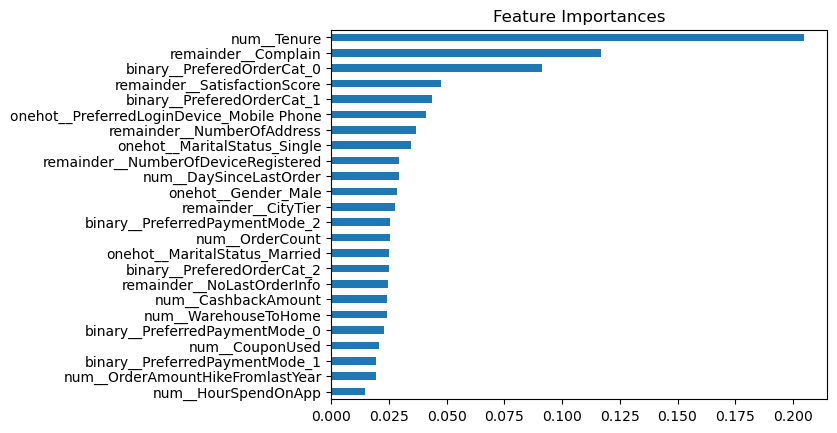

In [78]:
coef=pd.Series(best_model['model'].feature_importances_, transformer.get_feature_names_out()).sort_values(ascending = True).tail(24)
coef.plot(kind='barh', title='Feature Importances')
plt.show()

### **Batasan ML**
#### Numerical Features:
1. **CustomerID**: 
   - Tidak ada informasi langsung tentang rentangnya. Namun, ini biasanya berupa identifier unik yang tidak digunakan langsung dalam machine learning.

2. **Churn**:
   - Nilai biner: 0 (tidak churn) dan 1 (churn).

3. **Tenure**:
   - Rentang: 0 hingga 61.

4. **CityTier**:
   - Nilai diskret: 1, 2, dan 3.

5. **WarehouseToHome**:
   - Rentang: 9 hingga 127.
6. **HourSpendOnApp**:
   - Rentang: 0 hingga 5.

7. **NumberOfDeviceRegistered**:
   - Rentang: 1 hingga 6.

8. **SatisfactionScore**:
   - Rentang: 1 hingga 5.

9. **NumberOfAddress**:
   - Rentang: 1 hingga 22.

10. **Complain**:
    - Nilai biner: 0 (tidak complain) dan 1 (complain).

11. **OrderAmountHikeFromLastYear**:
    - Rentang: 11 hingga 26.

12. **CouponUsed**:
    - Rentang: 0 hingga 16..

13. **OrderCount**:
    - Rentang: 1 hingga 16.

14. **DaysSinceLastOrder**:
    - Rentang: 2 hingga 46.

15. **CashbackAmount**:
    - Rentang: 0 hingga 324.99.

---

#### Categorical Features:
1. **PreferredLoginDevice**:
   - Kategori unik: ['Mobile Phone', 'Phone', 'Computer'].

2. **PreferredPaymentMode**:
   - Kategori unik: ['Debit Card', 'UPI', 'CC', 'Cash on Delivery', 'E wallet', 'COD', 'Credit Card'].

3. **Gender**:
   - Kategori unik: ['Female', 'Male'].

4. **PreferredOrderCat**:
   - Kategori unik: ['Laptop & Accessory', 'Mobile', 'Mobile Phone', 'Others', 'Fashion', 'Grocery'].

5. **MaritalStatus**:
   - Kategori unik: ['Single', 'Divorced', 'Married'].

---

#### Batasan Input untuk Machine Learning:
1. **Numerical Features**:
   - Semua fitur numerik harus dipastikan dalam rentang seperti yang dijelaskan di atas. Misalnya, nilai untuk **HourSpendOnApp** tidak boleh di bawah 0 atau di atas 5.

2. **Categorical Features**:
   - Semua nilai kategoris harus diubah ke format yang dimengerti oleh model (misalnya melalui encoding seperti One-Hot Encoding atau Label Encoding).
   - Setiap kategori input harus sesuai dengan daftar kategori unik. Misalnya, untuk **PreferredLoginDevice**, input hanya boleh berupa 'Mobile Phone', 'Phone', atau 'Computer'.

3. **Handling Missing Values**:
   - Pastikan tidak ada nilai kosong (missing values). Jika ada, mereka harus diimputasi (dengan mean, median, mode, atau teknik lainnya).

4. **Outlier Handling**:
   - Pastikan tidak ada outlier ekstrim yang dapat merusak prediksi model, terutama untuk fitur numerik seperti **CashbackAmount**.

5. **Scaling/Normalization**:
   - Untuk fitur numerik dengan skala besar (seperti **CashbackAmount**), perlu dilakukan normalisasi atau standardisasi agar model lebih stabil.

6. **Feature Selection**:
   - Fitur seperti **CustomerID** kemungkinan besar tidak relevan dan dapat dihapus karena tidak memberikan informasi prediktif.
### **Evaluasi ML**

1. **How to Optimize Your Model?**
   - **Hyperparameter Tuning**: 
     Berdasarkan kasus, pengoptimalan model bisa dilakukan melalui **hyperparameter tuning** menggunakan metode seperti GridSearchCV atau RandomizedSearchCV. Ini penting untuk menemukan kombinasi parameter terbaik yang meningkatkan performa model Anda.
     - **Kapan menggunakan**: Jika performa baseline model kurang optimal, tuning dapat membantu.
   - **Pipeline**: 
     Pipeline digunakan untuk menggabungkan preprocessing data (seperti encoding, scaling) dengan modeling dalam satu alur kerja. Contohnya adalah integrasi preprocessing dengan `ColumnTransformer` seperti pada gambar, yang mempermudah otomatisasi seluruh alur data dari preprocessing hingga prediksi.
    - **Oversampling**:
        Oversampling digunakan untuk menangani ketidakseimbangan dataset dengan menambah sampel pada kelas minoritas, seperti menggunakan Random Oversampling. Teknik ini dapat diintegrasikan dalam pipeline, untuk memastikan proses penyeimbangan data dilakukan secara otomatis bersama preprocessing (seperti encoding dan scaling) hingga modeling, sehingga meningkatkan performa model dalam memprediksi kelas yang kurang terwakili secara konsisten.
2. **What Method You Use to Evaluate Your Model?**
   - **Cross Validation (CV)**: 
     - Teknik ini digunakan untuk memvalidasi model secara lebih andal dengan membagi data ke dalam beberapa lipatan (fold). 
     - **Stratified Cross Validation**: Sangat cocok untuk dataset klasifikasi dengan distribusi kelas yang tidak seimbang untuk memastikan distribusi kelas tetap terjaga dalam setiap fold.
   - **Train-Test Split**: 
     Meskipun terlihat digunakan di tahap awal, Train-Test Split dapat menjadi baseline, tetapi lebih baik dilengkapi dengan Cross Validation untuk evaluasi yang lebih akurat.

3. **What Is the Most Suitable Metrics You Use to Evaluate Your Model?**
   - **Classification Metrics**:
     - Jika ini adalah masalah klasifikasi (dengan target seperti `Churn`):
       - **Accuracy**: Metrik dasar, tetapi tidak ideal untuk data yang tidak seimbang.
       - **Precision & Recall**: Sangat penting jika fokus bisnis Anda adalah meminimalkan False Positives atau False Negatives.
       - **F1-Score**: Digunakan untuk keseimbangan antara Precision dan Recall.
       - **AUC-ROC Curve**: Berguna untuk mengevaluasi performa model secara menyeluruh, terutama pada dataset yang tidak seimbang.
      
### **Implementasi ML**


### **1. Implementasi Model dan Proses Kerja**
Model machine learning berbasis **XGBoost** bekerja dengan memproses data pelanggan setiap bulan. Hal ini didasarkan pada fitur **tenure**, yang mencerminkan durasi (dalam bulan) pelanggan menggunakan layanan atau berinteraksi dengan bisnis. Setiap bulan, model akan secara otomatis melakukan scan terhadap database pelanggan untuk memprediksi apakah seorang pelanggan berisiko churn (keluar) atau tidak.

Jika seorang pelanggan teridentifikasi memiliki risiko churn (klasifikasi **1**), sistem otomatis akan memicu algoritma pemberian promo. Promo dapat berupa **cashback** yang disalurkan dalam bentuk kupon atau transfer langsung, tergantung pada kebijakan yang ditentukan. Keputusan ini bergantung pada data historis pelanggan, seperti:
- **Tenure**: Berapa lama pelanggan telah menggunakan layanan.
- **Jumlah order bulan lalu**: Untuk menilai aktivitas pelanggan.
- **Terakhir order**: Waktu terakhir pelanggan melakukan transaksi.
- **Rata-rata cashback yang diterima sebelumnya**: Untuk menyesuaikan insentif promo.
- **Informasi akun lainnya**: Sesuai kebijakan tim stakeholder.

Proses dan kriteria penawaran promo ini ditentukan melalui diskusi dan kesepakatan dengan tim stakeholder, memastikan strategi tersebut selaras dengan tujuan bisnis dan efisiensi biaya.

---

### **2. Penggunaan F1-Score sebagai Metode Evaluasi Utama**
F1-Score dipilih sebagai metrik evaluasi utama dalam model ini karena model digunakan untuk menjalankan sistem **otomatis** yang langsung memengaruhi keputusan pemberian promo. Berikut penjelasannya:

- **Kenapa tidak hanya menggunakan precision?**
  Precision tinggi berarti model berhasil mengidentifikasi sebagian besar pelanggan yang benar-benar berisiko churn. Namun, jika precision tinggi tetapi recall rendah, sistem otomatis akan memberikan promo kepada pelanggan yang sebenarnya **tidak berisiko churn** (False Positives). Hal ini berpotensi meningkatkan biaya operasional secara tidak perlu.

- **Kenapa tidak hanya menggunakan recal?**
  Recall tinggi memastikan hanya pelanggan yang benar-benar berisiko churn yang diberi promo. Namun, jika recall tinggi tetapi precision rendah, sistem akan gagal mendeteksi sebagian besar pelanggan yang berisiko churn. Akibatnya, bisnis kehilangan kesempatan mempertahankan pelanggan penting.

- **Kenapa F1-Score lebih relevan?**
  F1-Score merupakan **harmonic mean dari precision dan recall**, memberikan keseimbangan antara kedua metrik tersebut. Dalam sistem otomatis seperti ini, **keseimbangan antara menghindari kerugian akibat False Positives dan risiko kehilangan pelanggan akibat False Negatives sangat penting.** F1-Score membantu memastikan bahwa model cukup sensitif (precision) untuk mendeteksi pelanggan berisiko, namun tetap selektif (recall) agar promo diberikan secara efisien.

---

### **3. Evaluasi Kesalahan dan Potensi Kerugian dengan Recall, Precision, dan F1-Score**

#### **Parameter Model**
Dari laporan yang diberikan:
- **Precision untuk klasifikasi 1 (risiko churn): 0.94**
- **Recall untuk klasifikasi 1 (risiko churn): 0.94**
- **F1-Score untuk klasifikasi 1 (risiko churn): 0.94**
- **Total pelanggan: 1.126**
- **Pelanggan berisiko churn: 190**

### **Evaluasi Kesalahan**
#### **False Positives (FP)**  
Pelanggan yang sebenarnya **tidak berisiko churn** (kelas 0), tetapi salah diklasifikasikan sebagai **berisiko churn** (kelas 1) sehingga diberi promo yang tidak diperlukan.

- **Perhitungan FP:**
  FP dihitung menggunakan formula:
  \[
  FP = (1 - \text{Precision}) \times \text{Prediksi Positif}
  \]
  Dengan precision **0.94** dan total prediksi positif sekitar \(\frac{190}{0.94} \approx 202\), maka:
  \[
  FP = (1 - 0.94) \times 202 \approx 12 \text{ pelanggan.}
  \]

- **Kerugian Akibat FP:**  
  Memberikan promo kepada pelanggan yang tidak berisiko churn menghasilkan pemborosan biaya. Dengan biaya promo rata-rata **Rp200.000 per pelanggan**:
  \[
  \text{Kerugian FP} = FP \times \text{Biaya Promo per FP} = 12 \times 200.000 = Rp2.400.000.
  \]

---

#### **False Negatives (FN)**  
Pelanggan yang sebenarnya **berisiko churn** (kelas 1), tetapi salah diklasifikasikan sebagai **tidak berisiko churn** (kelas 0), sehingga tidak diberi promo dan akhirnya meninggalkan layanan.

- **Perhitungan FN:**
  FN dihitung menggunakan formula:
  \[
  FN = (1 - \text{Recall}) \times \text{Pelanggan Kelas 1}
  \]
  Dengan recall **0.94** dan jumlah pelanggan kelas 1 sebanyak **190**, maka:
  \[
  FN = (1 - 0.94) \times 190 \approx 11 \text{ pelanggan.}
  \]

- **Kerugian Akibat FN:**  
  Kehilangan pelanggan menghasilkan kerugian potensial. Dengan estimasi kerugian rata-rata **Rp500.000 per pelanggan**:
  \[
  \text{Kerugian FN} = FN \times \text{Biaya Kerugian per FN} = 11 \times 500.000 = Rp5.500.000.
  \]

---

### **Potensi Kerugian**
Total kerugian dari kedua jenis kesalahan dihitung sebagai berikut:
\[
\text{Total Kerugian} = \text{Kerugian FP} + \text{Kerugian FN} = Rp2.400.000 + Rp5.500.000 = Rp7.900.000.
\]

---

### **Kesimpulan Evaluasi Kesalahan**
#### **Sebelum Menggunakan Model:**
Angka **50 pelanggan FP** dan **20 pelanggan FN** adalah asumsi dari metode manual atau rule-based, dengan rasio kesalahan yang lebih besar:
- **FP:** Sekitar 1% dari pelanggan tidak churn (≈4504), menghasilkan \((1\% \times 4504) = 50\) pelanggan.
- **FN:** Sekitar 1.8% dari pelanggan churn (≈1126), menghasilkan \((1.8\% \times 1126) = 20\) pelanggan.

Potensi kerugian total tanpa model prediktif adalah:
\[
\text{Potensi Kerugian Sebelum Model} = (50 \times 200.000) + (20 \times 500.000) = Rp10.000.000 + Rp10.000.000 = Rp20.000.000.
\]

#### **Setelah Menggunakan Model XGBoost:**
Dengan model prediktif berbasis **XGBoost**, kesalahan dapat ditekan menjadi **12 FP** dan **11 FN**, sehingga total kerugian berkurang menjadi **Rp7.900.000**.

---

### **Relevansi dan Optimalisasi**
1. **Precision Tinggi (0.94):** Model secara signifikan mengurangi FP, sehingga biaya promo salah sasaran dapat ditekan.
2. **Recall Tinggi (0.94):** Model mampu mendeteksi sebagian besar pelanggan berisiko churn, sehingga meminimalkan FN dan kehilangan pendapatan.
3. **Efisiensi Kerugian:** Total kerugian berkurang lebih dari **60%**, dari Rp20.000.000 menjadi Rp7.900.000.

---

### **Kesimpulan Implementasi Machine Learning**
Model XGBoost telah membuktikan efektivitasnya dengan:
- **F1-Score sebesar 0.94**, mencerminkan keseimbangan optimal antara precision dan recall.
- **Rasio Kesalahan yang Rendah:** Dari potensi 70 kesalahan (50 FP + 20 FN) menjadi hanya 23 kesalahan (12 FP + 11 FN).
- **Efisiensi Biaya:** Mengurangi potensi kerugian Rp20.000.000 menjadi Rp7.900.000.

Dengan penerapan model ini, perusahaan dapat:
- Menghemat biaya promo yang salah sasaran.
- Meminimalkan kehilangan pelanggan bernilai tinggi.
- Meningkatkan Return on Investment (ROI) secara signifikan dalam program retensi pelanggan.

### **Kelebihan Menerapkan Sistem Machine Learning**

Penerapan sistem berbasis Machine Learning (ML) seperti model XGBoost dalam prediksi churn memberikan sejumlah kelebihan yang dapat diukur dibandingkan pendekatan manual atau tradisional:

1. **Efisiensi dalam Identifikasi Pelanggan Berisiko**  
   - **Why**: Sebelum menggunakan ML, identifikasi pelanggan berisiko churn sering kali mengandalkan analisis manual atau aturan tetap (rule-based), yang kurang fleksibel terhadap pola perubahan data.  
   - **How**: ML mampu mempelajari pola kompleks dari data historis secara otomatis, seperti kombinasi fitur **Tenure**, **OrderCount**, dan **SatisfactionScore**, untuk menghasilkan prediksi lebih akurat.  
   - **Hasil yang Terukur**: Dengan F1-Score 0.94, sistem ini secara signifikan lebih baik dibandingkan rule-based systems, yang biasanya memiliki performa precision dan recall yang lebih rendah dan sering menghasilkan kerugian lebih tinggi akibat kesalahan prediksi.

2. **Pengurangan Biaya Operasional Promo**  
   - **Why**: Sebelum ML, promo sering diberikan secara massal atau berdasarkan intuisi, tanpa segmentasi yang memadai, sehingga banyak pelanggan yang sebenarnya tidak membutuhkan promo tetap mendapatkannya (False Positives).  
   - **How**: Model ini memastikan hanya pelanggan yang benar-benar memiliki risiko churn (kelas 1) yang menerima promo, sehingga biaya promo menjadi lebih terkendali.  
   - **Hasil yang Terukur**: Dengan precision 0.94, hanya sekitar 6% dari promo yang salah sasaran (False Positives), yang menghasilkan penghematan biaya promo hingga **Rp2.400.000**

3. **Peningkatan Retensi Pelanggan**  
   - **Why**: Sebelum ML, banyak pelanggan berisiko churn tidak terdeteksi karena kurangnya kemampuan analisis mendalam, sehingga bisnis kehilangan pelanggan potensial (False Negatives).  
   - **How**: Dengan recall 0.94, model ini mampu mendeteksi 94% pelanggan berisiko churn, yang memungkinkan pemberian promo tepat waktu untuk mempertahankan mereka.  
   - **Hasil yang Terukur**: Dengan hanya 11 pelanggan (6% dari total pelanggan churn) yang tidak terdeteksi, potensi kerugian akibat kehilangan pelanggan berkurang hingga **Rp5.500.000**

4. **Skalabilitas dan Konsistensi Proses**  
   - **Why**: Analisis manual sering kali terbatas oleh sumber daya manusia dan tidak dapat diandalkan untuk mengolah data dalam skala besar secara konsisten.  
   - **How**: Sistem ML dapat berjalan otomatis setiap bulan, memindai ribuan pelanggan secara efisien dan menghasilkan prediksi yang konsisten tanpa bias subjektif.  
   - **Hasil yang Terukur**: Dengan kapasitas memproses data hingga seluruh pelanggan (1.126 orang) setiap bulan, bisnis mampu menangani data dalam skala besar dengan waktu dan biaya yang jauh lebih rendah.

5. **Peningkatan ROI (Return on Investment)**  
   - **Why**: Sistem ML yang lebih akurat memungkinkan bisnis memanfaatkan anggaran promo dengan lebih efisien untuk mempertahankan pelanggan yang benar-benar berisiko churn.  
   - **How**: Dengan meminimalkan False Positives dan False Negatives, biaya promo dapat dioptimalkan untuk memberikan dampak maksimal terhadap retensi pelanggan.  
   - **Hasil yang Terukur**: Dengan model ML ini, total kerugian (Rp7.900.000) sudah lebih kecil dibandingkan perkiraan kerugian sebelumnya yang tidak terukur akibat pendekatan manual, yang sering kali menghasilkan False Positives dan False Negatives yang lebih tinggi.


## **Kesimpulan dan Rekomendasi**

## Kesimpulan
1. Pelanggan yang berisiko churn seringkali adalah mereka yang merasa kurang terlibat secara emosional maupun fungsional dengan layanan e-commerce ini. Mereka cenderung mencari pengalaman yang lebih baik, harga yang lebih kompetitif, atau layanan yang lebih sesuai dengan kebutuhan spesifik mereka. Sosok ini bisa digambarkan sebagai "pelanggan pengelana," yang selalu menjelajahi opsi lain karena merasa layanan saat ini tidak cukup memuaskan, baik dari segi kenyamanan, kecepatan, atau insentif yang mereka harapkan. Mereka cenderung memiliki ekspektasi tinggi, tapi dengan toleransi rendah terhadap ketidaksesuaian, menjadikan mereka kelompok yang memerlukan perhatian khusus dan pendekatan personal agar tetap setia.
2. Model XGBoost yang telah disesuaikan menunjukkan performa luar biasa dengan **f1-score macro sebesar 0.97**, yang mencerminkan keseimbangan antara presisi dan recall di kedua kelas (churn dan non-churn). Dengan tingkat akurasi keseluruhan 98%, model ini sangat andal dalam memprediksi pelanggan yang berpotensi churn (kelas 1) maupun yang tetap loyal (kelas 0). Namun, mempertahankan **f1-score** di tingkat ini sangat penting karena secara langsung memengaruhi kemampuan kami untuk menangani churn pelanggan secara akurat. *Siapa* yang akan terkena dampaknya? Pelanggan berisiko tinggi. *Apa* yang dapat kami lakukan? Memanfaatkan prediksi ini untuk mengidentifikasi mereka lebih awal. *Di mana* dampaknya terlihat? Pada strategi retensi kami. *Kapan* harus diterapkan? Segera, sebelum pelanggan churn. *Mengapa* ini penting? Karena setiap kesalahan deteksi bisa berarti kehilangan pelanggan atau pengalokasian sumber daya yang salah. *Bagaimana* kami dapat meningkatkan f1-score lebih lanjut? Dengan pengayaan data, seperti menambahkan variabel pengalaman pelanggan, dan melakukan iterasi model. Dengan pendekatan ini, kami dapat memaksimalkan dampak dari strategi pencegahan churn dan mempertahankan lebih banyak pelanggan di masa depan.
3. Penerapan sistem Machine Learning berbasis XGBoost telah memberikan peningkatan signifikan dalam efisiensi prediksi risiko churn, dengan F1-Score sebesar 0.94 pada yang berisiko churn, mencerminkan keseimbangan optimal antara precision (0.94) dan recall (0.94). Sebelum menggunakan model prediktif, metode manual atau rule-based menghasilkan kesalahan yang lebih besar, yaitu sekitar 50 False Positives (FP) dan 20 False Negatives (FN), dengan potensi total kerugian mencapai Rp20.000.000. Kerugian ini berasal dari Rp10.000.000 akibat FP (50 pelanggan x Rp200.000) dan Rp10.000.000 akibat FN (20 pelanggan x Rp500.000). Setelah penerapan model XGBoost, jumlah kesalahan dapat ditekan menjadi 12 FP (Rp2.400.000 kerugian) dan 11 FN (Rp5.500.000 kerugian), sehingga total kerugian berkurang menjadi hanya Rp7.900.000, mencerminkan efisiensi biaya lebih dari 60%. Dengan hanya 6% promo salah sasaran dan 94% pelanggan berisiko churn terdeteksi, model ini lebih akurat dan efektif dibandingkan metode sebelumnya, memberikan dampak positif terhadap Return on Investment (ROI) dengan rata-rata kerugian akibat kesalahan prediksi turun menjadi hanya Rp701.500 per 100 pelanggan. XGBoost menjadi solusi terukur dan strategis dalam mengoptimalkan retensi pelanggan.
## Rekomendasi
1. Kami merekomendasikan penerapan model Machine Learning berbasis XGBoost untuk bisnis yang memiliki basis pelanggan besar dan ingin meningkatkan retensi pelanggan secara efisien, seperti e-commerce, layanan berlangganan, fintech, atau sektor retail online. Model ini secara otomatis memproses data pelanggan setiap bulan, memanfaatkan fitur seperti tenure, jumlah order, waktu terakhir transaksi, dan pola cashback untuk mengidentifikasi pelanggan berisiko churn (klasifikasi 1). Setelah pelanggan berisiko terdeteksi, sistem dapat langsung memicu pemberian promo personal, seperti cashback atau kupon, berdasarkan data historis pelanggan. Untuk implementasi, bisnis perlu mengintegrasikan model ini ke dalam sistem Customer Relationship Management (CRM) atau data warehouse mereka. Selain itu, proses harus diselaraskan dengan kebijakan bisnis melalui diskusi bersama tim stakeholder untuk menentukan kriteria pemberian promo, seperti batasan anggaran dan tipe insentif yang relevan. Dengan penerapan ini, bisnis dapat mengurangi churn secara signifikan, meningkatkan loyalitas pelanggan bernilai tinggi, dan mengoptimalkan Return on Investment (ROI), sambil menjaga efisiensi operasional melalui otomatisasi.
2. Untuk menghadapi "pelanggan pengelana" yang memiliki ekspektasi tinggi tetapi toleransi rendah terhadap ketidaksesuaian, rekomendasi kami sangat relevan. Dengan fokus pada personalisasi pengalaman pelanggan, seperti memberikan penawaran eksklusif dan relevan, kami dapat memenuhi kebutuhan emosional dan fungsional mereka dengan lebih baik. Selain itu, peningkatan kualitas layanan logistik secara langsung menjawab kebutuhan kenyamanan dan kecepatan yang mereka harapkan. Melalui penggunaan data prediktif, kami dapat mengidentifikasi kelompok pelanggan ini lebih awal, memungkinkan kami untuk memberikan intervensi yang tepat waktu, seperti memberikan diskon menarik atau layanan pelanggan proaktif. Strategi ini bertujuan untuk menciptakan keterlibatan yang lebih dalam, menjaga loyalitas mereka, dan memastikan pengalaman yang lebih baik sehingga pelanggan merasa bahwa platform ini adalah pilihan terbaik mereka, mencegah mereka menjelajahi opsi lain.